# Imports and Basic Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = '/content/final_processed_football_data.csv'
df = pd.read_csv(file_path)

In [3]:
# Rename 'round' to 'matchweek' and extract the number
df['matchweek'] = df['round'].str.extract('(\d+)').astype(int)
df.drop(columns=['round'], inplace=True)

# Remove the 'home_team_og_code' and 'away_team_og_code' columns
df.drop(columns=['home_team_og_code', 'away_team_og_code', 'FTR'], inplace=True)

# Modify the 'home_result' column and rename it to 'result'
df['result'] = df['home_result'].replace({'W': 'H', 'L': 'A'})
df.drop(columns=['home_result'], inplace=True)

# Rename 'home_time' to 'time'
df.rename(columns={'home_time': 'time', 'extracted_league': 'league', 'season_id': 'season'}, inplace=True)

In [4]:
df.head()

away_team  home_Poss  home_Touches  home_Take-Ons  home_Carries  \
0     Norwich City       57.0         627.0           15.0         383.0   
1  Manchester City       43.0         523.0           12.0         309.0   
2      Southampton       47.0         507.0           15.0         214.0   
3         Brighton       49.0         562.0           15.0         325.0   
4          Everton       36.0         427.0           12.0         160.0   

   home_Receiving      time       home_team  away_Poss  away_Touches  ...  \
0           408.0  20:00:00       Liverpool       43.0         534.0  ...   
1           347.0  12:30:00        West Ham       57.0         682.0  ...   
2           218.0  15:00:00         Burnley       53.0         556.0  ...   
3           344.0  15:00:00         Watford       51.0         597.0  ...   
4           176.0  15:00:00  Crystal Palace       64.0         690.0  ...   

   Bet365_Closing_Asian_Handicap_Away  Pinnacle_Closing_Asian_Handicap_Home  \
0                                1.99                                  1.94   
1                                1.95                                  1.96   
2                                2.03                                  1.89   
3                                1.86                                  2.05   
4                                2.08                                  1.97   

   Pinnacle_Closing_Asian_Handicap_Away Max_Closing_Asian_Handicap_Home  \
0                                  1.98                            1.99   
1                                  1.97                            2.07   
2                                  2.03                            1.90   
3                                  1.88                            2.12   
4                                  1.96                            2.03   

  Max_Closing_Asian_Handicap_Away  Avg_Closing_Asian_Handicap_Home  \
0                            2.07                             1.90   
1                            1.98                             1.97   
2                            2.07                             1.86   
3                            1.91                             2.05   
4                            2.08                             1.96   

   Avg_Closing_Asian_Handicap_Away        date  matchweek  result  
0                             1.99  2019-08-09          1       H  
1                             1.92  2019-08-10          1       A  
2                             2.02  2019-08-10          1       H  
3                             1.84  2019-08-10          1       A  
4                             1.93  2019-08-10          1       D  

[5 rows x 115 columns]

## Basic Data Analysis


In [5]:
# Summary statistics for numerical columns
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
          home_Poss  home_Touches  home_Take-Ons  home_Carries  home_Receiving  \
count  7203.000000   7203.000000    7203.000000   7203.000000     7203.000000   
mean     51.039428    612.414109      17.248438    352.646160      396.290932   
std      11.091969    123.350596       6.303560    115.074054      129.104042   
min      18.000000    297.000000       1.000000     82.000000       83.000000   
25%      43.000000    521.000000      13.000000    267.000000      300.000000   
50%      51.000000    601.000000      17.000000    340.000000      384.000000   
75%      59.000000    691.000000      21.000000    423.000000      479.000000   
max      82.000000   1131.000000      59.000000    860.000000      931.000000   

         away_Poss  away_Touches  away_Take-Ons  away_Carries  away_Receiving  \
count  7203.000000   7203.000000    7203.000000   7203.000000     7203.000000   
mean     48.961960    592.486738      16.438828    335.056103      375.738647   
std   

In [6]:
df.describe()

home_Poss  home_Touches  home_Take-Ons  home_Carries  home_Receiving  \
count  7203.000000   7203.000000    7203.000000   7203.000000     7203.000000   
mean     51.039428    612.414109      17.248438    352.646160      396.290932   
std      11.091969    123.350596       6.303560    115.074054      129.104042   
min      18.000000    297.000000       1.000000     82.000000       83.000000   
25%      43.000000    521.000000      13.000000    267.000000      300.000000   
50%      51.000000    601.000000      17.000000    340.000000      384.000000   
75%      59.000000    691.000000      21.000000    423.000000      479.000000   
max      82.000000   1131.000000      59.000000    860.000000      931.000000   

         away_Poss  away_Touches  away_Take-Ons  away_Carries  away_Receiving  \
count  7203.000000   7203.000000    7203.000000   7203.000000     7203.000000   
mean     48.961960    592.486738      16.438828    335.056103      375.738647   
std      11.092136    117.112134       5.959473    110.498599      122.731896   
min      18.000000    286.000000       1.000000     84.000000       73.000000   
25%      41.000000    508.000000      12.000000    253.000000      286.500000   
50%      49.000000    582.000000      16.000000    322.000000      363.000000   
75%      57.000000    666.000000      20.000000    402.000000      452.000000   
max      82.000000   1063.000000      49.000000    832.000000      890.000000   

       ...  Closing_Asian_Handicap_Home  Bet365_Closing_Asian_Handicap_Home  \
count  ...                  7203.000000                         7203.000000   
mean   ...                    -0.262217                            1.946263   
std    ...                     0.851793                            0.103971   
min    ...                    -3.750000                            1.600000   
25%    ...                    -0.750000                            1.870000   
50%    ...                    -0.250000                            1.950000   
75%    ...                     0.250000                            2.030000   
max    ...                     3.000000                            3.550000   

       Bet365_Closing_Asian_Handicap_Away  \
count                         7203.000000   
mean                             1.960536   
std                              0.099375   
min                              1.270000   
25%                              1.880000   
50%                              1.970000   
75%                              2.040000   
max                              2.300000   

       Pinnacle_Closing_Asian_Handicap_Home  \
count                           7203.000000   
mean                               1.958873   
std                                0.104219   
min                                1.640000   
25%                                1.880000   
50%                                1.950000   
75%                                2.040000   
max                                3.930000   

       Pinnacle_Closing_Asian_Handicap_Away  Max_Closing_Asian_Handicap_Home  \
count                           7203.000000                      7203.000000   
mean                               1.968294                         2.012721   
std                                0.102459                         0.104337   
min                                1.300000                         1.780000   
25%                                1.880000                         1.930000   
50%                                1.960000                         2.010000   
75%                                2.050000                         2.090000   
max                                2.390000                         3.950000   

       Max_Closing_Asian_Handicap_Away  Avg_Closing_Asian_Handicap_Home  \
count                      7203.000000                      7203.000000   
mean                          2.026070                         1.931165   
std                           0.107523                       

In [7]:
df.columns

Index(['away_team', 'home_Poss', 'home_Touches', 'home_Take-Ons',
       'home_Carries', 'home_Receiving', 'time', 'home_team', 'away_Poss',
       'away_Touches',
       ...
       'Bet365_Closing_Asian_Handicap_Away',
       'Pinnacle_Closing_Asian_Handicap_Home',
       'Pinnacle_Closing_Asian_Handicap_Away',
       'Max_Closing_Asian_Handicap_Home', 'Max_Closing_Asian_Handicap_Away',
       'Avg_Closing_Asian_Handicap_Home', 'Avg_Closing_Asian_Handicap_Away',
       'date', 'matchweek', 'result'],
      dtype='object', length=115)

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 away_team                          0
home_Poss                          0
home_Touches                       0
home_Take-Ons                      0
home_Carries                       0
                                  ..
Avg_Closing_Asian_Handicap_Home    0
Avg_Closing_Asian_Handicap_Away    0
date                               0
matchweek                          0
result                             0
Length: 115, dtype: int64


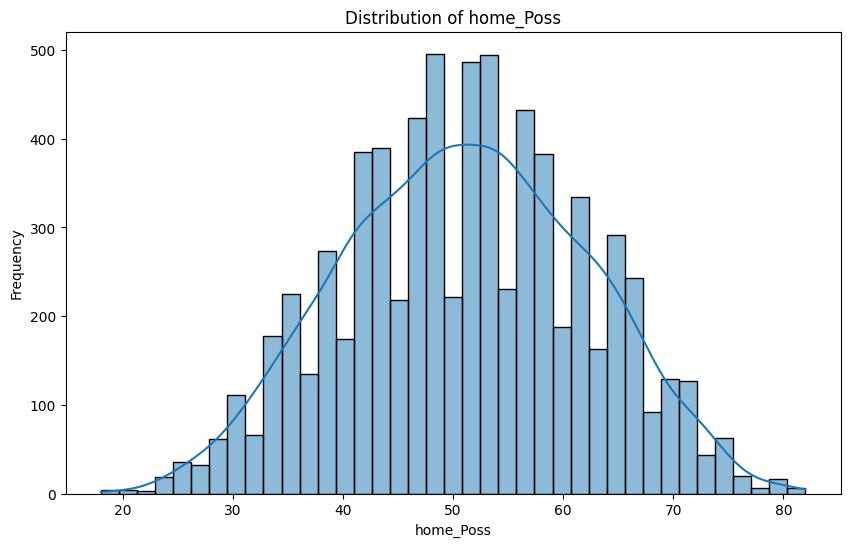

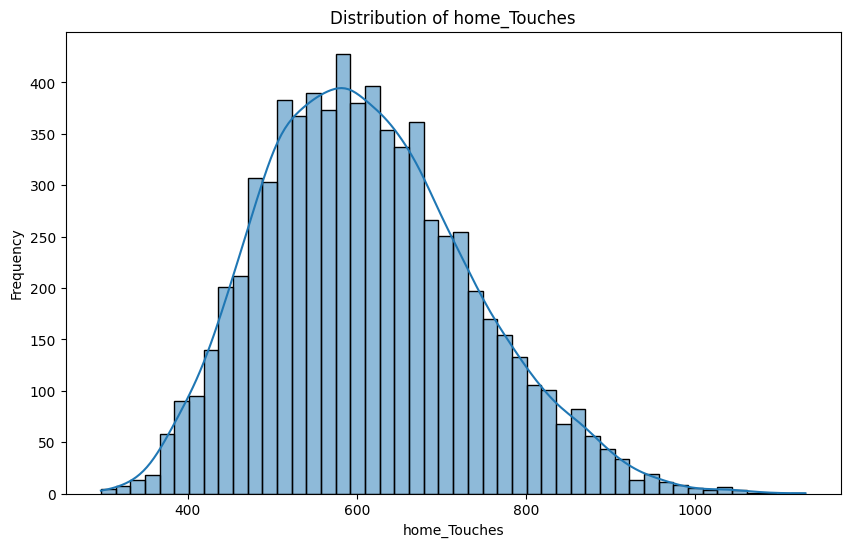

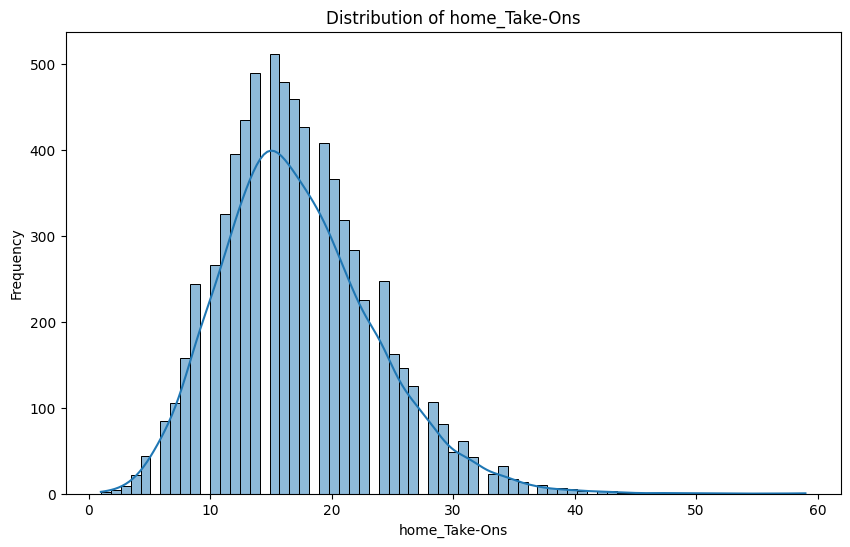

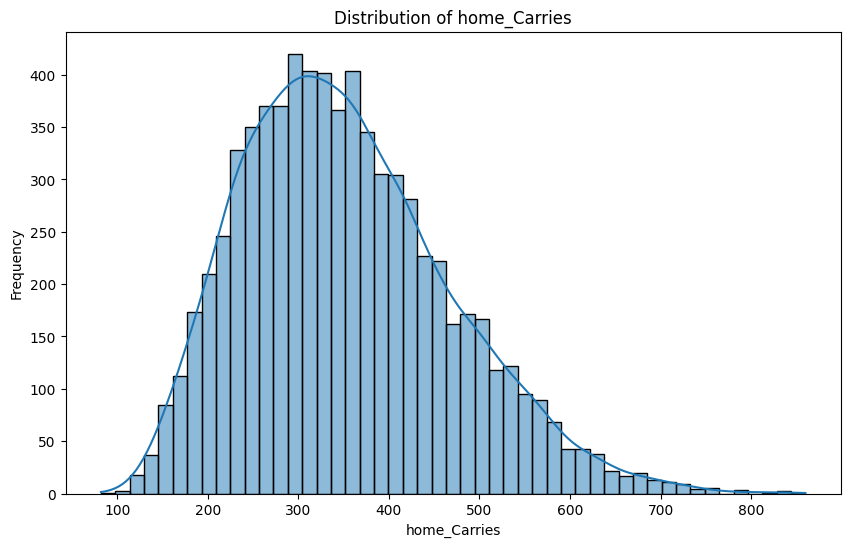

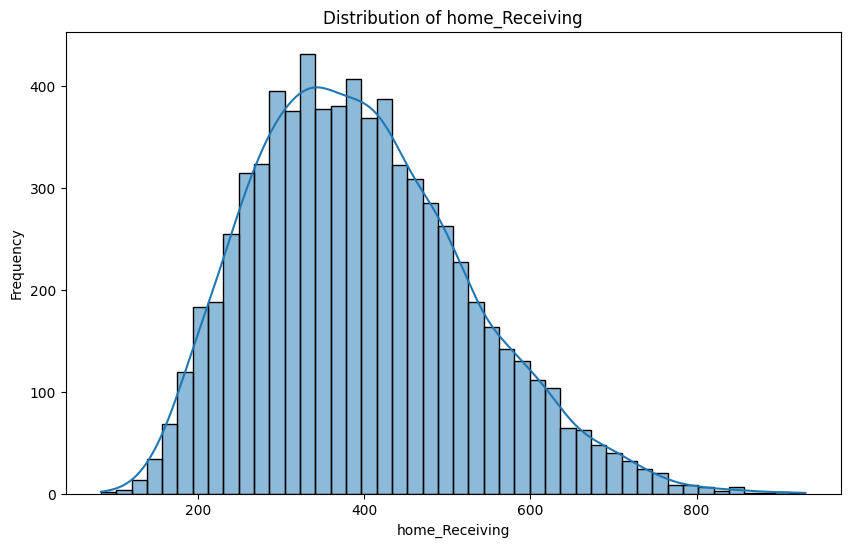

In [9]:
# Visualization of distributions for a few key features
key_features = ['home_Poss', 'home_Touches', 'home_Take-Ons', 'home_Carries', 'home_Receiving']

# Plotting the distributions
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

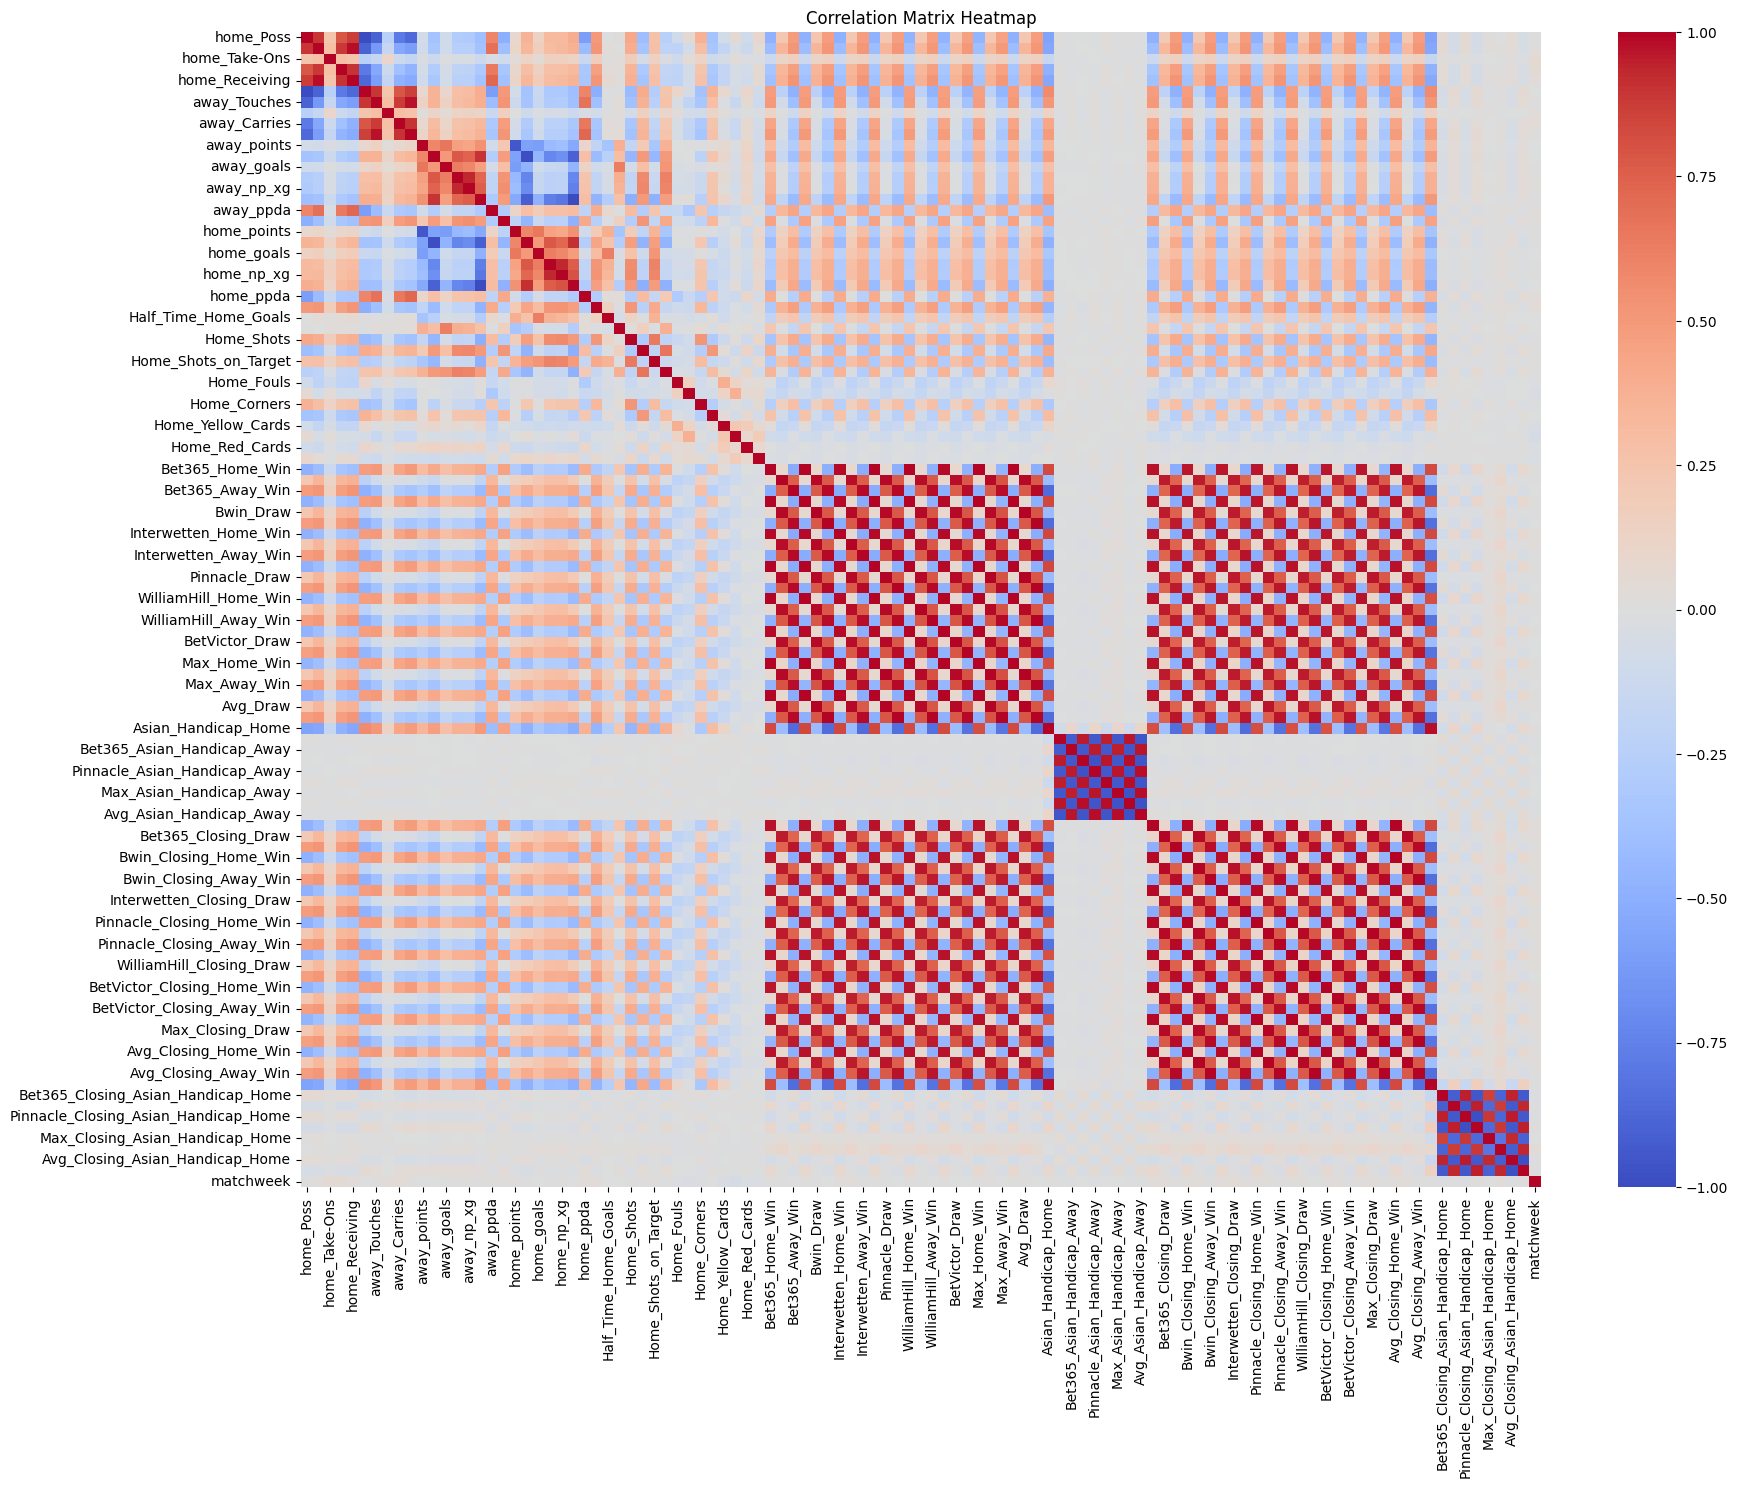

In [10]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# General Exploratory Data Analysis


XG vs Goals

             team        xG  goals  points  expected_points  Poss       PPDA  \
0       Liverpool  2.234560      4       3           2.3863  57.0   5.942857   
1        West Ham  1.200300      0       0           0.2522  43.0  16.400000   
2         Burnley  0.909241      3       3           1.1422  47.0   9.277778   
3         Watford  0.670022      0       0           1.0922  49.0   9.785714   
4  Crystal Palace  0.871590      0       1           1.0512  36.0  11.307692   

           league     season  
0  Premier-League  2019/2020  
1  Premier-League  2019/2020  
2  Premier-League  2019/2020  
3  Premier-League  2019/2020  
4  Premier-League  2019/2020  


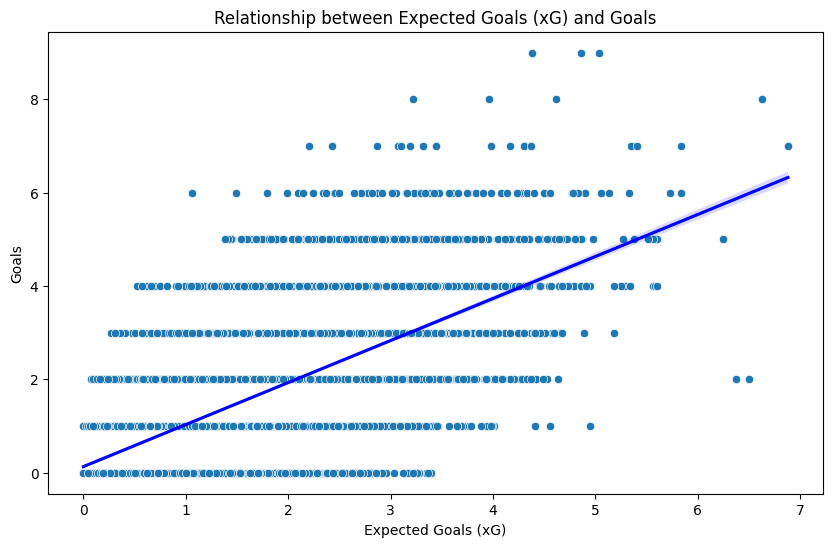

In [11]:
# Combine home and away data into a single dataframe for xG and goals
home_data = df[['home_team', 'home_xg', 'home_goals', 'home_points', 'home_expected_points', 'home_Poss', 'home_ppda', 'league', 'season']].rename(columns={'home_xg': 'xG', 'home_goals': 'goals', 'home_points': 'points', 'home_expected_points': 'expected_points', 'home_team': 'team', 'home_Poss': 'Poss', 'home_ppda': 'PPDA'})
away_data = df[['away_team', 'away_xg', 'away_goals', 'away_points', 'away_expected_points', 'away_Poss', 'away_ppda', 'league', 'season']].rename(columns={'away_xg': 'xG', 'away_goals': 'goals', 'away_points': 'points', 'away_expected_points': 'expected_points', 'away_team': 'team', 'away_Poss': 'Poss', 'away_ppda': 'PPDA'})
combined_data = pd.concat([home_data, away_data]).reset_index(drop=True)

# Drop rows with NaN values to ensure the combined data is clean
combined_data = combined_data.dropna(subset=['xG', 'goals', 'points', 'expected_points', 'Poss', 'PPDA'])

# Display the combined dataset to ensure changes are correct
print(combined_data.head())

# Plot the relationship between xG and goals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='xG', y='goals')
sns.regplot(data=combined_data, x='xG', y='goals', scatter=False, color='blue')
plt.title('Relationship between Expected Goals (xG) and Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
# Fit a linear regression model
X = combined_data[['xG']]
y = combined_data['goals']
model = LinearRegression().fit(X, y)

# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(combined_data['xG'], combined_data['goals'])[0, 1]

print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {correlation_coefficient:.4f}")

Equation of the line of best fit: y = 0.9003x + 0.1307
Correlation coefficient (r): 0.6363


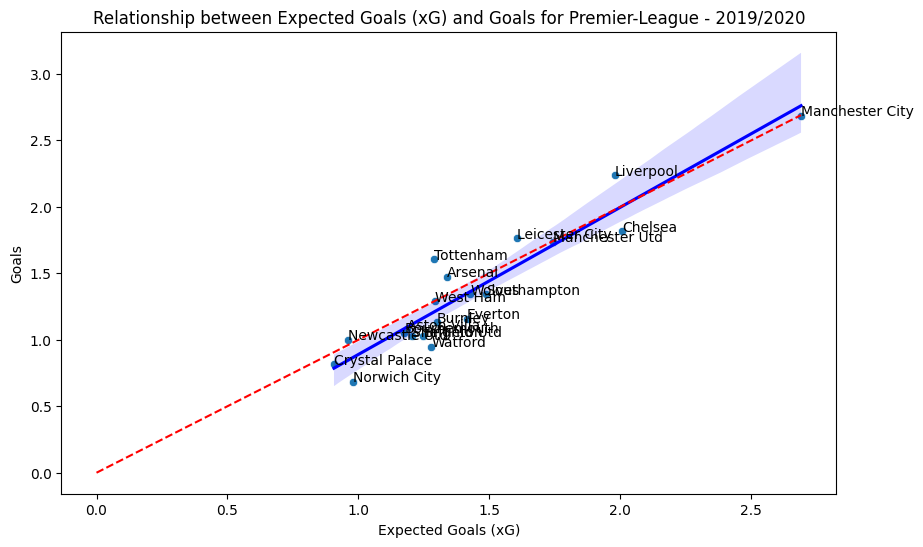

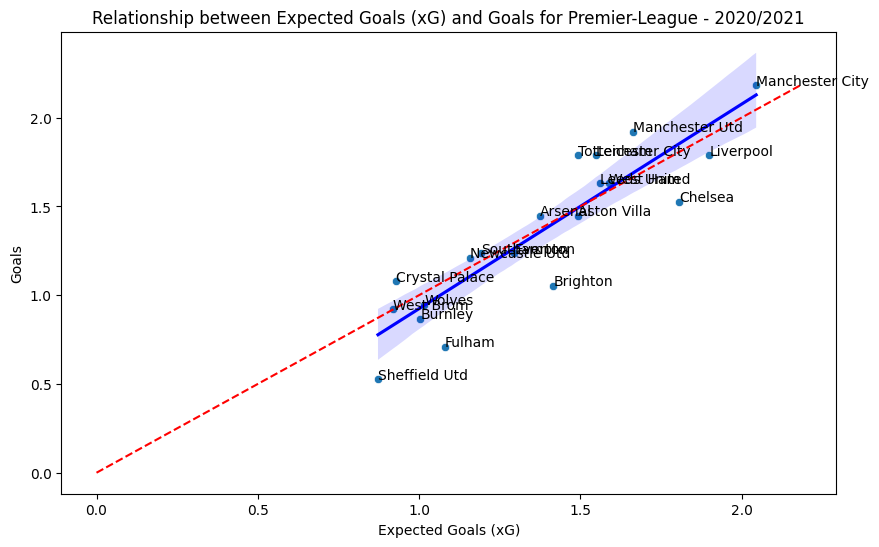

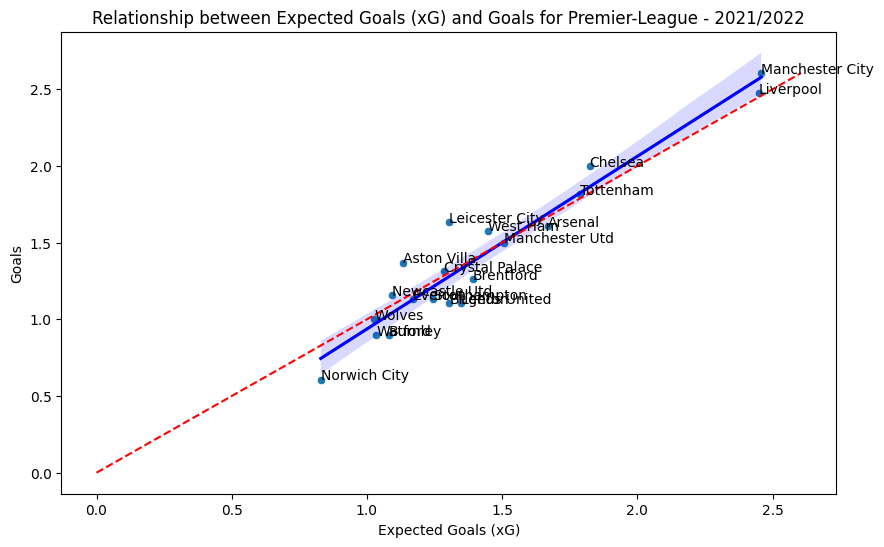

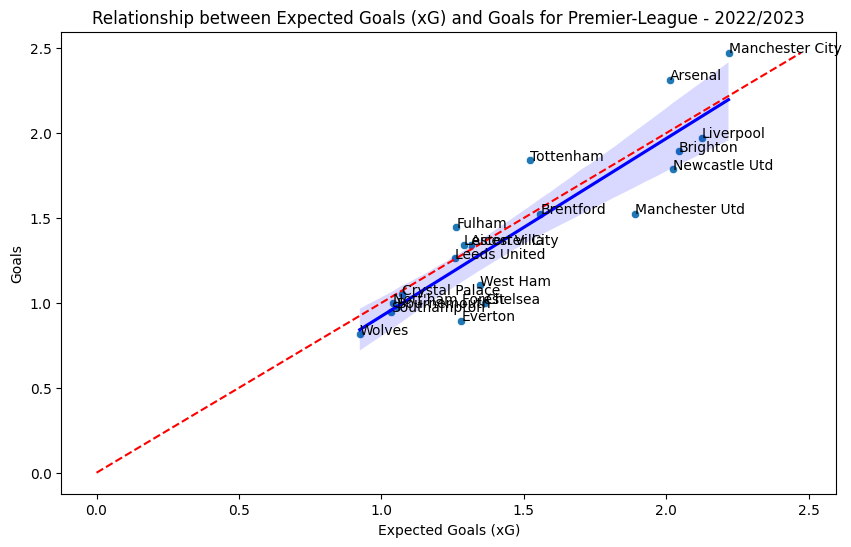

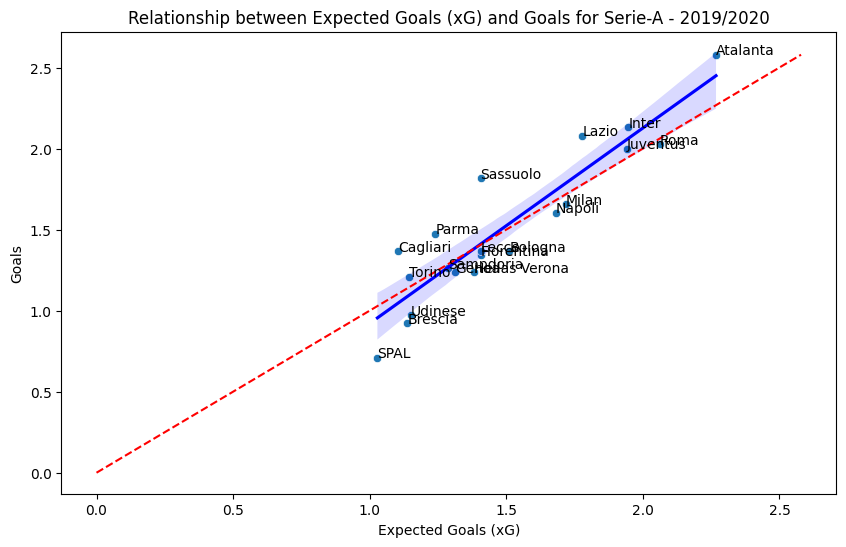

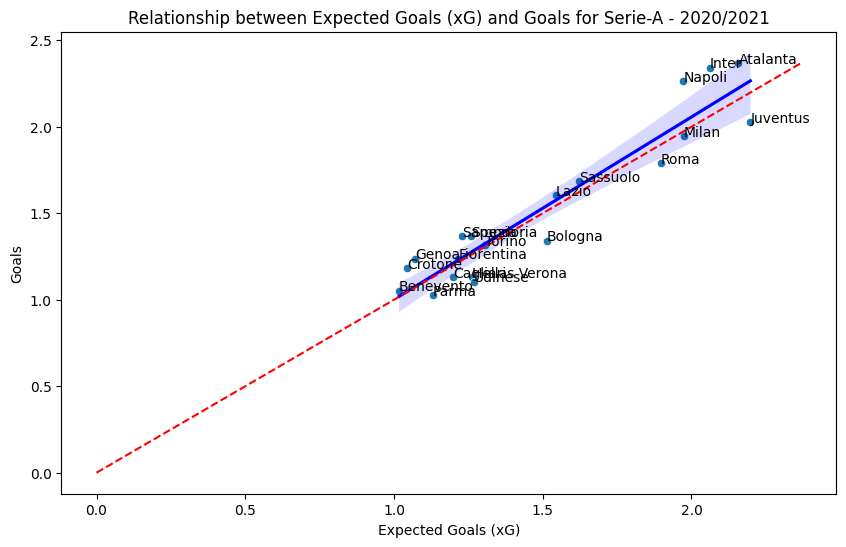

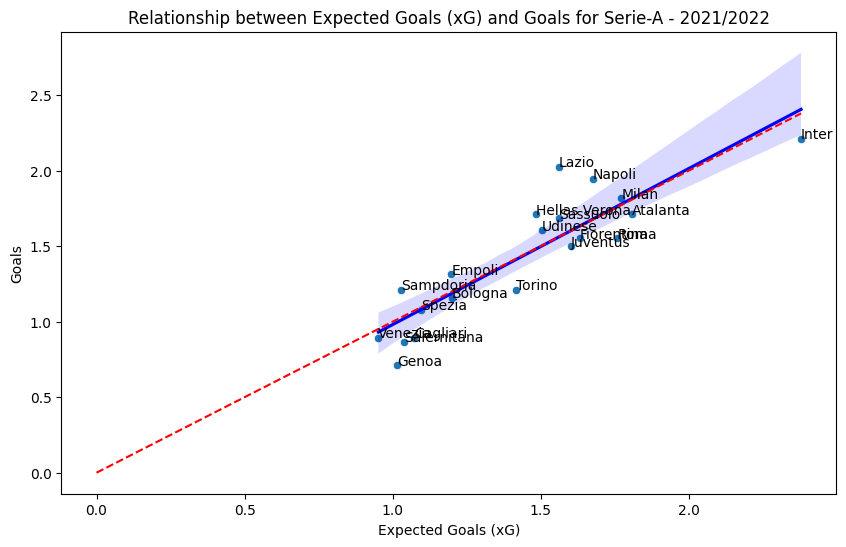

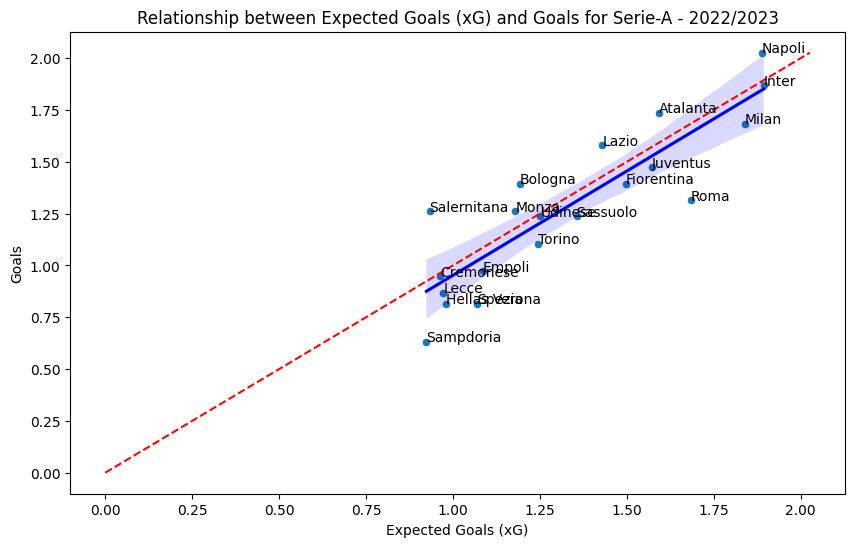

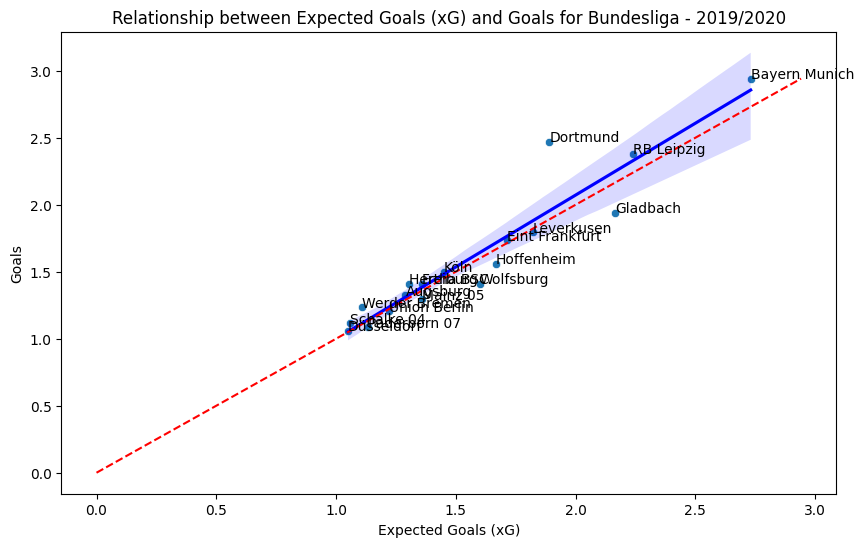

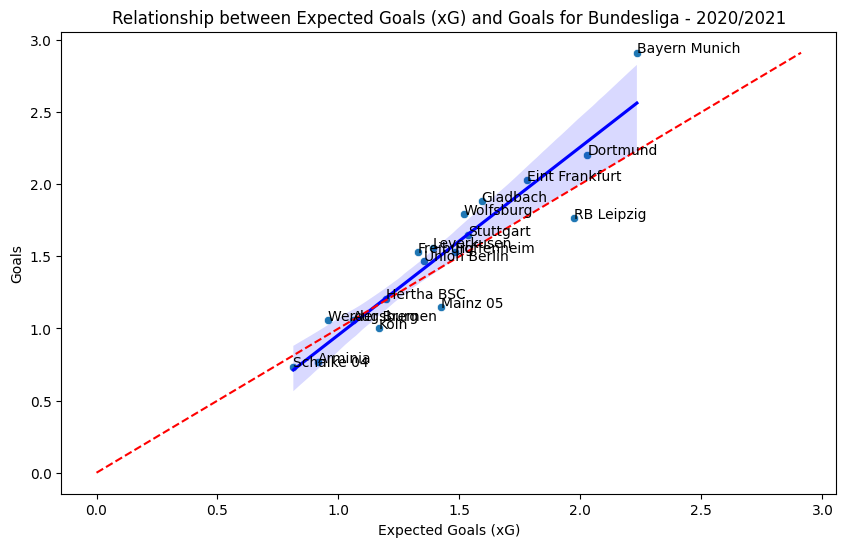

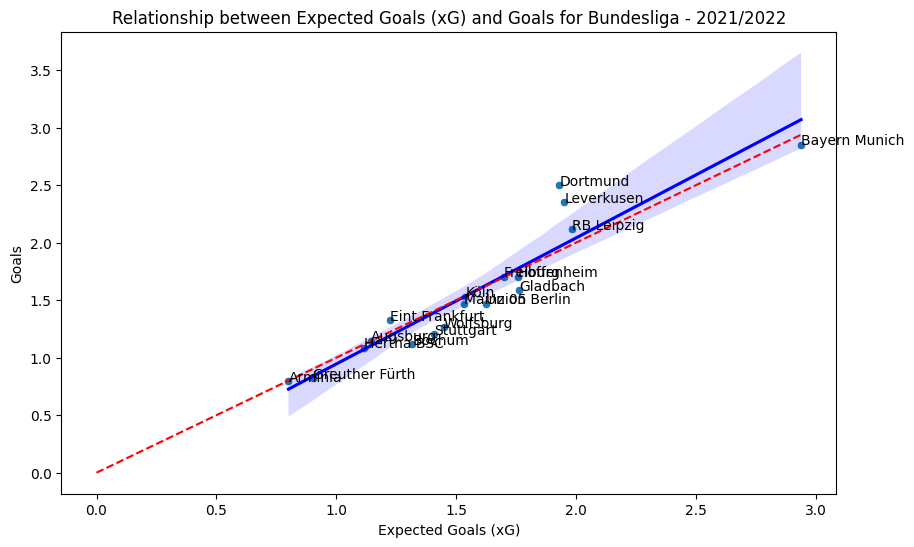

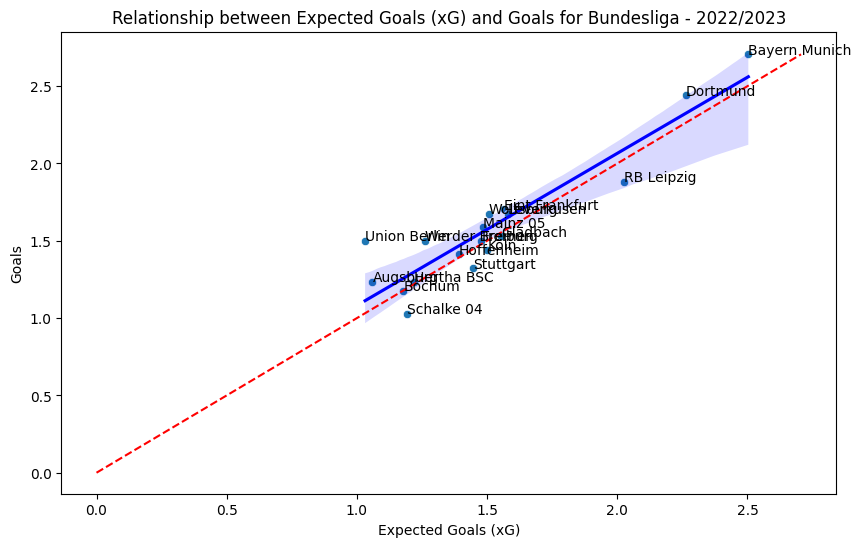

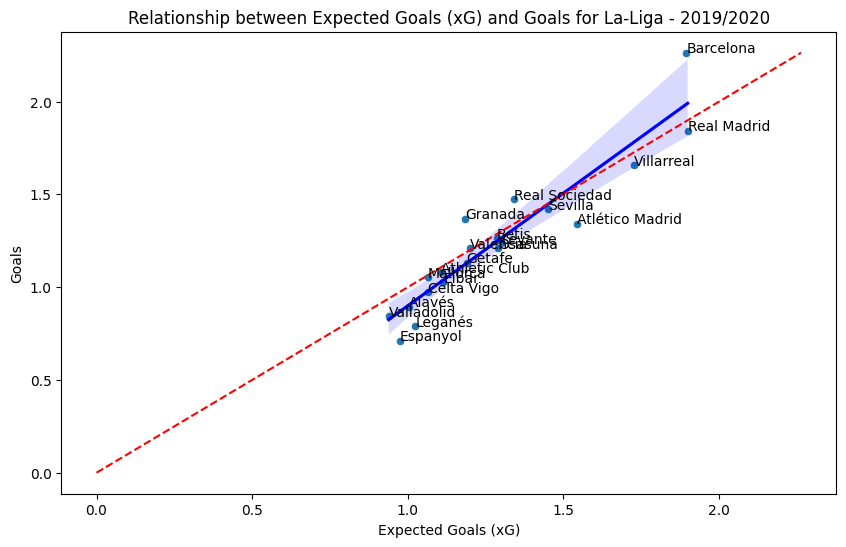

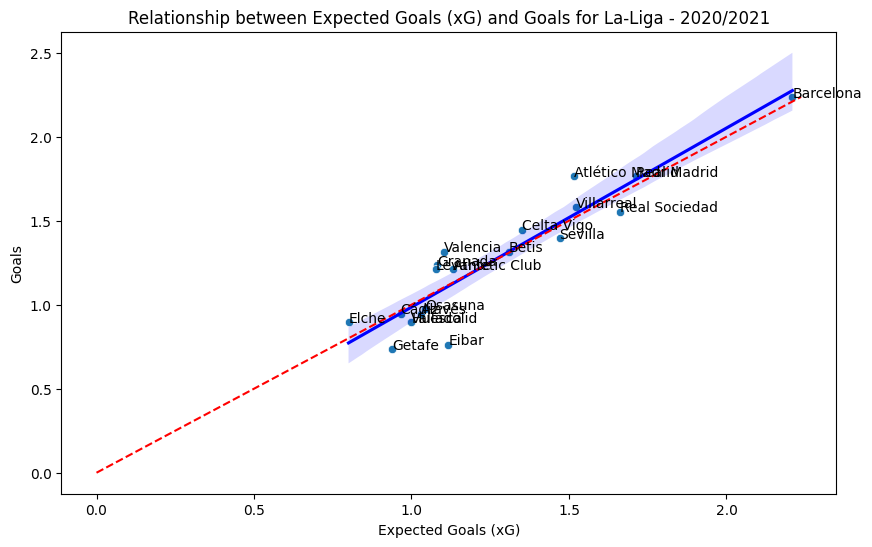

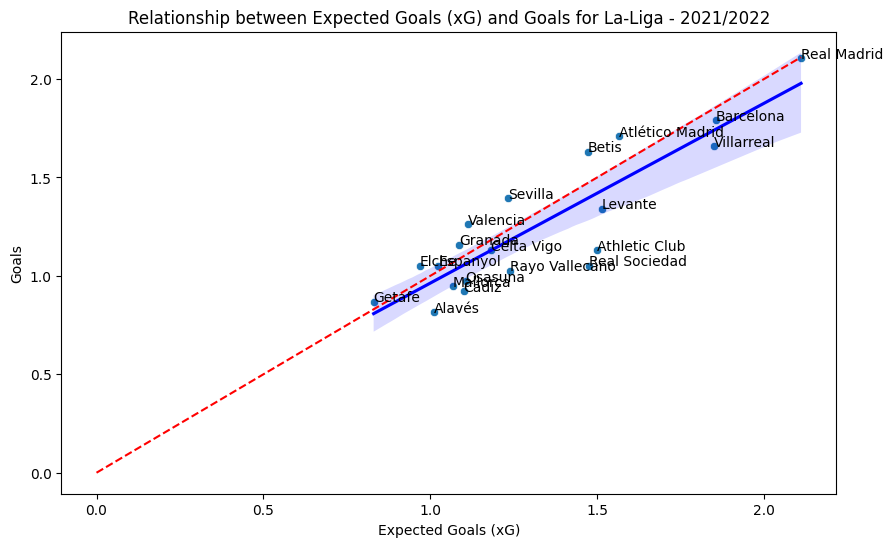

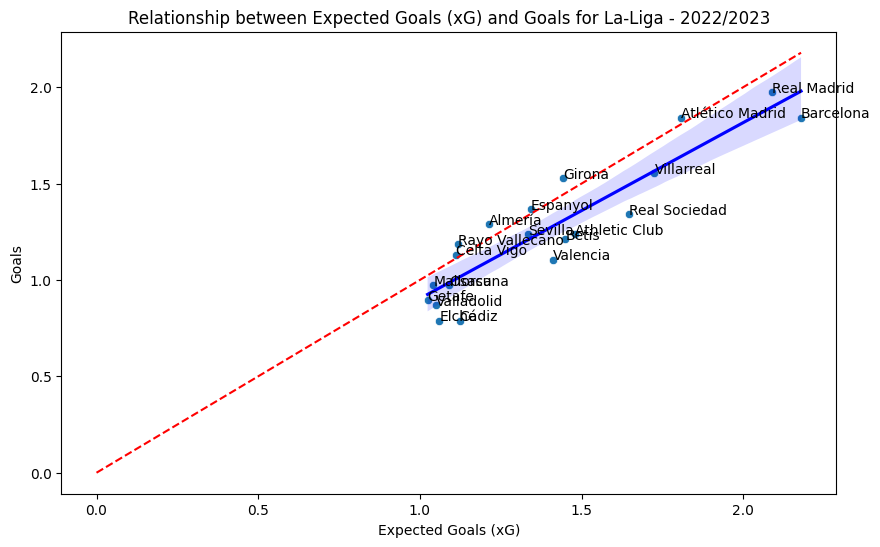

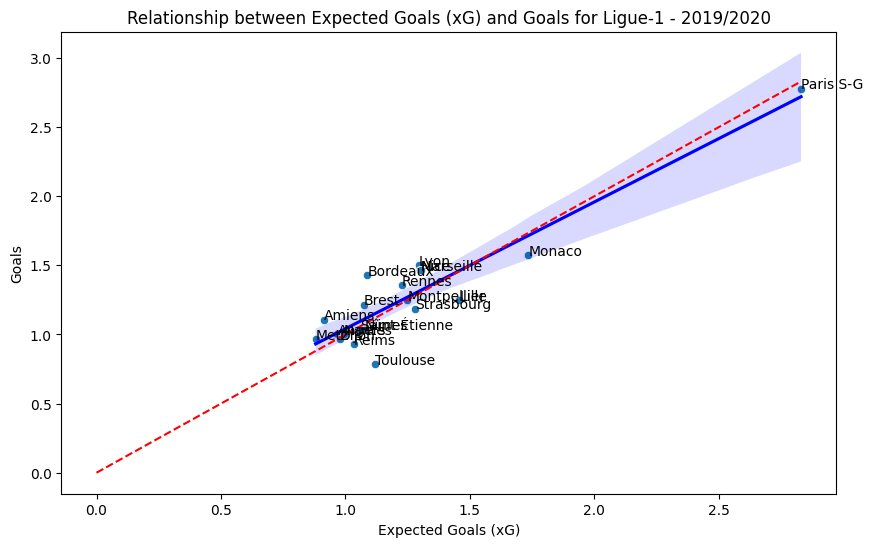

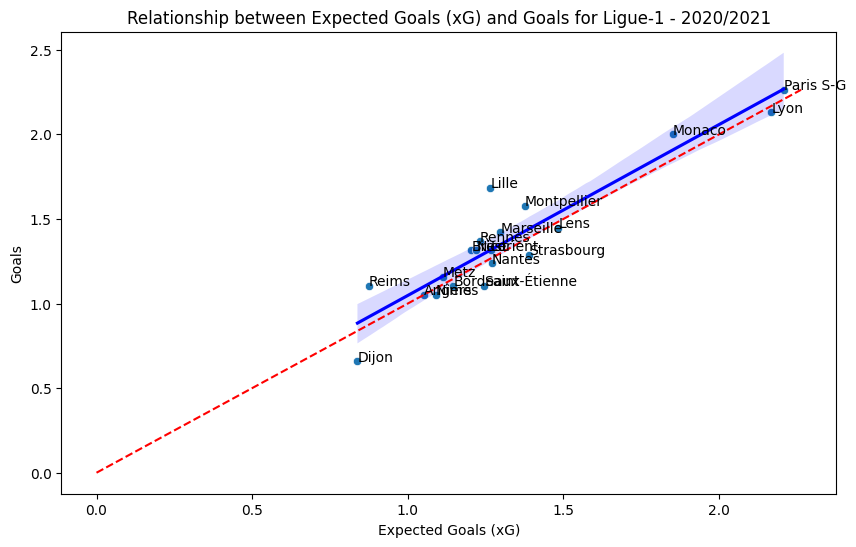

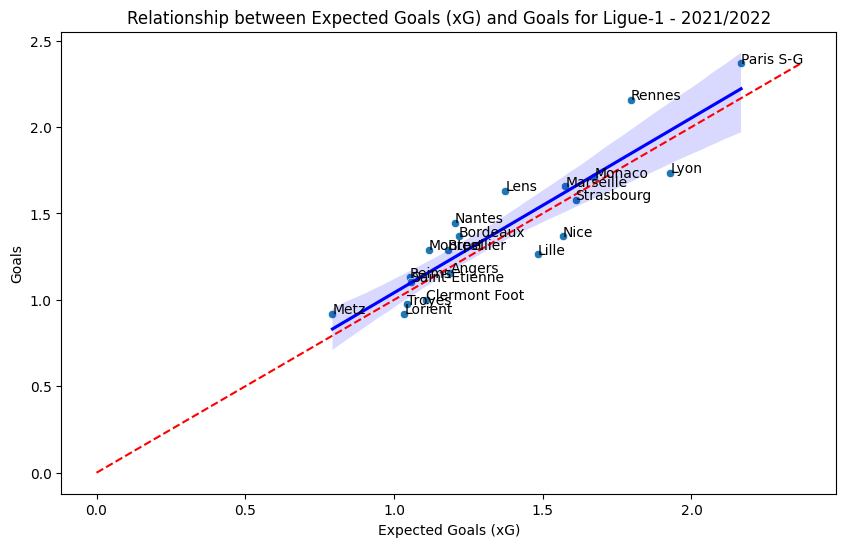

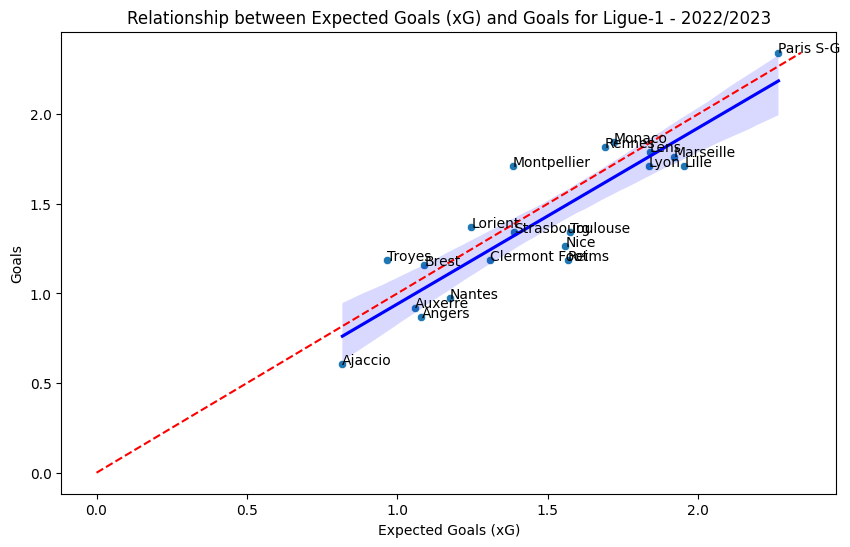

In [13]:
# Calculate the average xG and goals for each team in each league
average_data = combined_data.groupby(['league', 'season', 'team']).mean().reset_index()

# Plot the relationship between xG and goals for each league
leagues = combined_data['league'].unique()
seasons = combined_data['season'].unique()

for league in leagues:
    for season in seasons:
        league_season_data = average_data[(average_data['league'] == league) & (average_data['season'] == season)]

        if not league_season_data.empty:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=league_season_data, x='xG', y='goals')

            # Add a line of best fit
            sns.regplot(data=league_season_data, x='xG', y='goals', scatter=False, color='blue')

            # Add the y=x line
            max_val = max(league_season_data['xG'].max(), league_season_data['goals'].max())
            plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

            # Add team labels
            for i in range(len(league_season_data)):
                plt.text(league_season_data['xG'].iloc[i], league_season_data['goals'].iloc[i], league_season_data['team'].iloc[i])

            plt.title(f'Relationship between Expected Goals (xG) and Goals for {league} - {season}')
            plt.xlabel('Expected Goals (xG)')
            plt.ylabel('Goals')
            plt.show()


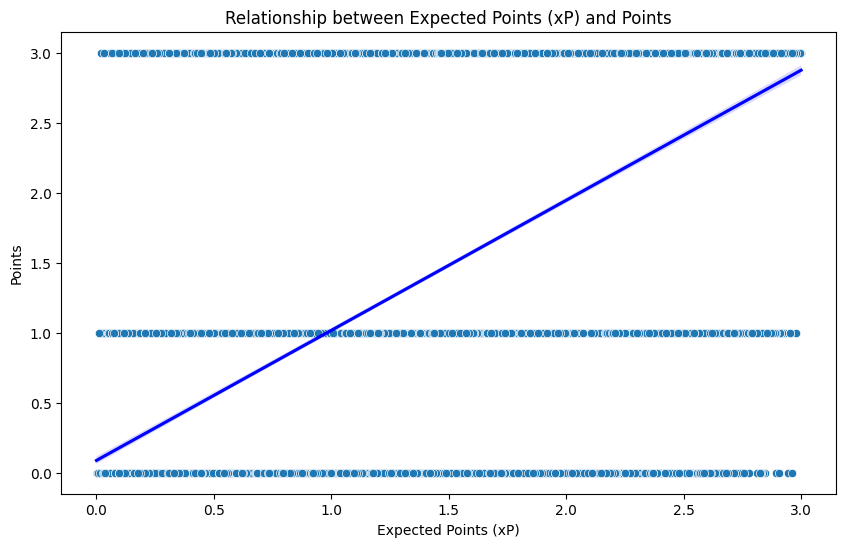

In [14]:
# Plot the relationship between xG and goals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='expected_points', y='points')
sns.regplot(data=combined_data, x='expected_points', y='points', scatter=False, color='blue')
plt.title('Relationship between Expected Points (xP) and Points')
plt.xlabel('Expected Points (xP)')
plt.ylabel('Points')
plt.show()

In [15]:
X = combined_data[['expected_points']]
y = combined_data['points']
model = LinearRegression().fit(X, y)

# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(combined_data['expected_points'], combined_data['points'])[0, 1]

print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {correlation_coefficient:.4f}")

Equation of the line of best fit: y = 0.9293x + 0.0876
Correlation coefficient (r): 0.5976


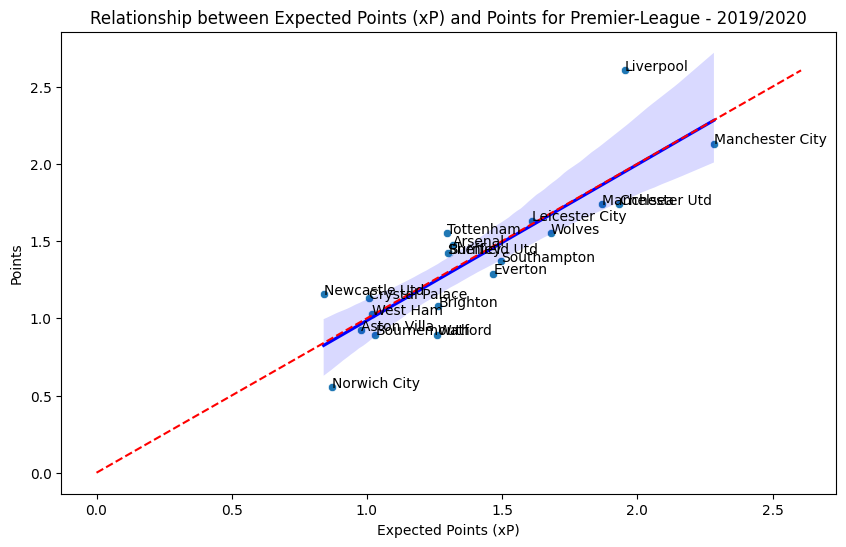

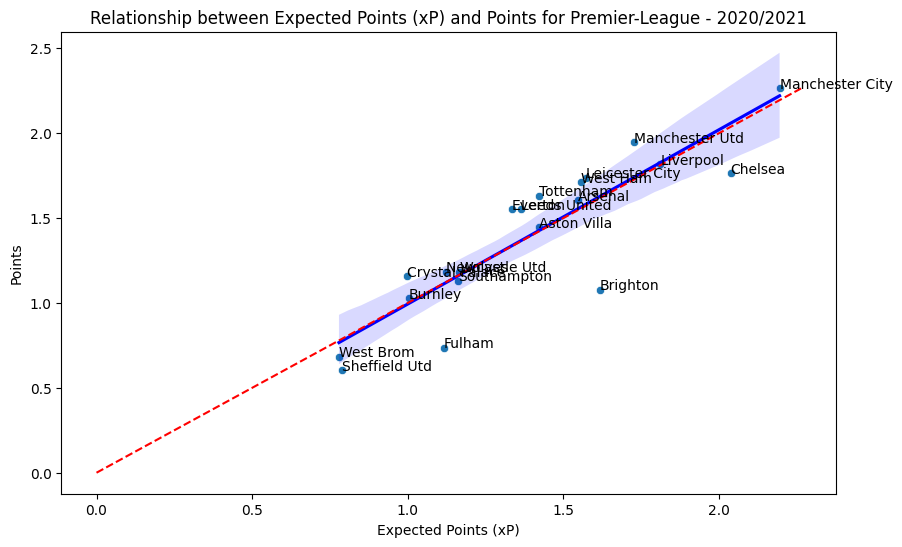

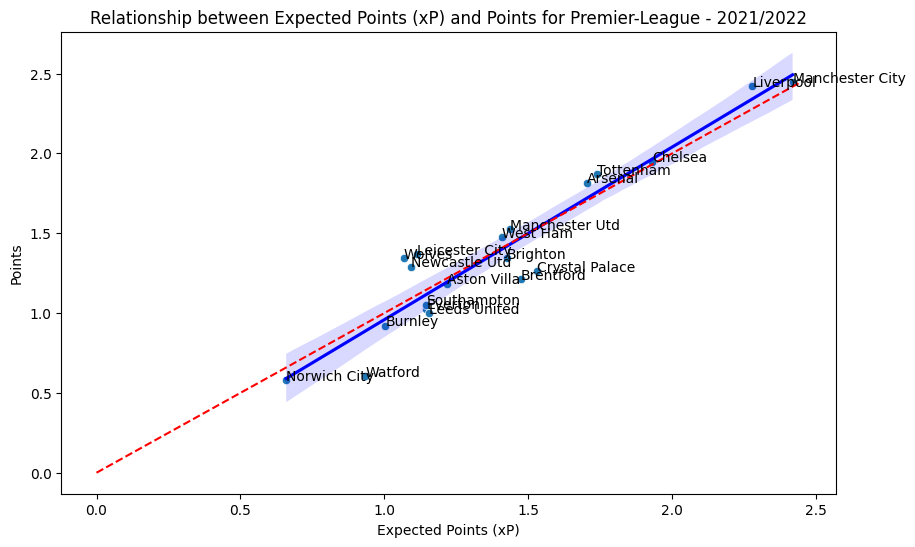

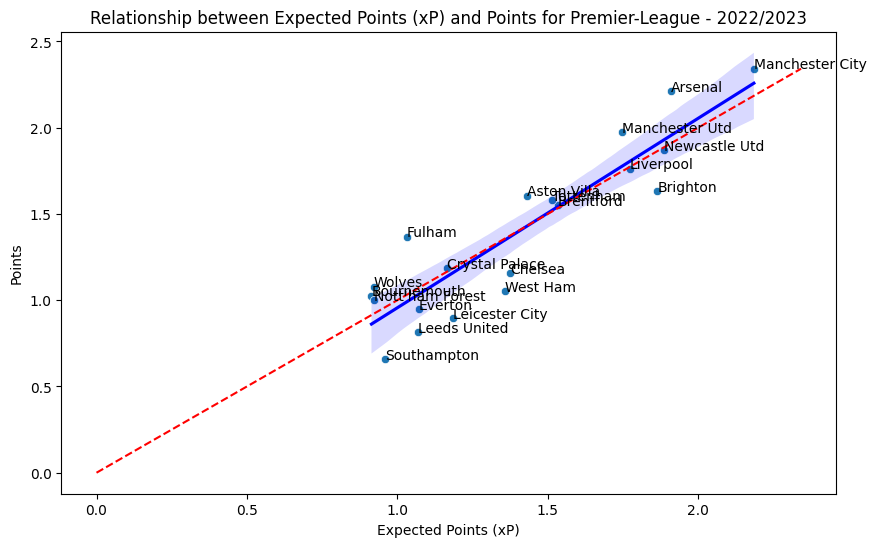

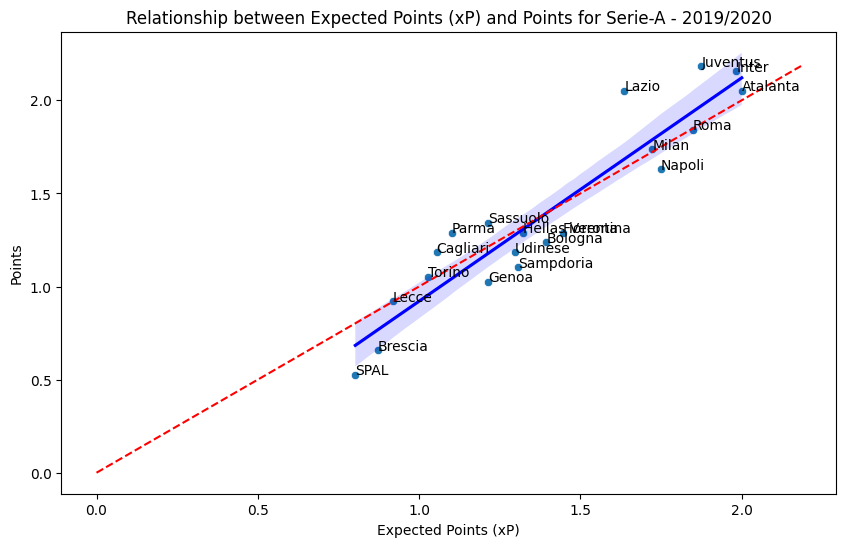

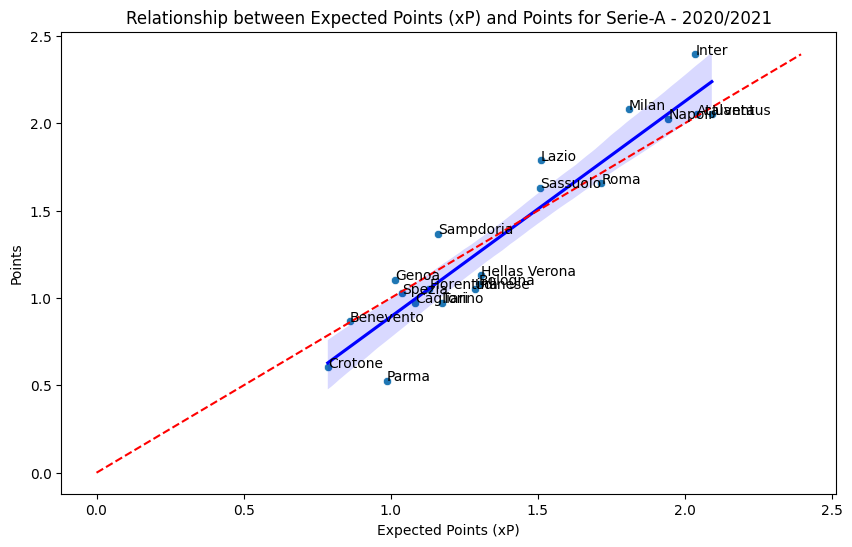

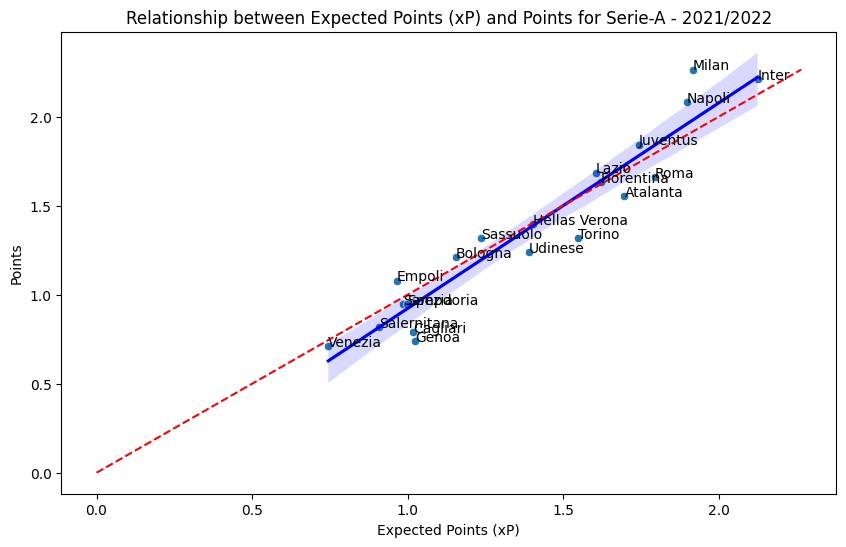

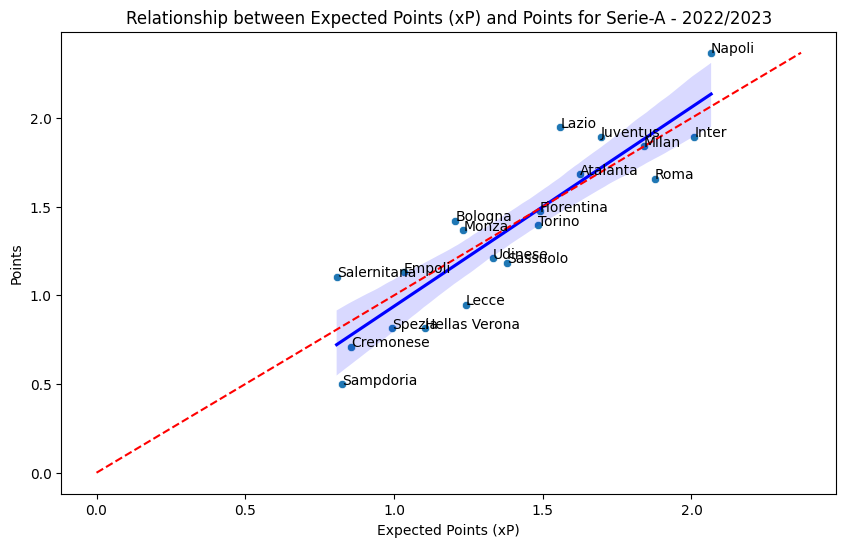

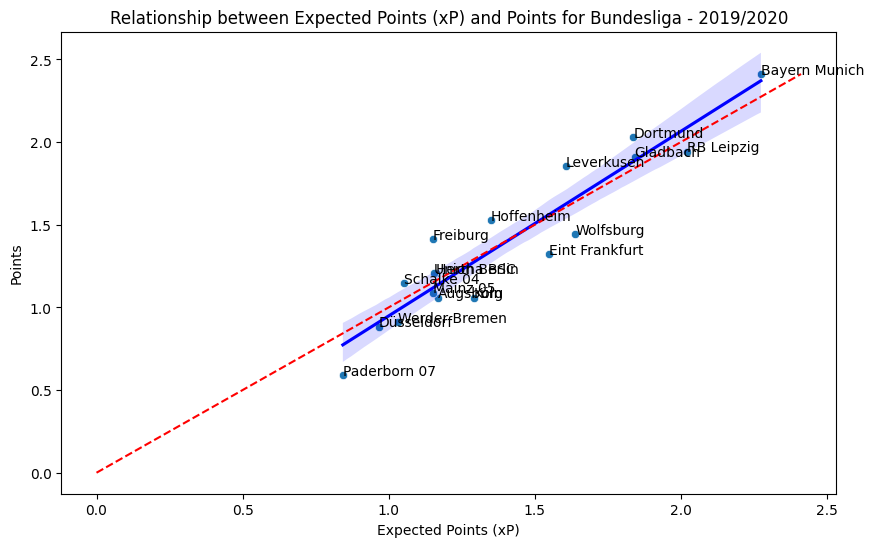

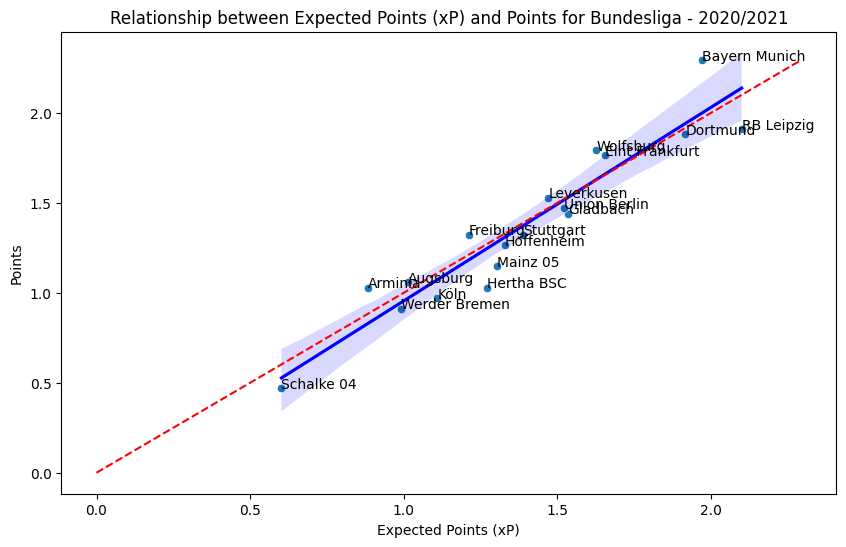

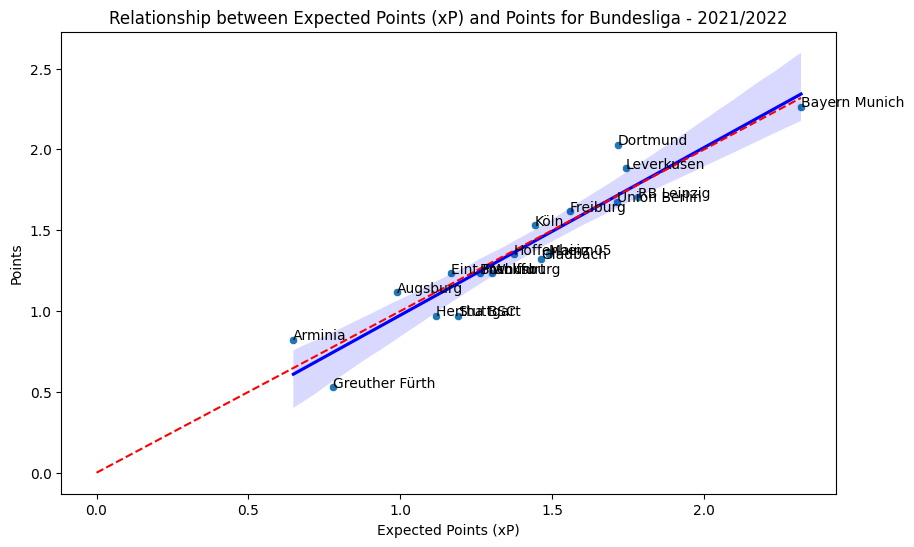

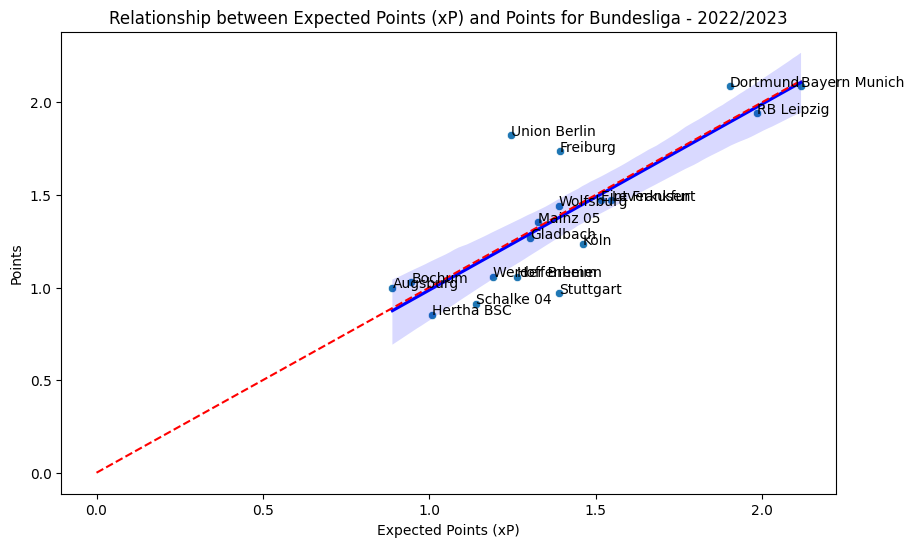

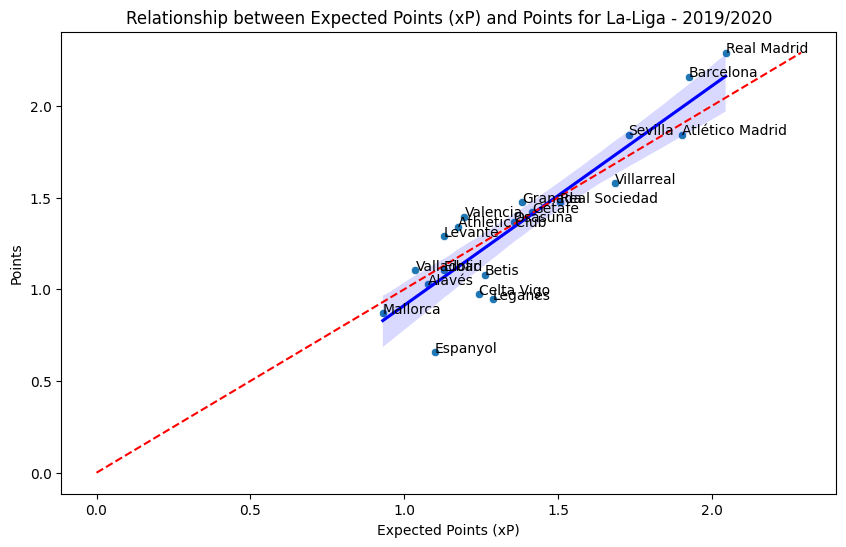

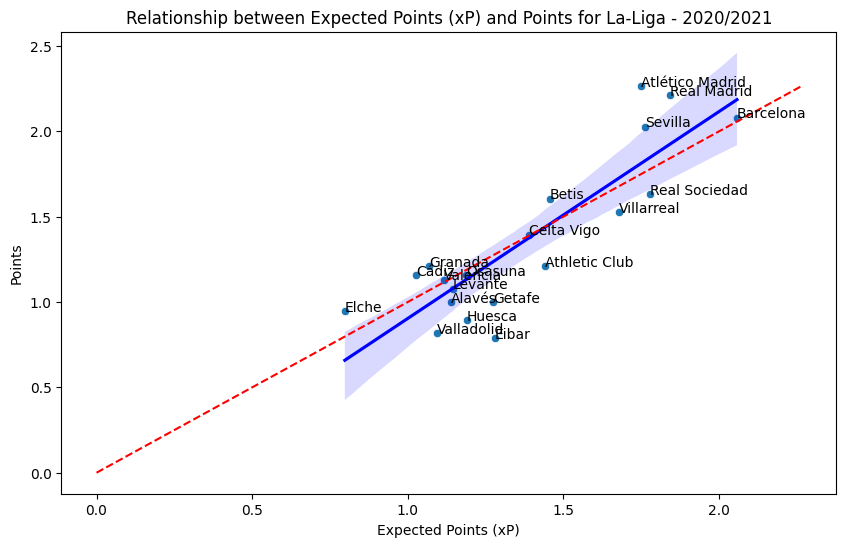

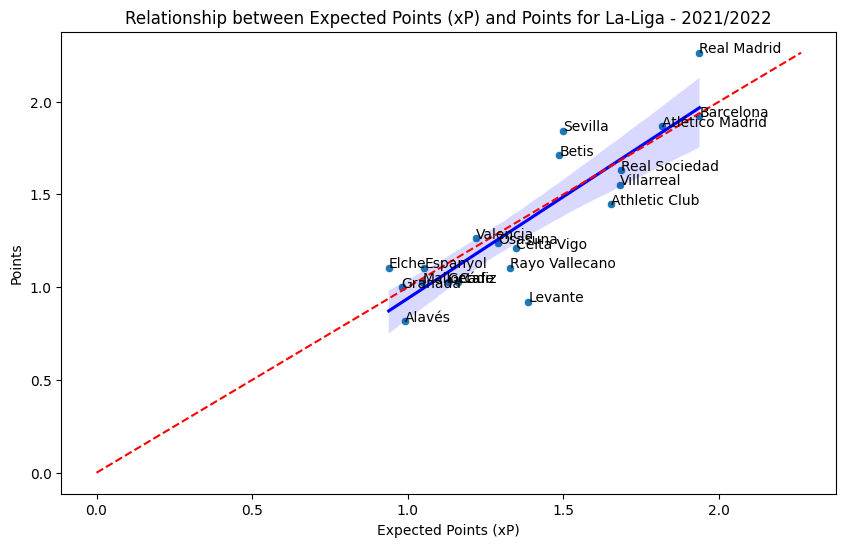

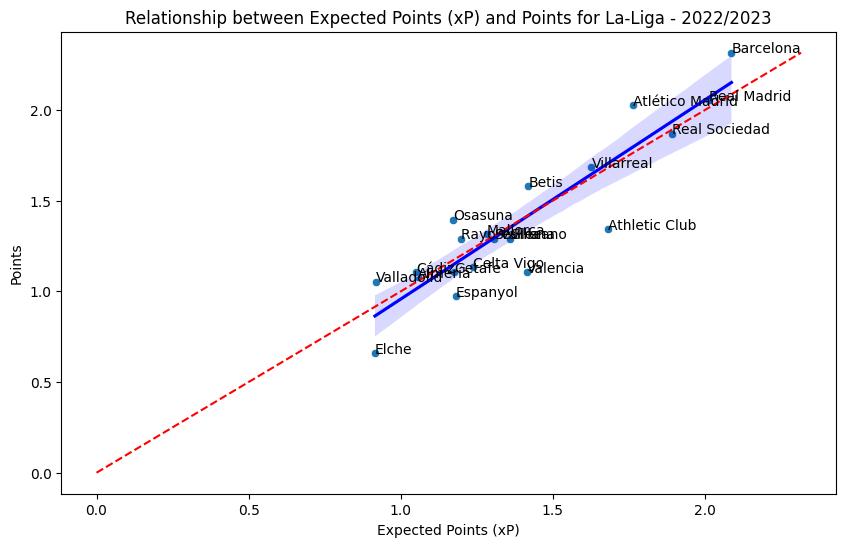

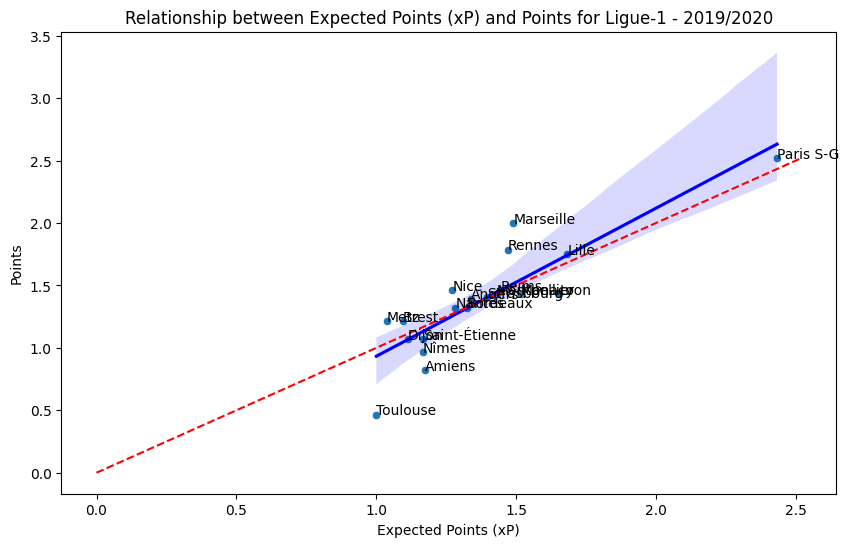

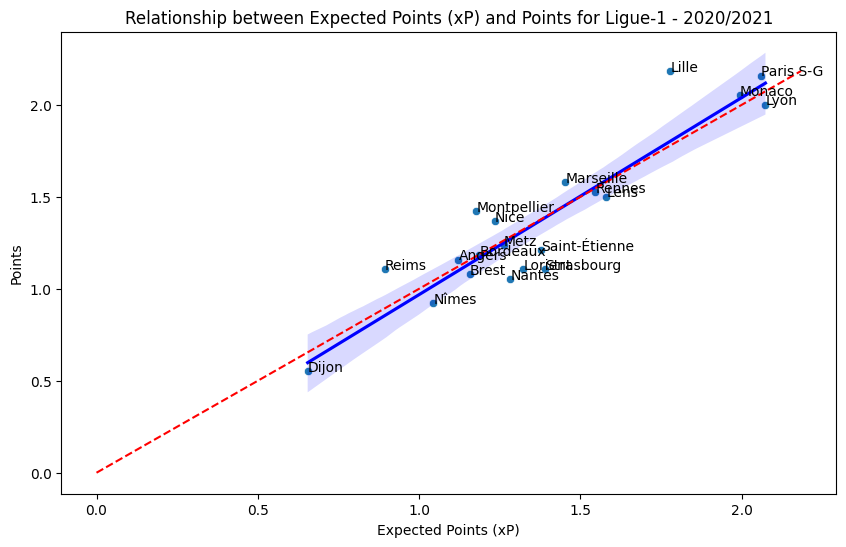

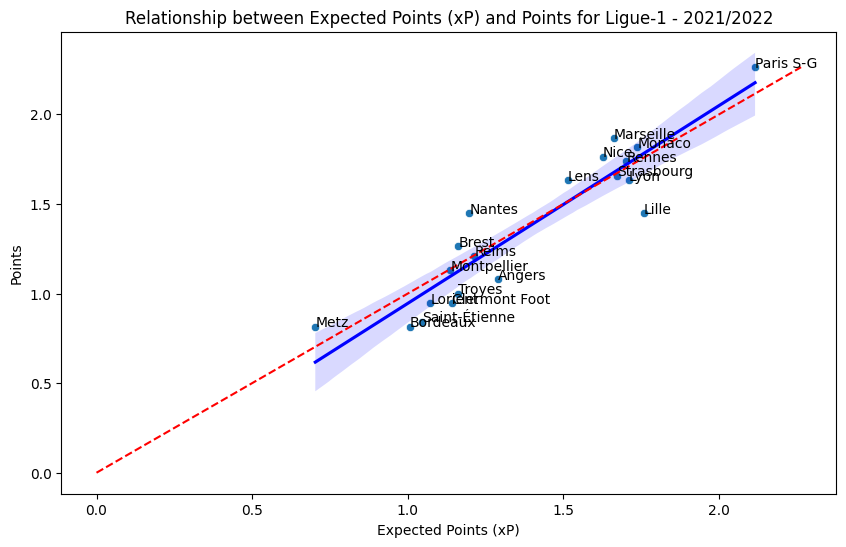

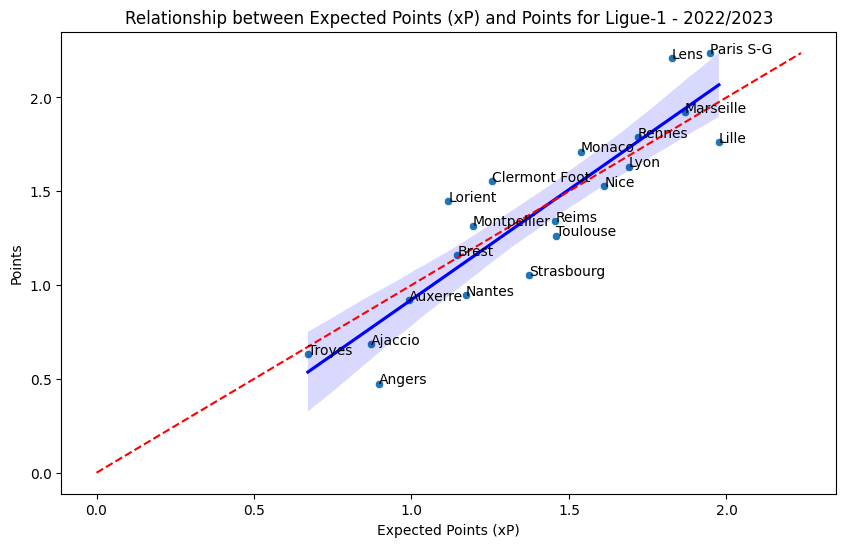

In [16]:
# Plot the relationship between xG and goals for each league
leagues = combined_data['league'].unique()
seasons = combined_data['season'].unique()

for league in leagues:
    for season in seasons:
        league_season_data = average_data[(average_data['league'] == league) & (average_data['season'] == season)]

        if not league_season_data.empty:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=league_season_data, x='expected_points', y='points')

            # Add a line of best fit
            sns.regplot(data=league_season_data, x='expected_points', y='points', scatter=False, color='blue')

            # Add the y=x line
            max_val = max(league_season_data['expected_points'].max(), league_season_data['points'].max())
            plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

            # Add team labels
            for i in range(len(league_season_data)):
                plt.text(league_season_data['expected_points'].iloc[i], league_season_data['points'].iloc[i], league_season_data['team'].iloc[i])

            plt.title(f'Relationship between Expected Points (xP) and Points for {league} - {season}')
            plt.xlabel('Expected Points (xP)')
            plt.ylabel('Points')
            plt.show()

PPDA vs Possesion
`

In [17]:
# Perform total regression on combined_data
X = combined_data[['Poss']]
y = combined_data['PPDA']
model = LinearRegression().fit(X, y)

# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(combined_data['Poss'], combined_data['PPDA'])[0, 1]

print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {correlation_coefficient:.4f}")


Equation of the line of best fit: y = -0.3623x + 30.4395
Correlation coefficient (r): -0.5981


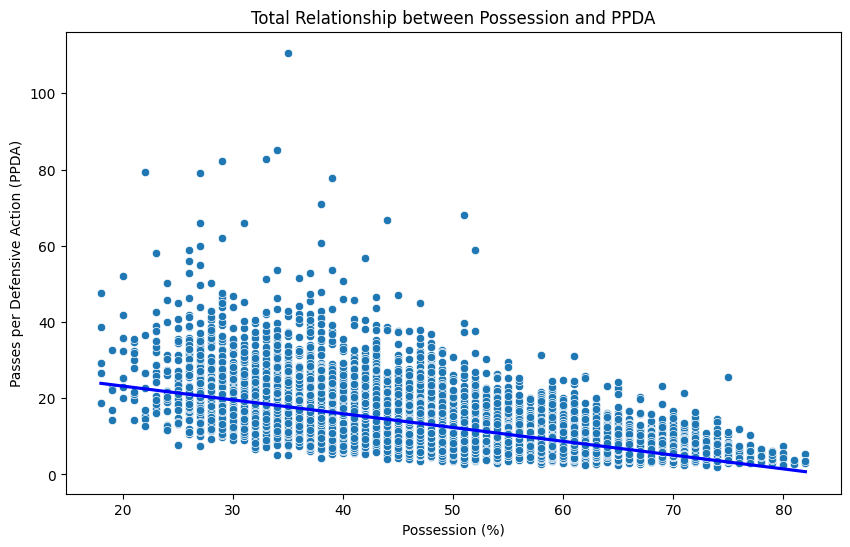

In [18]:
# Plot the total relationship between possession and PPDA with the line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='Poss', y='PPDA')
sns.regplot(data=combined_data, x='Poss', y='PPDA', scatter=False, color='blue')
plt.title('Total Relationship between Possession and PPDA')
plt.xlabel('Possession (%)')
plt.ylabel('Passes per Defensive Action (PPDA)')

# # Add the y=x line
# max_val = max(combined_data['Poss'].max(), combined_data['PPDA'].max())
# plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.show()

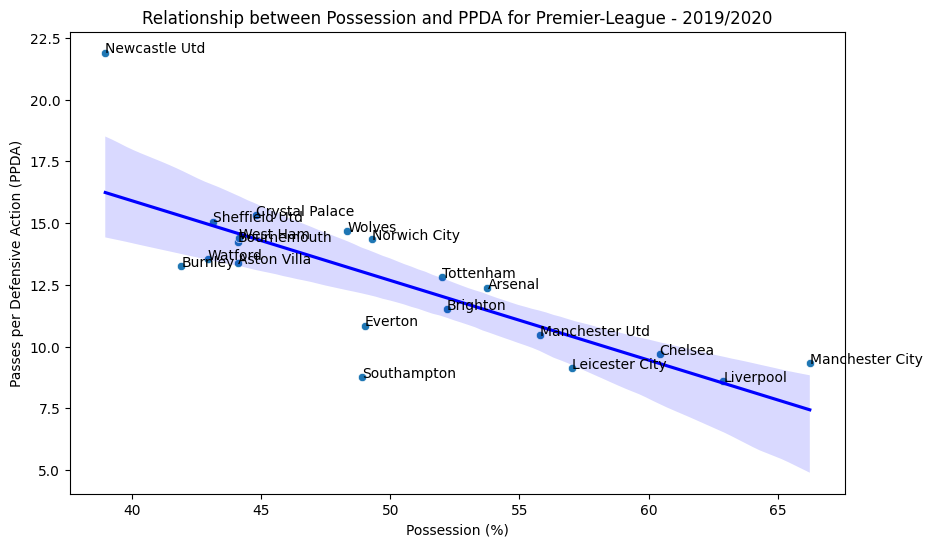

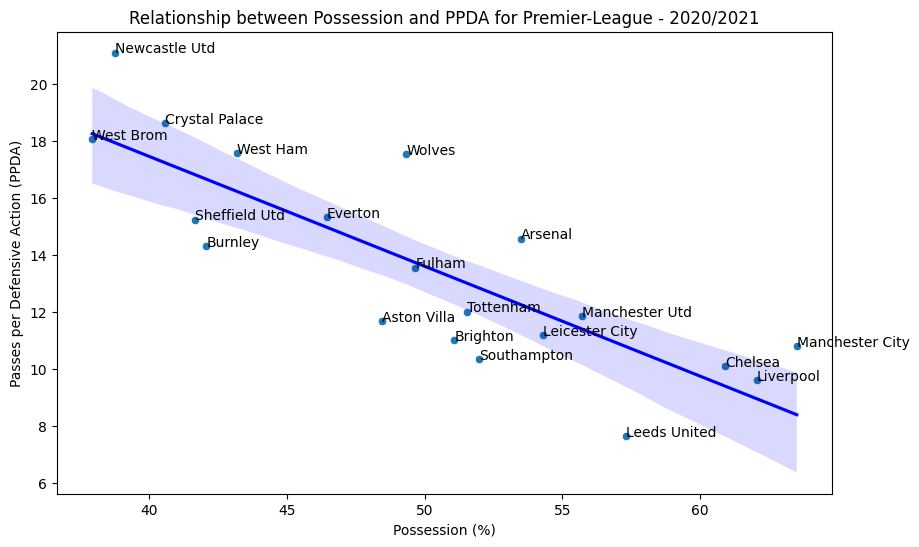

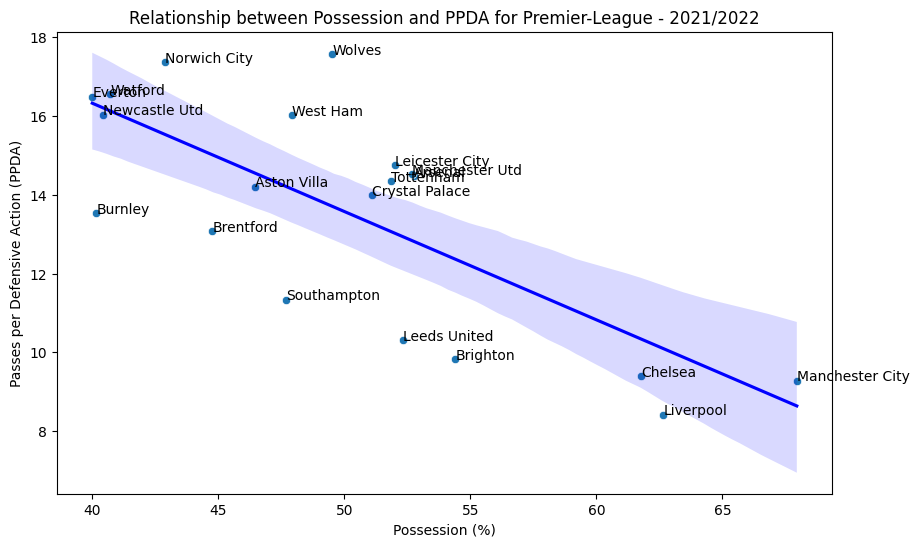

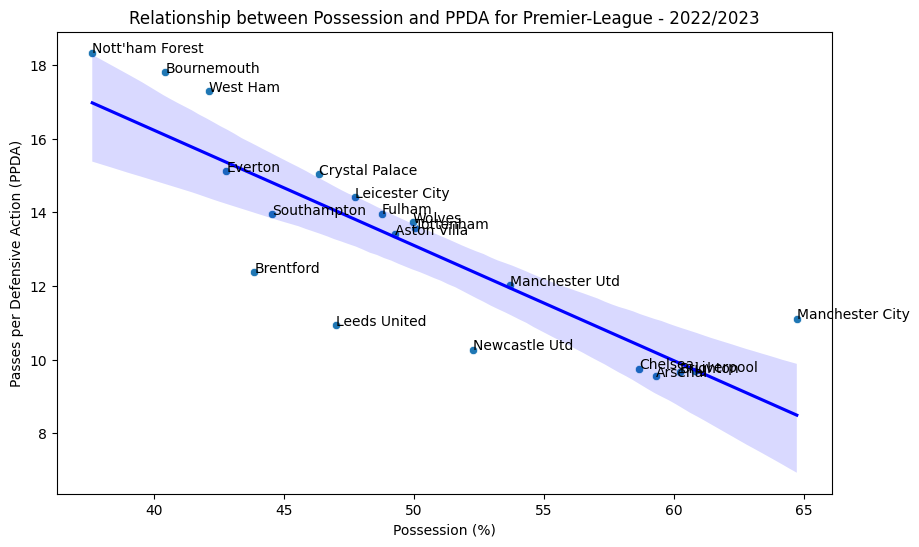

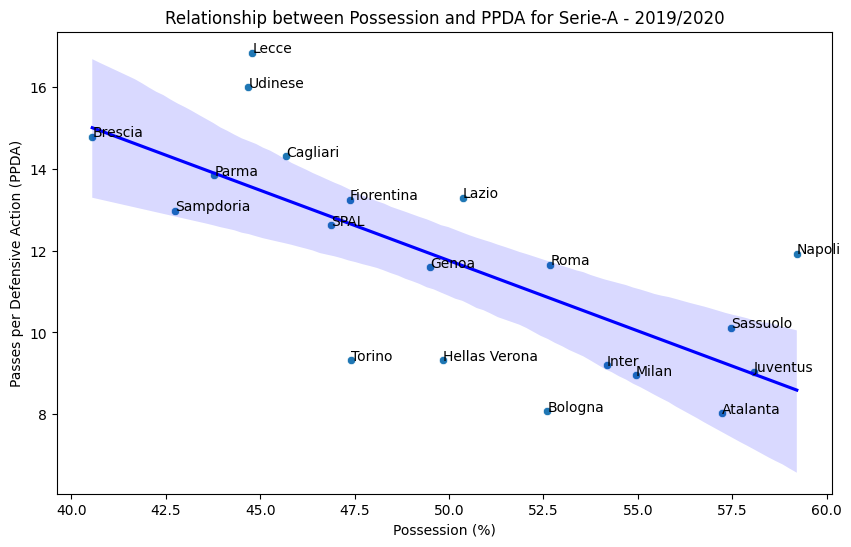

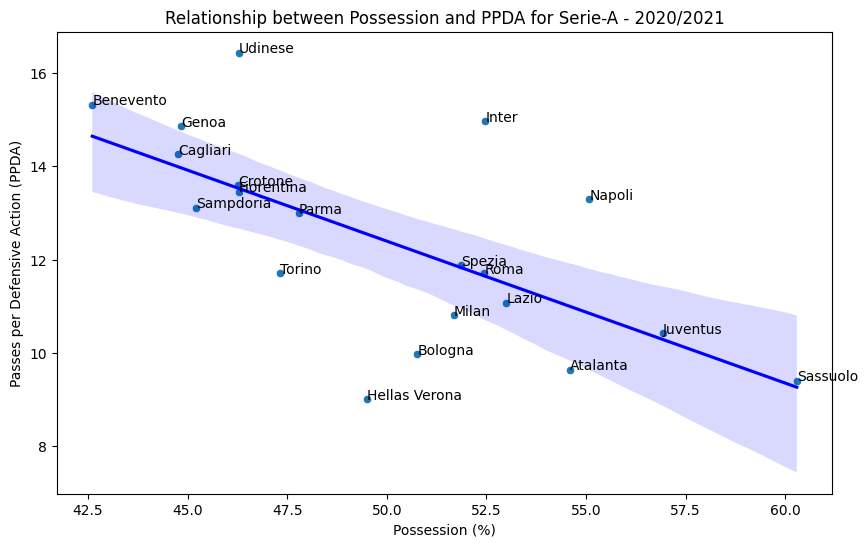

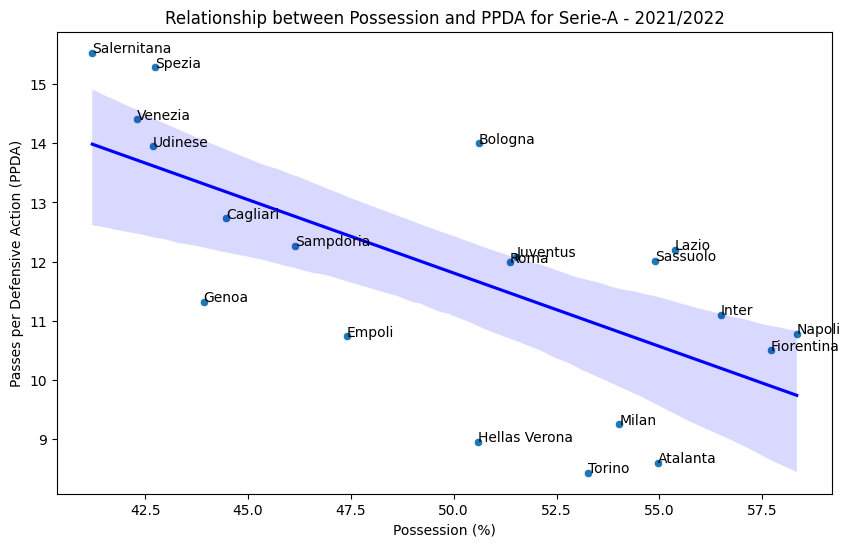

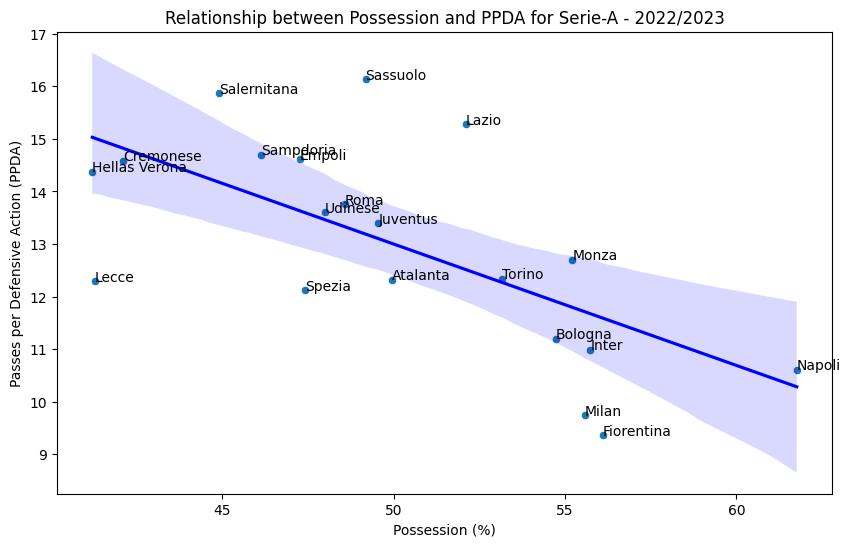

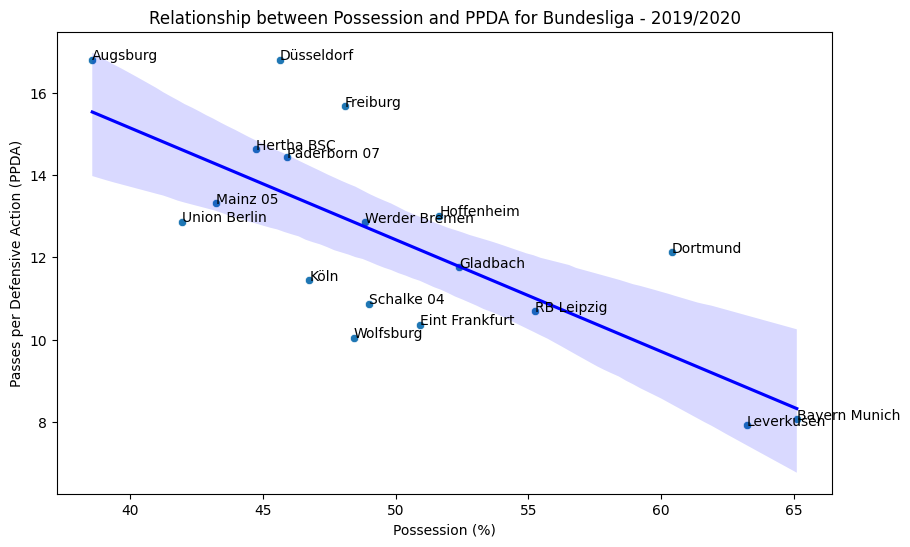

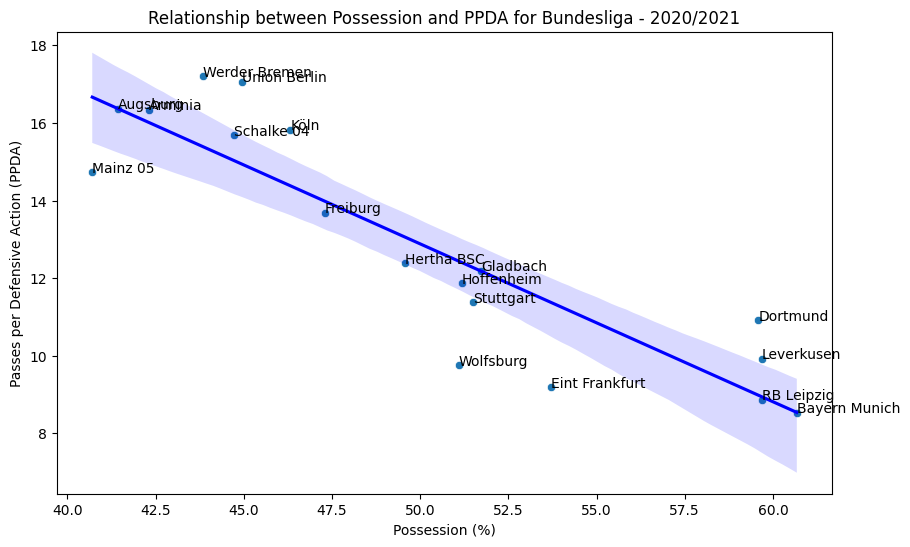

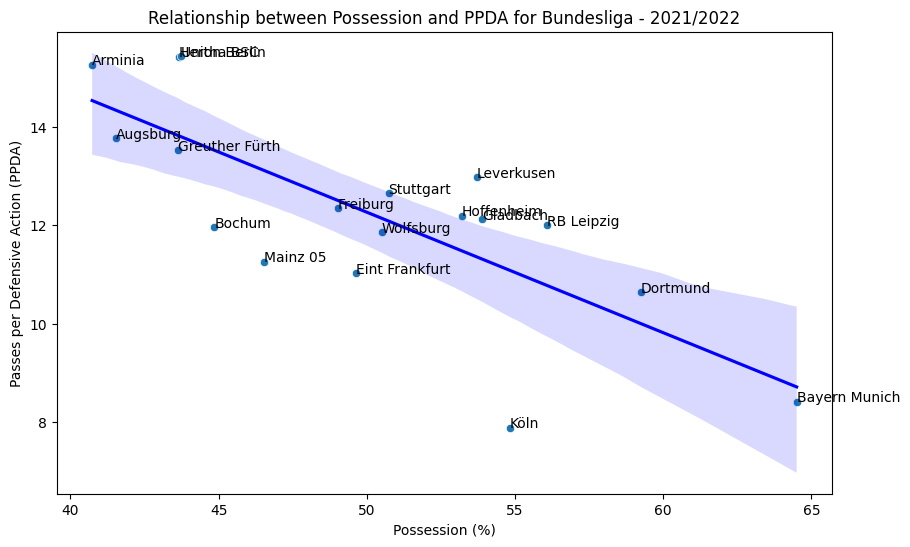

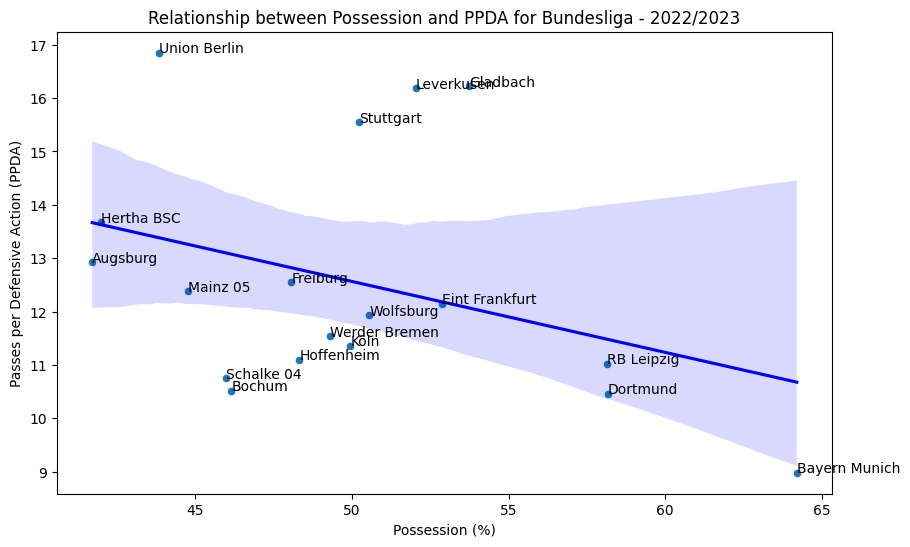

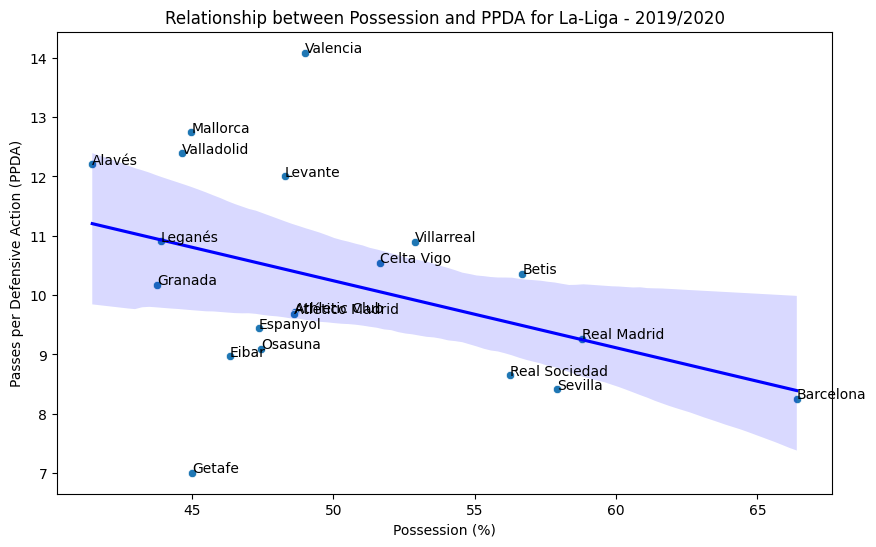

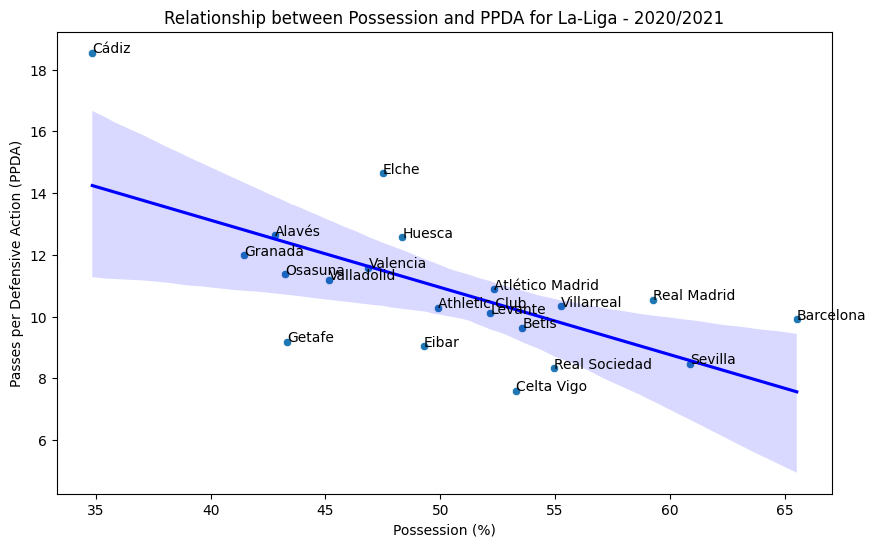

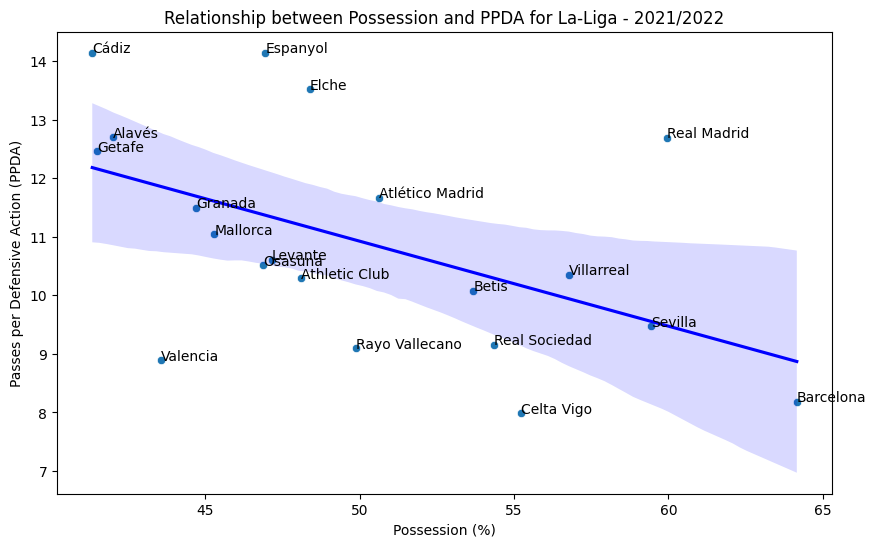

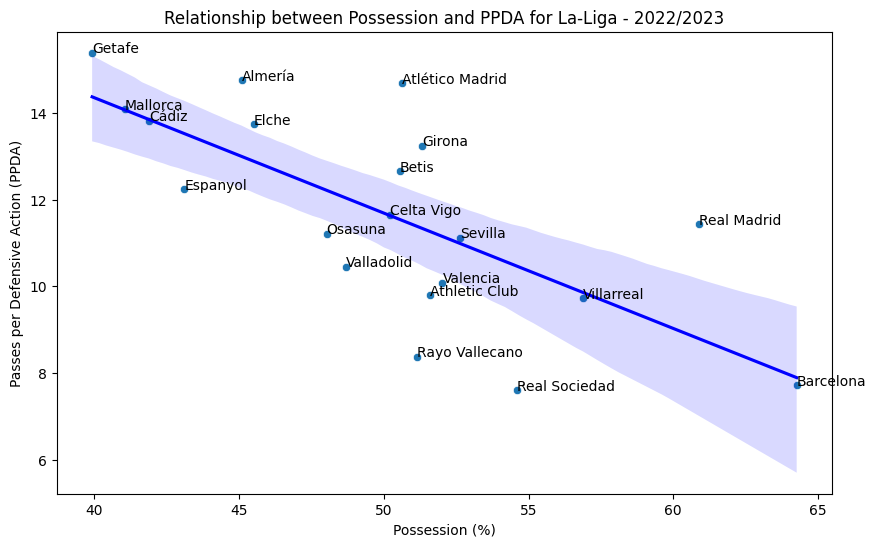

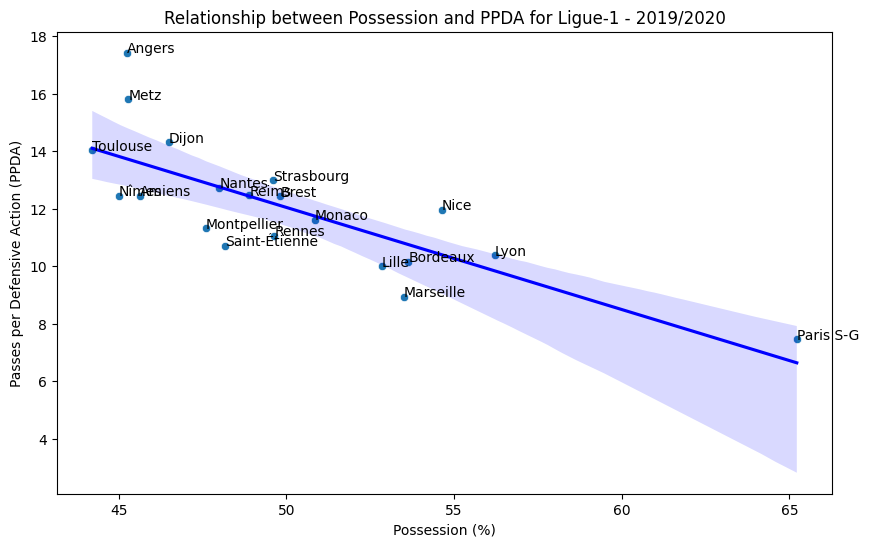

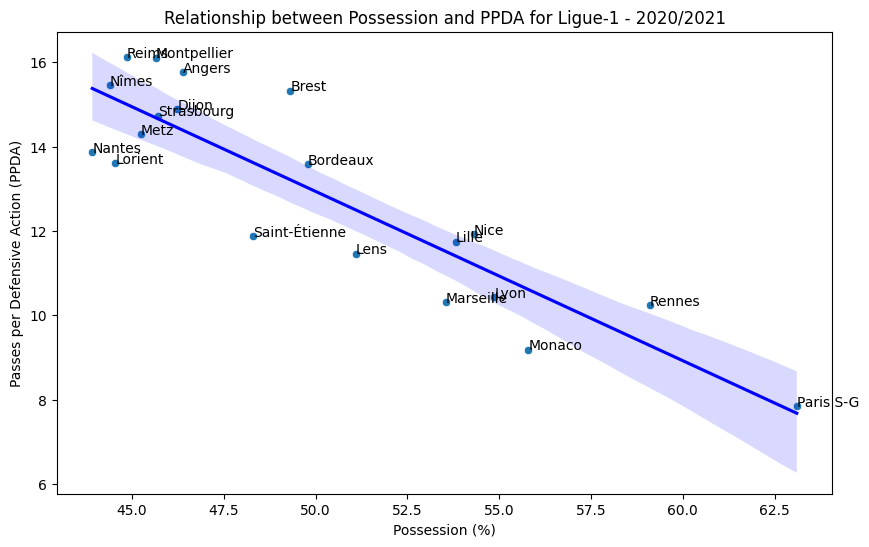

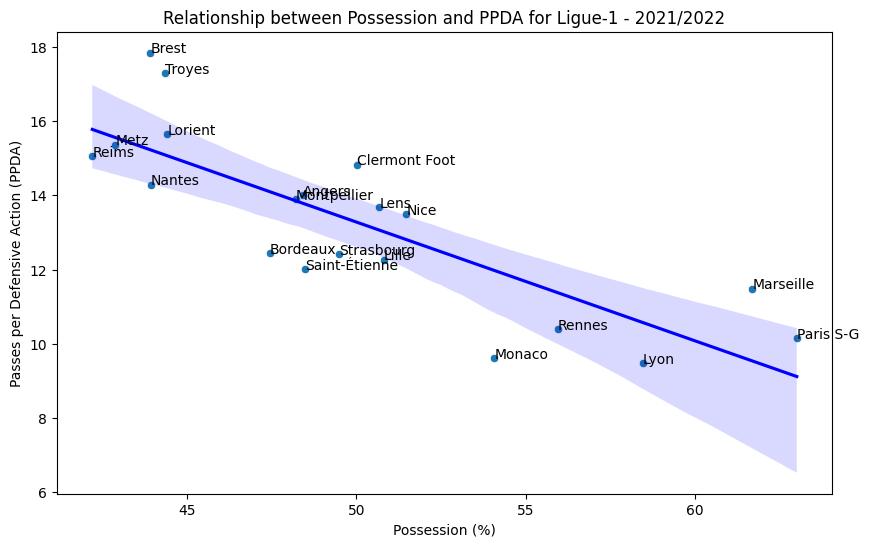

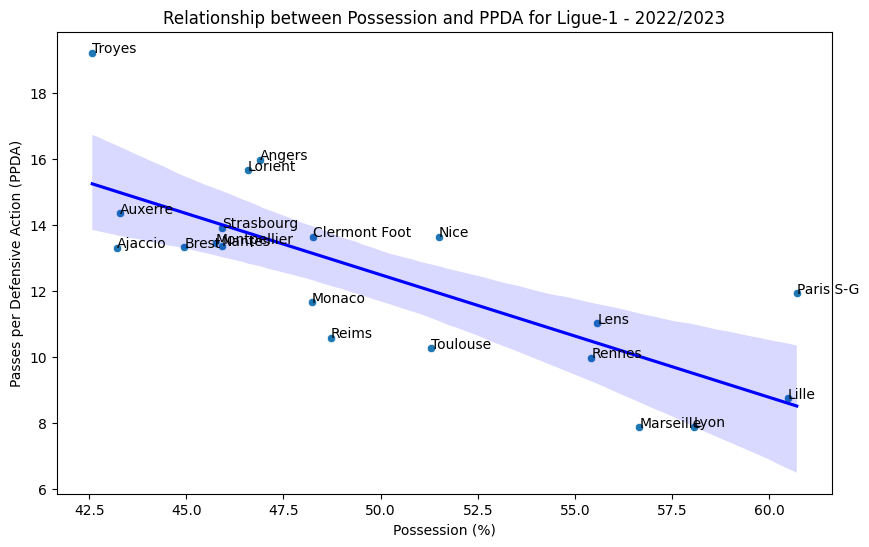

In [19]:
for league in leagues:
    for season in seasons:
        league_season_data = average_data[(average_data['league'] == league) & (average_data['season'] == season)]

        if not league_season_data.empty:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=league_season_data, x='Poss', y='PPDA')

            # Add a line of best fit
            sns.regplot(data=league_season_data, x='Poss', y='PPDA', scatter=False, color='blue')

            # Add team labels
            for i in range(len(league_season_data)):
                plt.text(league_season_data['Poss'].iloc[i], league_season_data['PPDA'].iloc[i], league_season_data['team'].iloc[i])

            plt.title(f'Relationship between Possession and PPDA for {league} - {season}')
            plt.xlabel('Possession (%)')
            plt.ylabel('Passes per Defensive Action (PPDA)')
            plt.show()


# EDA For Match Result

Feature Engineering

In [20]:
# Get all numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Display the numerical columns
print("Numerical columns in the dataset:")
print(numerical_columns)

Numerical columns in the dataset:
['home_Poss', 'home_Touches', 'home_Take-Ons', 'home_Carries', 'home_Receiving', 'away_Poss', 'away_Touches', 'away_Take-Ons', 'away_Carries', 'away_Receiving', 'away_points', 'away_expected_points', 'away_goals', 'away_xg', 'away_np_xg', 'away_np_xg_difference', 'away_ppda', 'away_deep_completions', 'home_points', 'home_expected_points', 'home_goals', 'home_xg', 'home_np_xg', 'home_np_xg_difference', 'home_ppda', 'home_deep_completions', 'Half_Time_Home_Goals', 'Half_Time_Away_Goals', 'Home_Shots', 'Away_Shots', 'Home_Shots_on_Target', 'Away_Shots_on_Target', 'Home_Fouls', 'Away_Fouls', 'Home_Corners', 'Away_Corners', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards', 'Bet365_Home_Win', 'Bet365_Draw', 'Bet365_Away_Win', 'Bwin_Home_Win', 'Bwin_Draw', 'Bwin_Away_Win', 'Interwetten_Home_Win', 'Interwetten_Draw', 'Interwetten_Away_Win', 'Pinnacle_Home_Win', 'Pinnacle_Draw', 'Pinnacle_Away_Win', 'WilliamHill_Home_Win', 'WilliamHi

In [21]:
# Normalize column names to lowercase
df.columns = [col.lower() for col in df.columns]

# Columns with relevant numerical values
numeric_columns = [
    'home_poss', 'home_touches', 'home_take-ons', 'home_carries', 'home_receiving',
    'away_poss', 'away_touches', 'away_take-ons', 'away_carries', 'away_receiving',
    'away_points', 'away_expected_points', 'away_goals', 'away_xg', 'away_np_xg',
    'away_np_xg_difference', 'away_ppda', 'away_deep_completions', 'home_points',
    'home_expected_points', 'home_goals', 'home_xg', 'home_np_xg', 'home_np_xg_difference',
    'home_ppda', 'home_deep_completions', 'half_time_home_goals', 'half_time_away_goals',
    'home_shots', 'away_shots', 'home_shots_on_target', 'away_shots_on_target', 'home_fouls',
    'away_fouls', 'home_corners', 'away_corners', 'home_yellow_cards', 'away_yellow_cards',
    'home_red_cards', 'away_red_cards'
]

# Create a new DataFrame called learning_df
learning_df = pd.DataFrame()

# Create difference columns for each numeric feature
for col in numeric_columns:
    if 'home' in col:
        away_col = col.replace('home', 'away')
        if away_col in df.columns:
            diff_col = 'diff_' + col.replace('home_', '')
            learning_df[diff_col] = df[col] - df[away_col]
    elif 'away' in col:
        home_col = col.replace('away', 'home')
        if home_col in df.columns:
            diff_col = 'diff_' + col.replace('away_', '')
            learning_df[diff_col] = df[home_col] - df[col]

# Add the target variable 'result' to learning_df
learning_df['result'] = df['result']

# Display the first few rows of learning_df
print(learning_df.head())

   diff_poss  diff_touches  diff_take-ons  diff_carries  diff_receiving  \
0       14.0          93.0           -1.0          81.0           104.0   
1      -14.0        -159.0           -6.0        -176.0          -143.0   
2       -6.0         -49.0            4.0         -16.0           -51.0   
3       -2.0         -35.0            3.0          36.0           -20.0   
4      -28.0        -263.0           -2.0        -242.0          -256.0   

   diff_points  diff_expected_points  diff_goals   diff_xg  diff_np_xg  ...  \
0            3                1.9458           3  1.392153    1.392153  ...   
1           -3               -2.3790          -5 -1.983470   -1.222340  ...   
2            3               -0.3714           3 -0.178279   -0.178279  ...   
3           -3               -0.4536          -3 -0.185494   -0.185494  ...   
4            0               -0.5745           0 -0.353010   -0.353010  ...   

   diff_ppda  diff_deep_completions  diff_half_time_goals  diff_shots  \
0

Basic EDA

In [22]:
learning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   diff_poss              7203 non-null   float64
 1   diff_touches           7203 non-null   float64
 2   diff_take-ons          7203 non-null   float64
 3   diff_carries           7203 non-null   float64
 4   diff_receiving         7203 non-null   float64
 5   diff_points            7203 non-null   int64  
 6   diff_expected_points   7203 non-null   float64
 7   diff_goals             7203 non-null   int64  
 8   diff_xg                7203 non-null   float64
 9   diff_np_xg             7203 non-null   float64
 10  diff_np_xg_difference  7203 non-null   float64
 11  diff_ppda              7203 non-null   float64
 12  diff_deep_completions  7203 non-null   int64  
 13  diff_half_time_goals   7203 non-null   int64  
 14  diff_shots             7203 non-null   int64  
 15  diff

In [23]:
learning_df.describe()

diff_poss  diff_touches  diff_take-ons  diff_carries  diff_receiving  \
count  7203.000000   7203.000000    7203.000000   7203.000000     7203.000000   
mean      2.077468     19.927371       0.809610     17.590057       20.552284   
std      22.184074    216.823710       8.228866    187.457076      220.226846   
min     -64.000000   -745.000000     -36.000000   -678.000000     -744.000000   
25%     -14.000000   -131.000000      -5.000000   -111.000000     -132.000000   
50%       2.000000     19.000000       1.000000     15.000000       20.000000   
75%      18.000000    169.000000       6.000000    148.000000      173.000000   
max      64.000000    773.000000      38.000000    697.000000      786.000000   

       diff_points  diff_expected_points   diff_goals      diff_xg  \
count  7203.000000           7203.000000  7203.000000  7203.000000   
mean      0.336110              0.324241     0.270304     0.267940   
std       2.576604              1.658995     1.836738     1.366150   
min      -3.000000             -2.999100    -9.000000    -5.368082   
25%      -3.000000             -1.000350    -1.000000    -0.590172   
50%       0.000000              0.415500     0.000000     0.232550   
75%       3.000000              1.769250     1.000000     1.132945   
max       3.000000              2.998800     9.000000     6.285772   

        diff_np_xg  diff_np_xg_difference    diff_ppda  diff_deep_completions  \
count  7203.000000            7203.000000  7203.000000            7203.000000   
mean      0.239155               0.478310    -1.202749               1.022629   
std       1.262344               2.524687    10.441763               6.534268   
min      -5.368082             -10.736164  -104.515152             -26.000000   
25%      -0.539838              -1.079676    -6.498148              -3.000000   
50%       0.209403               0.418806    -0.851675               1.000000   
75%       1.002566               2.005132     4.356949               5.000000   
max       5.648770              11.297540    68.288462              40.000000   

       diff_half_time_goals   diff_shots  diff_shots_on_target   diff_fouls  \
count           7203.000000  7203.000000           7203.000000  7203.000000   
mean               0.121200     2.095377              0.750104    -0.120367   
std                1.177239     7.965904              3.776199     5.132927   
min               -6.000000   -25.000000            -18.000000   -18.000000   
25%               -1.000000    -3.000000             -2.000000    -4.000000   
50%                0.000000     2.000000              1.000000     0.000000   
75%                1.000000     7.000000              3.000000     3.000000   
max                5.000000    42.000000             17.000000    23.000000   

       diff_corners  diff_yellow_cards  diff_red_cards  
count   7203.000000         7203.00000     7203.000000  
mean       0.831459           -0.19242       -0.012356  
std        4.415163            1.74058        0.429071  
min      -17.000000           -7.00000       -2.000000  
25%       -2.000000           -1.00000        0.000000  
50%        1.000000            0.00000        0.000000  
75%        4.000000            1.00000        0.000000  
max       19.000000            6.00000        2.000000

In [24]:
# Summary Statistics grouped by result
summary_stats = learning_df.groupby('result').describe()
print(summary_stats)

       diff_poss                                                    \
           count      mean        std   min   25%  50%   75%   max   
result                                                               
A         2298.0 -0.360748  21.905027 -64.0 -16.0  0.0  16.0  62.0   
D         1799.0  2.043357  22.377570 -58.0 -14.0  2.0  18.0  64.0   
H         3106.0  3.901159  22.109526 -64.0 -12.0  4.0  20.0  64.0   

       diff_touches             ... diff_yellow_cards      diff_red_cards  \
              count       mean  ...               75%  max          count   
result                          ...                                         
A            2298.0 -15.936933  ...               1.0  6.0         2298.0   
D            1799.0  17.021123  ...               1.0  6.0         1799.0   
H            3106.0  48.145179  ...               1.0  6.0         3106.0   

                                                     
            mean       std  min  25%  50%  75%  max  
result  

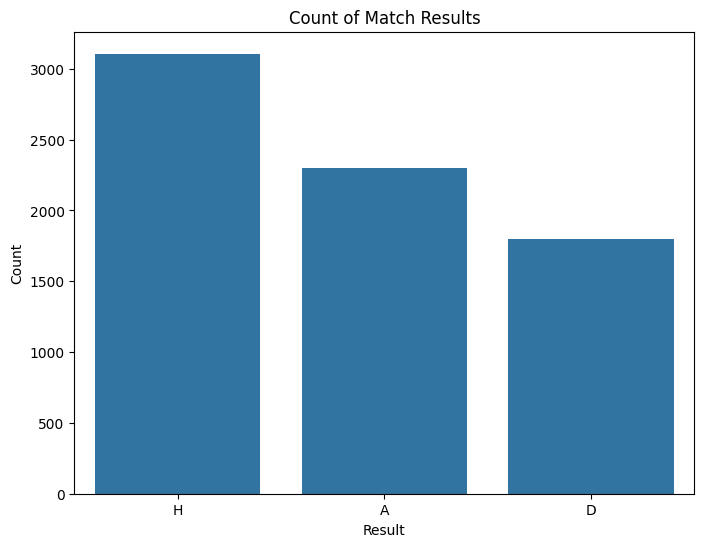

In [25]:
# Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=learning_df)
plt.title('Count of Match Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

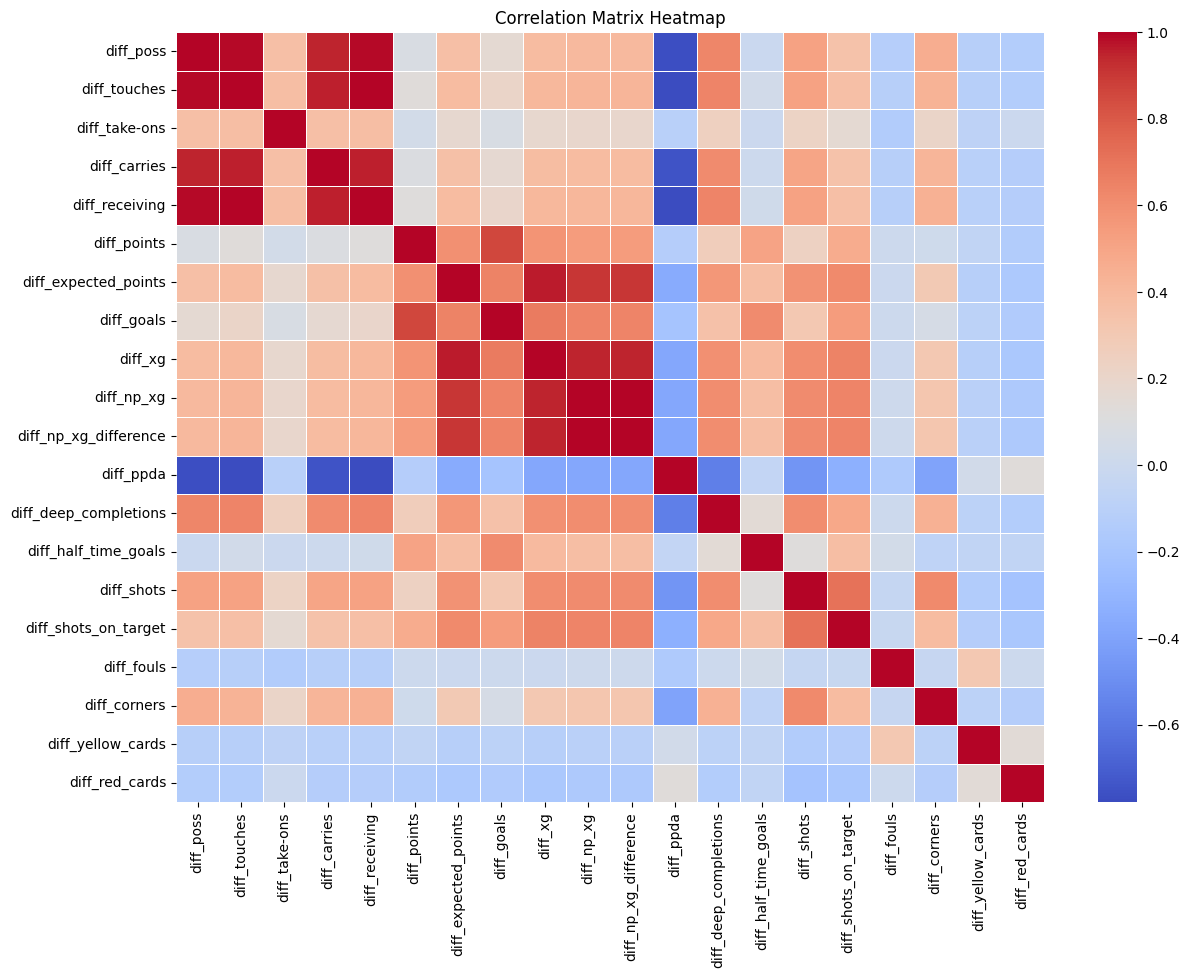

In [26]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = learning_df.drop("result", axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
# Pair Plot
# sns.pairplot(learning_df, hue='result', diag_kind='kde', plot_kws={'alpha':0.5})
# plt.suptitle('Pair Plot of Variables by Result', y=1.02)
# plt.show()

Possession EDA

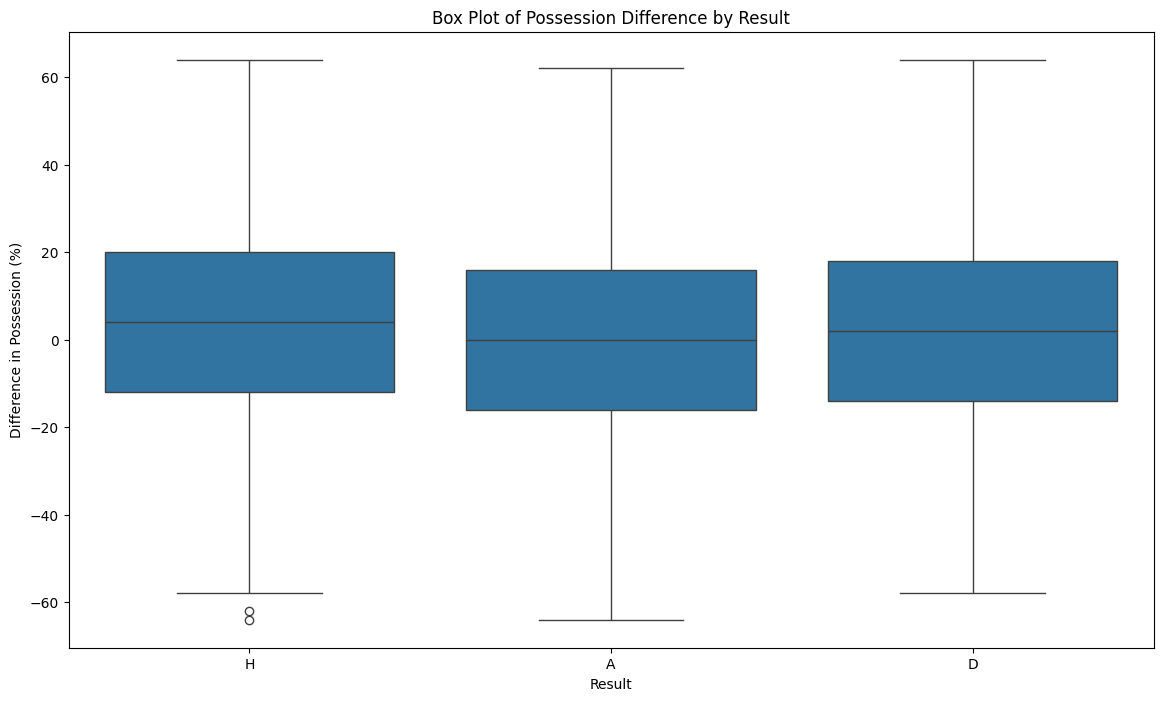

In [28]:
# Box Plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='result', y='diff_poss', data=learning_df)
plt.title('Box Plot of Possession Difference by Result')
plt.xlabel('Result')
plt.ylabel('Difference in Possession (%)')
plt.show()

Shots vs Possession

In [29]:
# Prepare data for regression
X = learning_df['diff_poss'].values.reshape(-1, 1)
y = learning_df['diff_shots'].values

# Fit a linear regression model
model = LinearRegression().fit(X, y)

# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(learning_df['diff_poss'], learning_df['diff_shots'])[0, 1]

# Print the regression equation and correlation coefficient
print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {correlation_coefficient:.4f}")

Equation of the line of best fit: y = 0.1856x + 1.7098
Correlation coefficient (r): 0.5168


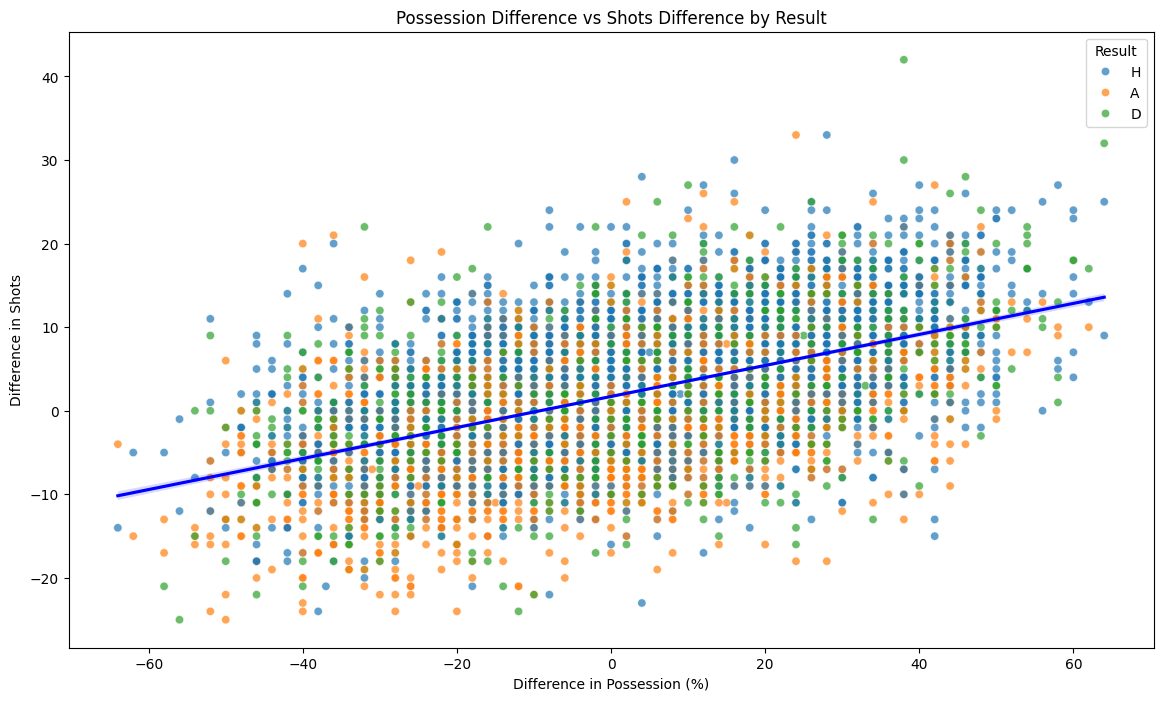

In [30]:
# Scatter Plot: Possession vs Shots with hue of result and line of best fit
plt.figure(figsize=(14, 8))
sns.scatterplot(x='diff_poss', y='diff_shots', hue='result', data=learning_df, alpha=0.7)
sns.regplot(x='diff_poss', y='diff_shots', data=learning_df, scatter=False, color='blue')
plt.title('Possession Difference vs Shots Difference by Result')
plt.xlabel('Difference in Possession (%)')
plt.ylabel('Difference in Shots')
plt.legend(title='Result')
plt.show()

Shots vs Shots on Target

Equation of the line of best fit: y = 0.3383x + 0.0412
Correlation coefficient (r): 0.7137


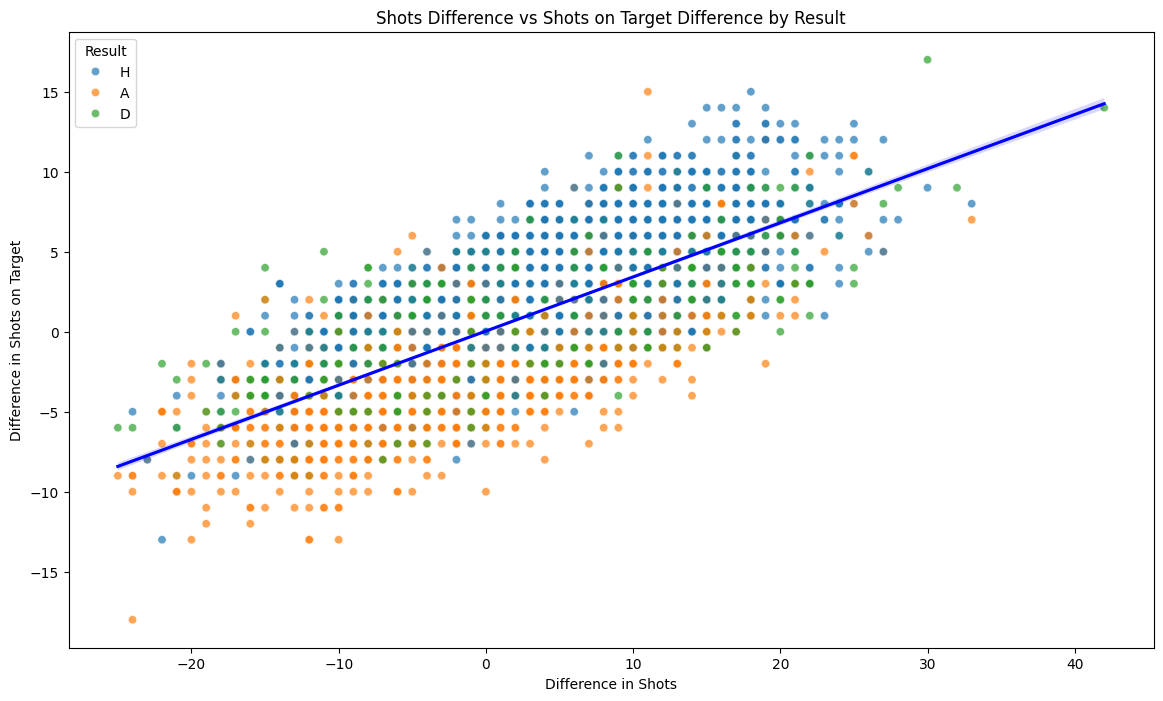

In [31]:
# Prepare data for regression
X = learning_df['diff_shots'].values.reshape(-1, 1)
y = learning_df['diff_shots_on_target'].values

# Fit a linear regression model
model = LinearRegression().fit(X, y)

# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(learning_df['diff_shots'], learning_df['diff_shots_on_target'])[0, 1]

# Print the regression equation and correlation coefficient
print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {correlation_coefficient:.4f}")

# Scatter Plot: Shots vs Shots on Target with hue of result and line of best fit
plt.figure(figsize=(14, 8))
sns.scatterplot(x='diff_shots', y='diff_shots_on_target', hue='result', data=learning_df, alpha=0.7)
sns.regplot(x='diff_shots', y='diff_shots_on_target', data=learning_df, scatter=False, color='blue')
plt.title('Shots Difference vs Shots on Target Difference by Result')
plt.xlabel('Difference in Shots')
plt.ylabel('Difference in Shots on Target')
plt.legend(title='Result')
plt.show()


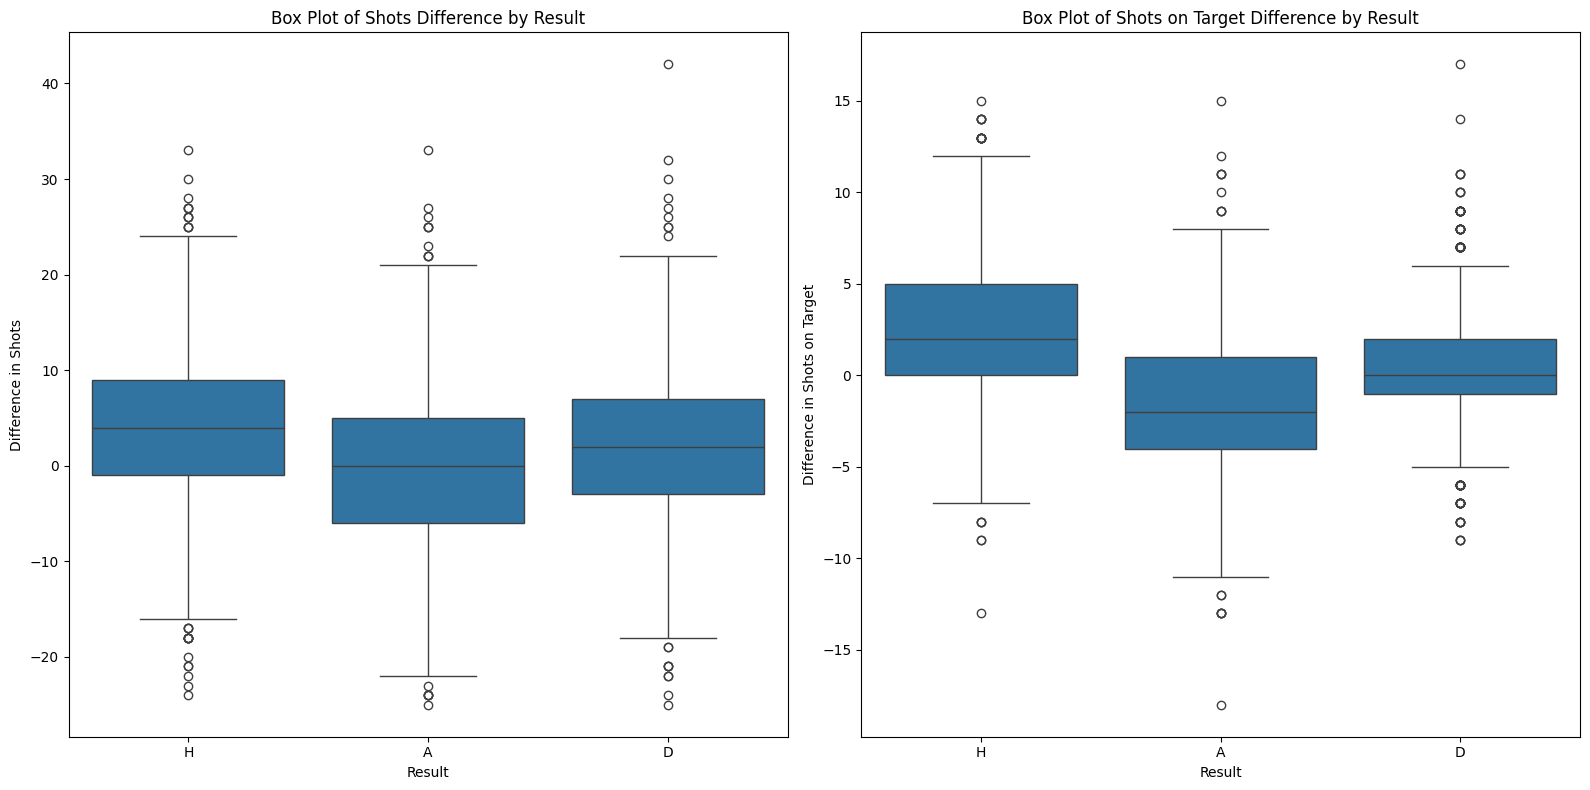

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 8))

# Box Plot: Results vs Shots
plt.subplot(1, 2, 1)
sns.boxplot(x='result', y='diff_shots', data=learning_df)
plt.title('Box Plot of Shots Difference by Result')
plt.xlabel('Result')
plt.ylabel('Difference in Shots')

# Box Plot: Results vs Shots on Target
plt.subplot(1, 2, 2)
sns.boxplot(x='result', y='diff_shots_on_target', data=learning_df)
plt.title('Box Plot of Shots on Target Difference by Result')
plt.xlabel('Result')
plt.ylabel('Difference in Shots on Target')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Cards

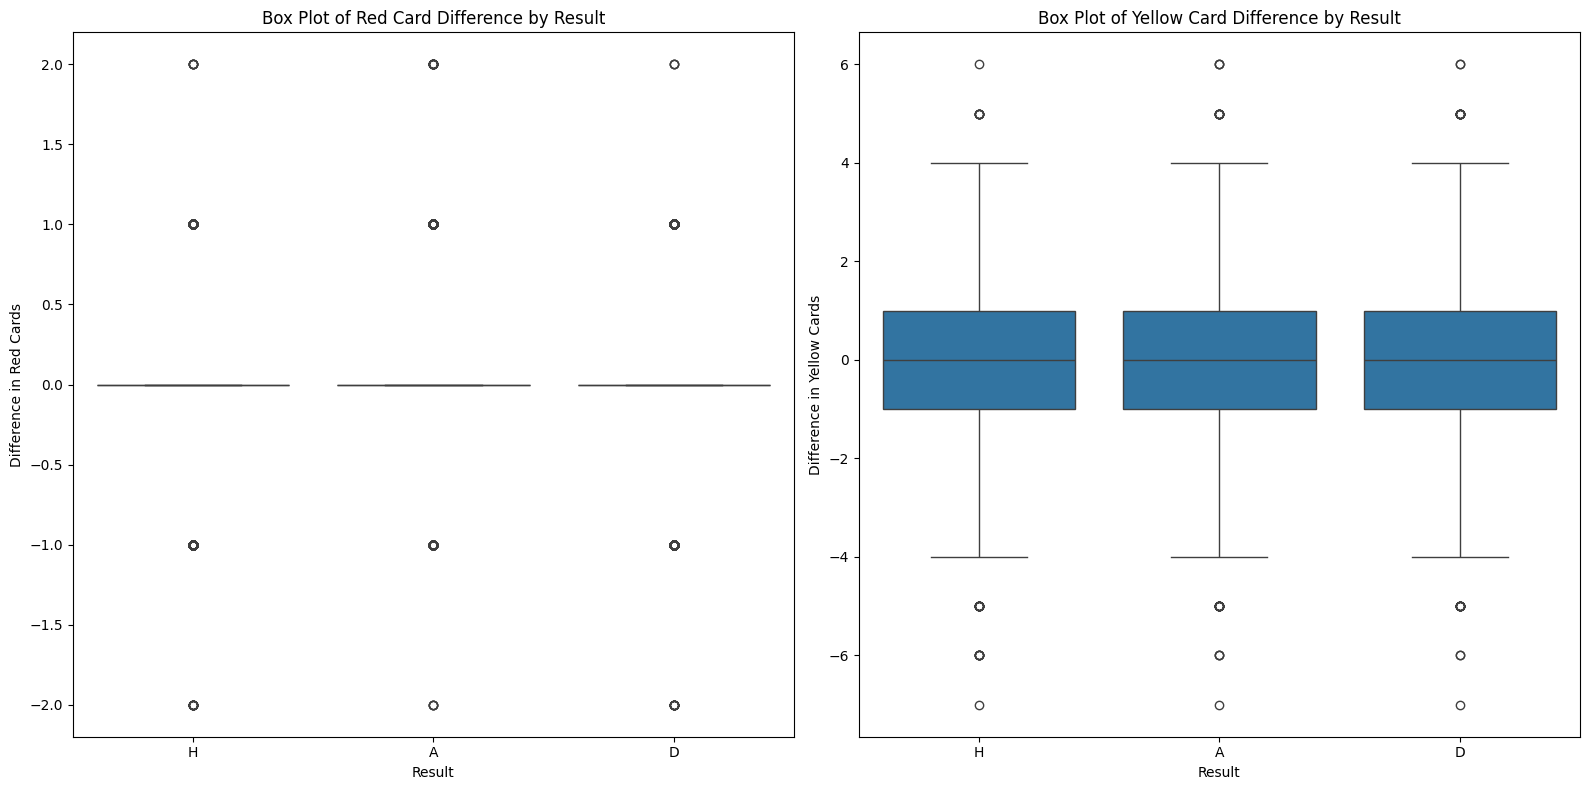

In [33]:
# Box Plots: Results vs Red Card Difference and Results vs Yellow Card Difference
plt.figure(figsize=(16, 8))

# Box Plot: Results vs Red Card Difference
plt.subplot(1, 2, 1)
sns.boxplot(x='result', y='diff_red_cards', data=learning_df)
plt.title('Box Plot of Red Card Difference by Result')
plt.xlabel('Result')
plt.ylabel('Difference in Red Cards')

# Box Plot: Results vs Yellow Card Difference
plt.subplot(1, 2, 2)
sns.boxplot(x='result', y='diff_yellow_cards', data=learning_df)
plt.title('Box Plot of Yellow Card Difference by Result')
plt.xlabel('Result')
plt.ylabel('Difference in Yellow Cards')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [34]:
# Prepare data for regression
X = learning_df['diff_yellow_cards'].values.reshape(-1, 1)
y = learning_df['diff_red_cards'].values

# Fit a linear regression model
model = LinearRegression().fit(X, y)

# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(learning_df['diff_yellow_cards'], learning_df['diff_red_cards'])[0, 1]

# Print the regression equation and correlation coefficient
print(f"Equation of the line of best fit: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {correlation_coefficient:.4f}")

Equation of the line of best fit: y = 0.0344x + -0.0057
Correlation coefficient (r): 0.1394


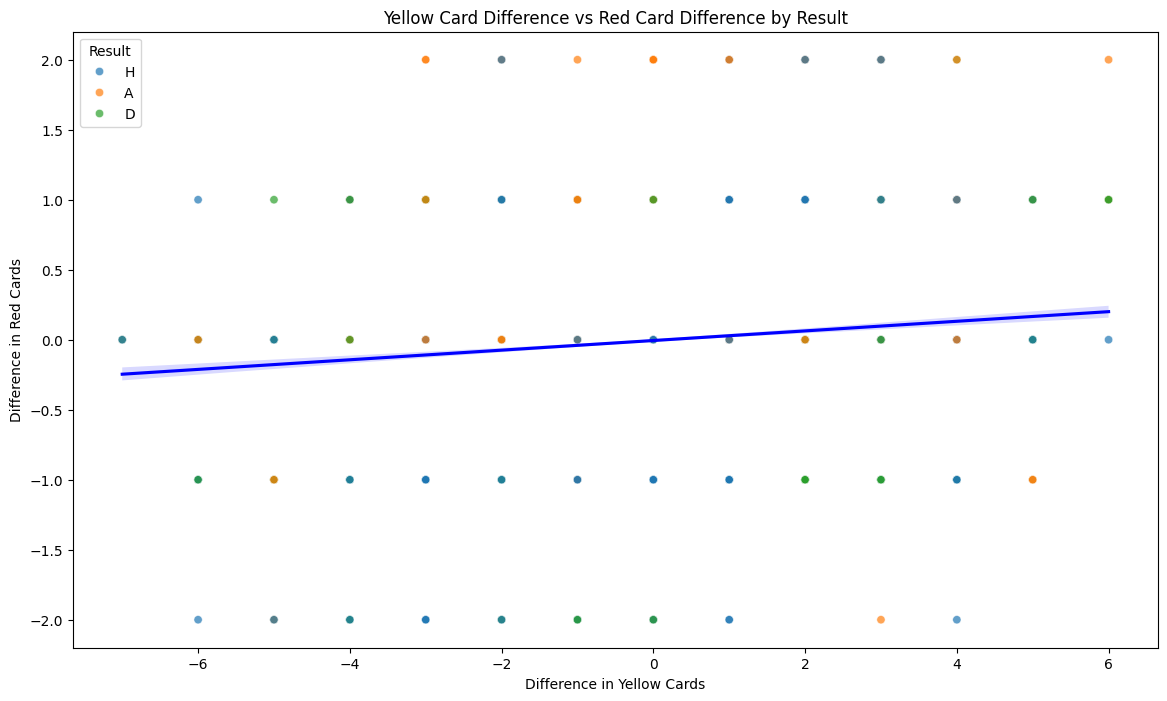

In [35]:
# Scatter Plot: Yellow Card Difference vs Red Card Difference with hue of result and line of best fit
plt.figure(figsize=(14, 8))
sns.scatterplot(x='diff_yellow_cards', y='diff_red_cards', hue='result', data=learning_df, alpha=0.7)
sns.regplot(x='diff_yellow_cards', y='diff_red_cards', data=learning_df, scatter=False, color='blue')
plt.title('Yellow Card Difference vs Red Card Difference by Result')
plt.xlabel('Difference in Yellow Cards')
plt.ylabel('Difference in Red Cards')
plt.legend(title='Result')
plt.show()

Possession vs Goal/XG

In [36]:
# Prepare data for regression (Possession vs Goals)
X_goals = learning_df['diff_poss'].values.reshape(-1, 1)
y_goals = learning_df['diff_goals'].values

# Fit a linear regression model (Possession vs Goals)
model_goals = LinearRegression().fit(X_goals, y_goals)

# Get the coefficient and intercept (Possession vs Goals)
slope_goals = model_goals.coef_[0]
intercept_goals = model_goals.intercept_

# Calculate the correlation coefficient (Possession vs Goals)
correlation_goals = np.corrcoef(learning_df['diff_poss'], learning_df['diff_goals'])[0, 1]

# Print the regression equation and correlation coefficient (Possession vs Goals)
print(f"Possession vs Goals: y = {slope_goals:.4f}x + {intercept_goals:.4f}")
print(f"Correlation coefficient (r) for Possession vs Goals: {correlation_goals:.4f}")

# Prepare data for regression (Possession vs Expected Goals)
X_xg = learning_df['diff_poss'].values.reshape(-1, 1)
y_xg = learning_df['diff_xg'].values

# Fit a linear regression model (Possession vs Expected Goals)
model_xg = LinearRegression().fit(X_xg, y_xg)

# Get the coefficient and intercept (Possession vs Expected Goals)
slope_xg = model_xg.coef_[0]
intercept_xg = model_xg.intercept_

# Calculate the correlation coefficient (Possession vs Expected Goals)
correlation_xg = np.corrcoef(learning_df['diff_poss'], learning_df['diff_xg'])[0, 1]

# Print the regression equation and correlation coefficient (Possession vs Expected Goals)
print(f"Possession vs Expected Goals: y = {slope_xg:.4f}x + {intercept_xg:.4f}")
print(f"Correlation coefficient (r) for Possession vs Expected Goals: {correlation_xg:.4f}")


Possession vs Goals: y = 0.0136x + 0.2421
Correlation coefficient (r) for Possession vs Goals: 0.1640
Possession vs Expected Goals: y = 0.0236x + 0.2189
Correlation coefficient (r) for Possession vs Expected Goals: 0.3831


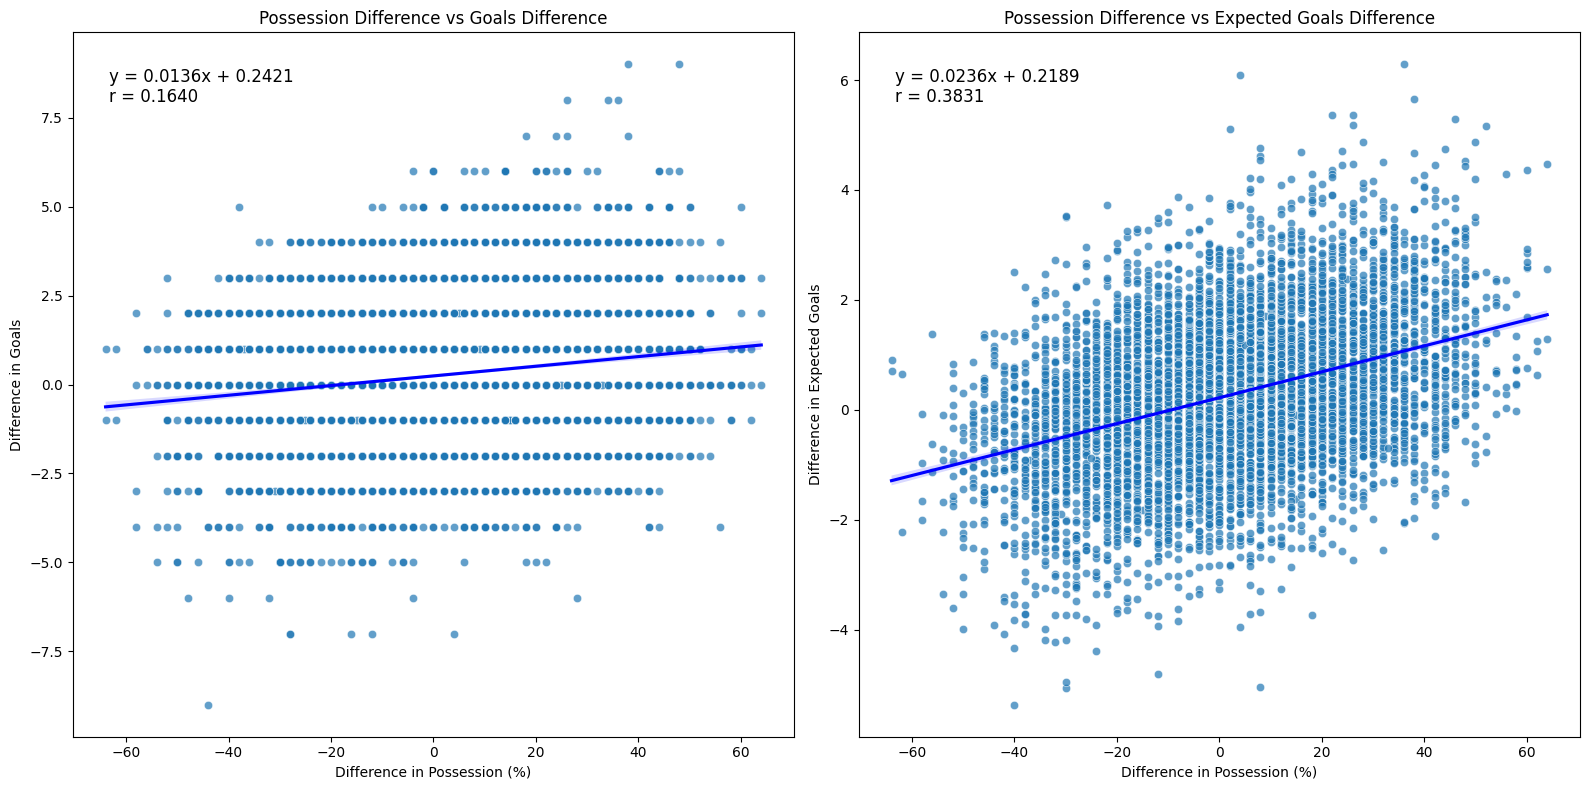

In [37]:
# Create a figure with two subplots side by side
plt.figure(figsize=(16, 8))

# Scatter Plot: Possession vs Goals with regression line
plt.subplot(1, 2, 1)
sns.scatterplot(x='diff_poss', y='diff_goals', data=learning_df, alpha=0.7)
sns.regplot(x='diff_poss', y='diff_goals', data=learning_df, scatter=False, color='blue')
plt.title('Possession Difference vs Goals Difference')
plt.xlabel('Difference in Possession (%)')
plt.ylabel('Difference in Goals')
plt.text(0.05, 0.95, f'y = {slope_goals:.4f}x + {intercept_goals:.4f}\nr = {correlation_goals:.4f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Scatter Plot: Possession vs Expected Goals with regression line
plt.subplot(1, 2, 2)
sns.scatterplot(x='diff_poss', y='diff_xg', data=learning_df, alpha=0.7)
sns.regplot(x='diff_poss', y='diff_xg', data=learning_df, scatter=False, color='blue')
plt.title('Possession Difference vs Expected Goals Difference')
plt.xlabel('Difference in Possession (%)')
plt.ylabel('Difference in Expected Goals')
plt.text(0.05, 0.95, f'y = {slope_xg:.4f}x + {intercept_xg:.4f}\nr = {correlation_xg:.4f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

PPDA vs Result

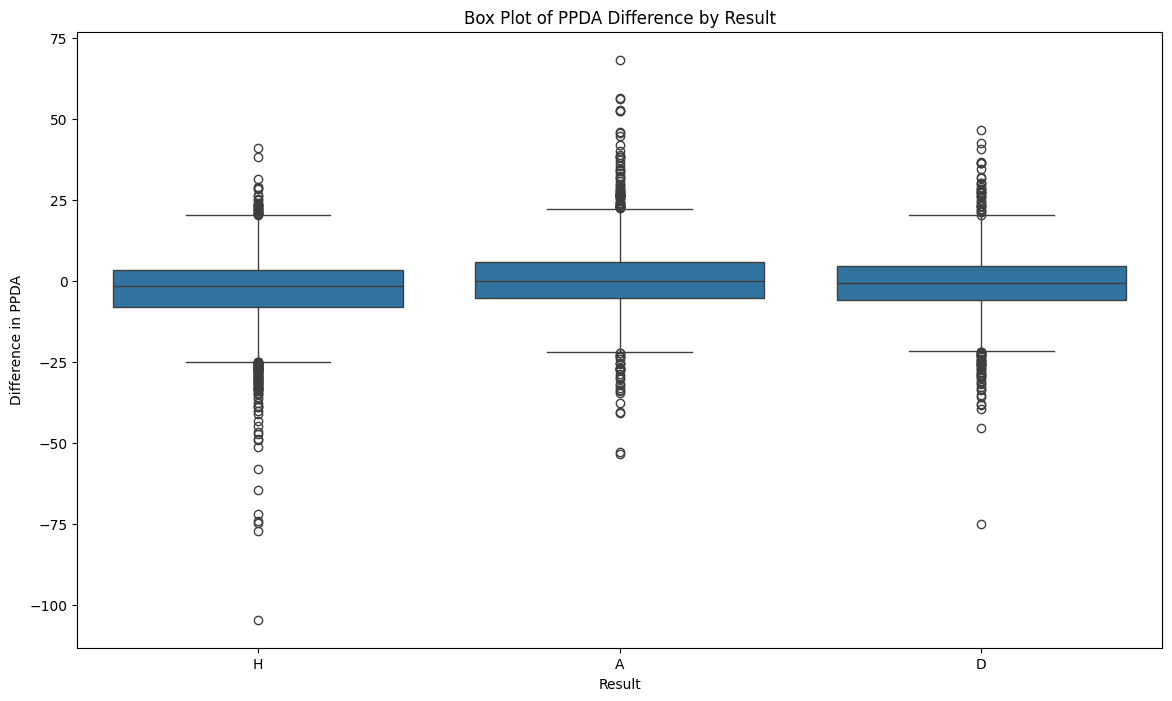

In [38]:
# Box Plot: PPDA vs Result
plt.figure(figsize=(14, 8))
sns.boxplot(x='result', y='diff_ppda', data=learning_df)
plt.title('Box Plot of PPDA Difference by Result')
plt.xlabel('Result')
plt.ylabel('Difference in PPDA')
plt.show()

Key Passes vs Result

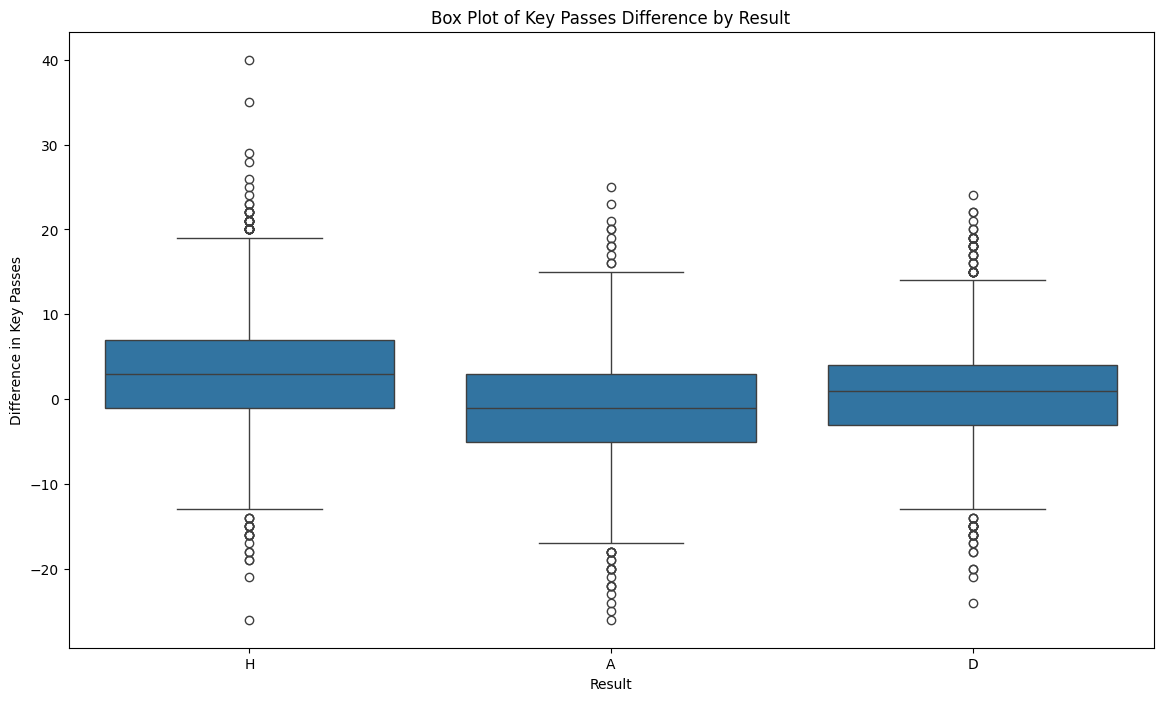

In [39]:
# Box Plot: PPDA vs Result
plt.figure(figsize=(14, 8))
sns.boxplot(x='result', y='diff_deep_completions', data=learning_df)
plt.title('Box Plot of Key Passes Difference by Result')
plt.xlabel('Result')
plt.ylabel('Difference in Key Passes')
plt.show()

# Match Data Modelling


## Supervised Learning on Match Result with Match Data

Ensemble of Machine Learning Models for Match Outcome Prediction
In this project, we aim to predict the outcome of football matches using an ensemble of machine learning models. An ensemble approach combines the strengths of multiple models to improve the overall predictive performance. The ensemble will consist of the following five models:


Logistic Regression:

A linear model used for classification, capable of handling multi-class problems through techniques such as One-vs-Rest (OvR) or Softmax regression. It estimates the probability of the different match outcomes based on one or more predictor variables using a logistic function.

Random Forest:

An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification. It is robust to overfitting and handles large datasets with high dimensionality well.


Gradient Boosting:

An ensemble technique that builds models sequentially, with each new model attempting to correct the errors made by the previous models. It combines the strengths of weak learners to form a strong learner.


Support Vector Machine (SVM):

A powerful classifier that works well with high-dimensional data. It finds the hyperplane that best separates the data into different classes by maximizing the margin between the closest points of the classes (support vectors).


Neural Network:

A deep learning model that consists of multiple layers of interconnected neurons. Neural networks are highly flexible and can model complex patterns in the data. For this project, we will use a feedforward neural network with multiple hidden layers.


Target Variable: Multi-Class Classification
We will structure the target variable as a multi-class classification problem to predict the outcome of football matches as either a home win, draw, or away win. This approach provides a comprehensive understanding of match outcomes, capturing all possible results.

Target Variable: result with three classes:
'H' for home win
'D' for draw
'A' for away win
By combining these diverse models, we can leverage their unique strengths and mitigate their individual weaknesses, leading to a more accurate and robust prediction system for football match outcomes.

Preprocessing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [41]:
learning_df

diff_poss  diff_touches  diff_take-ons  diff_carries  diff_receiving  \
0          14.0          93.0           -1.0          81.0           104.0   
1         -14.0        -159.0           -6.0        -176.0          -143.0   
2          -6.0         -49.0            4.0         -16.0           -51.0   
3          -2.0         -35.0            3.0          36.0           -20.0   
4         -28.0        -263.0           -2.0        -242.0          -256.0   
...         ...           ...            ...           ...             ...   
7198      -14.0        -168.0           -4.0        -163.0          -164.0   
7199      -32.0        -296.0           15.0        -296.0          -294.0   
7200        2.0           7.0            2.0          -4.0            -8.0   
7201        6.0          70.0            2.0          52.0            59.0   
7202        6.0          57.0            4.0          40.0            43.0   

      diff_points  diff_expected_points  diff_goals   diff_xg  diff_np_xg  \
0               3                1.9458           3  1.392153    1.392153   
1              -3               -2.3790          -5 -1.983470   -1.222340   
2               3               -0.3714           3 -0.178279   -0.178279   
3              -3               -0.4536          -3 -0.185494   -0.185494   
4               0               -0.5745           0 -0.353010   -0.353010   
...           ...                   ...         ...       ...         ...   
7198            3                0.9219           2  0.622240    0.622240   
7199            0               -2.1453           0 -1.454318   -1.454318   
7200           -3               -1.3734          -2 -1.165650   -1.165650   
7201            3               -0.7248           1 -0.361834   -0.361834   
7202           -3               -0.6060          -1 -0.348850   -0.348851   

      ...  diff_ppda  diff_deep_completions  diff_half_time_goals  diff_shots  \
0     ... -15.511688                      6                     4           3   
1     ...   9.464516                     -8                    -1          -9   
2     ...   3.777778                     -9                     0          -1   
3     ...  -1.714286                      2                    -1           6   
4     ...   7.233618                      0                     0          -4   
...   ...        ...                    ...                   ...         ...   
7198  ...  10.620588                    -10                     2           0   
7199  ...  40.849462                    -15                     0         -10   
7200  ...   1.347826                      1                    -1           2   
7201  ...  -1.180501                     -2                     2         -10   
7202  ...   2.791667                      4                    -1           2   

      diff_shots_on_target  diff_fouls  diff_corners  diff_yellow_cards  \
0                        2           0             9                 -2   
1                       -6          -7             0                  0   
2                        1          -6            -5                  0   
3                        0           4             3                 -1   
4                       -1           2             4                  1   
...                    ...         ...           ...                ...   
7198                    -1          -4             1                 -1   
7199                    -4          -6            -6                 -4   
7200                    -2          -6             0                 -2   
7201                    -4          -6             0                  0   
7202                     2          -4             0                 -2   

      diff_red_cards  result  
0                  0       H  
1                  0       A  
2                  0       H  
3                  0       A  
4                 -1       D  
...              ...     ...  
7198               0       H  
7199               0  

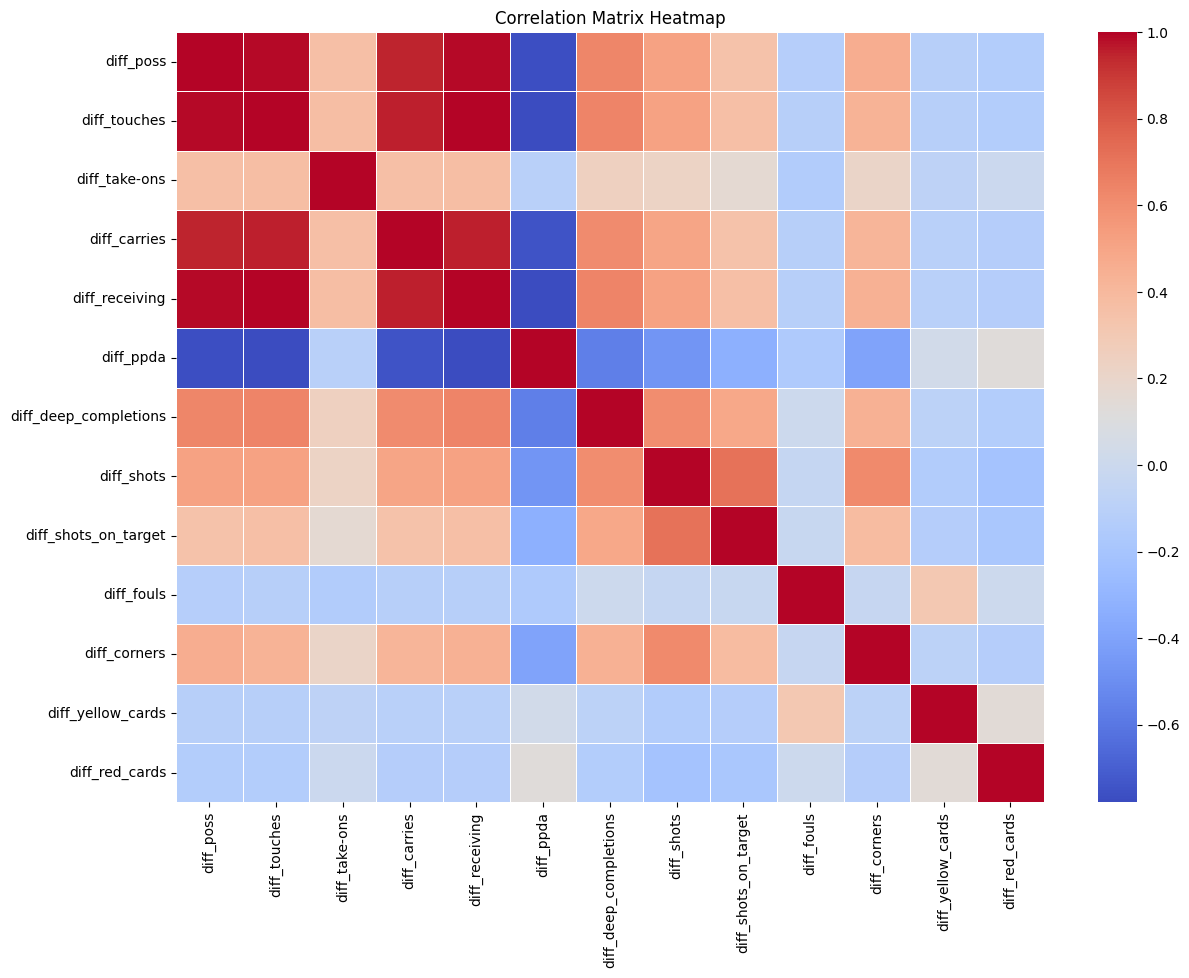

In [42]:
# Handling Missing Values (if any)
learning_df = learning_df.dropna()

columns_to_drop = [
    'diff_goals', 'diff_xg', 'diff_points', 'diff_expected_points', 'diff_half_time_goals',
    'diff_np_xg', 'diff_np_xg_difference'
]

learning_df = learning_df.drop(columns=columns_to_drop)

# Correlation matrix to identify highly correlated features
correlation_matrix = learning_df.drop("result", axis=1).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
# Identify highly correlated features
threshold = 0.9
correlated_features = set()
dropped_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            if colname not in correlated_features:
                correlated_features.add(correlation_matrix.columns[j])
                dropped_features.add(colname)

# Drop highly correlated features
learning_df.drop(columns=dropped_features, inplace=True)

# Print the columns that were dropped
print("Dropped Columns due to high correlation:")
print(dropped_features)


Dropped Columns due to high correlation:
{'diff_carries', 'diff_touches', 'diff_receiving'}


In [44]:
# Encode the result column
label_encoder = LabelEncoder()
learning_df['result_encoded'] = label_encoder.fit_transform(learning_df['result'])

In [45]:
learning_df

diff_poss  diff_take-ons  diff_ppda  diff_deep_completions  diff_shots  \
0          14.0           -1.0 -15.511688                      6           3   
1         -14.0           -6.0   9.464516                     -8          -9   
2          -6.0            4.0   3.777778                     -9          -1   
3          -2.0            3.0  -1.714286                      2           6   
4         -28.0           -2.0   7.233618                      0          -4   
...         ...            ...        ...                    ...         ...   
7198      -14.0           -4.0  10.620588                    -10           0   
7199      -32.0           15.0  40.849462                    -15         -10   
7200        2.0            2.0   1.347826                      1           2   
7201        6.0            2.0  -1.180501                     -2         -10   
7202        6.0            4.0   2.791667                      4           2   

      diff_shots_on_target  diff_fouls  diff_corners  diff_yellow_cards  \
0                        2           0             9                 -2   
1                       -6          -7             0                  0   
2                        1          -6            -5                  0   
3                        0           4             3                 -1   
4                       -1           2             4                  1   
...                    ...         ...           ...                ...   
7198                    -1          -4             1                 -1   
7199                    -4          -6            -6                 -4   
7200                    -2          -6             0                 -2   
7201                    -4          -6             0                  0   
7202                     2          -4             0                 -2   

      diff_red_cards result  result_encoded  
0                  0      H               2  
1                  0      A               0  
2                  0      H               2  
3                  0      A               0  
4                 -1      D               1  
...              ...    ...             ...  
7198               0      H               2  
7199               0      D               1  
7200               0      A               0  
7201               0      H               2  
7202               0      A               0  

[7203 rows x 12 columns]

In [46]:
# Define features and target
X = learning_df.drop(['result', 'result_encoded'], axis=1)
y = learning_df['result_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Check the processed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5762, 10)
X_test shape: (1441, 10)
y_train shape: (5762,)
y_test shape: (1441,)


## Models

In [81]:
nvcc --version

NameError: name 'nvcc' is not defined

In [49]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 490 (delta 149), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (490/490), 136.70 KiB | 781.00 KiB/s, done.
Resolving deltas: 100% (251/251), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.1 MB/s eta 0:00:00
Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 858.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 670.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.9/920.9 kB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [50]:
!pip install xgboost thundersvm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.4/507.4 kB 7.2 MB/s eta 0:00:00


In [70]:
import cudf
import cuml
from cuml.linear_model import LogisticRegression as cuMLLogisticRegression
from sklearn.model_selection import GridSearchCV

# Convert numpy arrays to pandas DataFrame and Series
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)
y_train_pd = pd.Series(y_train)
y_test_pd = pd.Series(y_test)

# Convert data to cuDF (RAPIDS DataFrame)
# Convert pandas DataFrame and Series to cuDF DataFrame and Series
X_train_cudf = cudf.DataFrame.from_pandas(X_train_pd)
X_test_cudf = cudf.DataFrame.from_pandas(X_test_pd)
y_train_cudf = cudf.Series(y_train_pd)

In [71]:
import tensorflow as tf


In [72]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Verify that TensorFlow is utilizing the GPU
print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.test.is_gpu_available())

# Check GPU details (Optional)
if tf.test.is_gpu_available():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        print(f"Device: {gpu}")

Num GPUs Available:  1
TensorFlow version: 2.15.0
Is GPU available: True
Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [73]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [74]:
class cuMLWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        X_cudf = cudf.DataFrame.from_pandas(X)
        y_cudf = cudf.Series(y)
        self.model.fit(X_cudf, y_cudf)
        return self

    def predict(self, X):
        X_cudf = cudf.DataFrame.from_pandas(X)
        return self.model.predict(X_cudf).to_pandas()

    def predict_proba(self, X):
        X_cudf = cudf.DataFrame.from_pandas(X)
        return self.model.predict_proba(X_cudf).to_pandas()

    def get_params(self, deep=True):
        return {"model": self.model}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras

In [76]:
# Logistic Regression with cuML
log_reg = cuMLWrapper(cuMLLogisticRegression())
param_grid_log_reg = {'model__C': [0.1, 1, 10]}
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train_pd, y_train_pd)
log_reg_best = grid_search_log_reg.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_log_reg.best_params_}")

Best parameters for Logistic Regression: {'model__C': 0.1}


In [77]:
from cuml.ensemble import RandomForestClassifier as cuMLRandomForestClassifier

# Random Forest with cuML
random_forest = cuMLWrapper(cuMLRandomForestClassifier(random_state=42))
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 20, 30]}
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_pd, y_train_pd)
random_forest_best = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results 

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}


In [78]:
import xgboost as xgb

# Gradient Boosting with XGBoost
gradient_boosting = xgb.XGBClassifier(tree_method='gpu_hist', random_state=42)
param_grid_gb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
gradient_boosting_best = grid_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:16:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:16:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:16:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:16:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:16:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [80]:
from thundersvm import SVC as ThunderSVMSVC

# Support Vector Machine with ThunderSVM
svm = ThunderSVMSVC(probability=True, random_state=42)
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
svm_best = grid_search_svm.best_estimator_
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")

OSError: libcusparse.so.9.0: cannot open shared object file: No such file or directory

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # 3 classes for multi-class classification
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_network = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=2)

param_grid_nn = {
    'optimizer': ['adam'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

grid_search_nn = GridSearchCV(estimator=neural_network, param_grid=param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)

neural_network_best = grid_search_nn.best_estimator_
print(f"Best parameters for Neural Network: {grid_search_nn.best_params_}")

In [ ]:
# Create the ensemble model using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg_best),
        ('random_forest', random_forest_best),
        ('gradient_boosting', gradient_boosting_best),
        ('svm', svm_best),
        ('neural_network', neural_network_best)
    ],
    voting='soft'  # 'soft' uses predicted probabilities for majority rule
)

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

In [ ]:
# Predict with the ensemble model
y_pred_ensemble = voting_clf.predict(X_test_scaled)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_classification_report = classification_report(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")
print("Classification Report for Ensemble Model:")
print(ensemble_classification_report)

In [ ]:
# Evaluate each model individually
models = {
    'Logistic Regression': log_reg_best,
    'Random Forest': random_forest_best,
    'Gradient Boosting': gradient_boosting_best,
    'SVM': svm_best,
    'Neural Network': neural_network_best,
    'Voting Classifier': voting_clf
}

# Evaluate each model
for name, model in models.items():
    if isinstance(model, cuMLWrapper):  # For cuML models
        y_pred = model.predict(X_test_cudf)
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')

# Supervised Learning for Match Result with Pre-Match Data


## Data Setup and Engineering

In [4]:
# Normalize column names
df.columns = [col.lower() for col in df.columns]

# Desired Features
# Home Form, Away Form for each side. General form.
# 'recent_form_home', 'recent_form_away',
#     'home_goals_last_5', 'away_goals_last_5',
#     'home_conceded_last_5', 'away_conceded_last_5',
#     'home_poss_avg', 'away_poss_avg',
#     'home_shots_avg', 'away_shots_avg',
#     'home_shots_on_target_avg', 'away_shots_on_target_avg'
# 'max_home_win', 'max_draw', 'max_away_win',
#     'avg_home_win', 'avg_draw', 'avg_away_win',
# 'max_asian_handicap_home', 'max_asian_handicap_away',
#     'avg_asian_handicap_home', 'avg_asian_handicap_away'

# Columns to include in pre_match_df
columns_to_include = [
    'result', 'season', 'league', 'matchweek', 'time', 'home_team', 'away_team',
    'home_xg', 'away_xg', 'home_ppda', 'away_ppda',
    'home_poss', 'away_poss', 'home_expected_points', 'away_expected_points',
    'home_shots', 'away_shots', 'home_shots_on_target', 'away_shots_on_target',
    'home_red_cards', 'away_red_cards', 'home_take-ons', 'away_take-ons',
    'home_deep_completions', 'away_deep_completions', 'home_points', 'away_points',
    'max_home_win', 'max_draw', 'max_away_win',
    'avg_home_win', 'avg_draw', 'avg_away_win',
    'avg_closing_home_win', 'avg_closing_draw', 'avg_closing_away_win',
    'avg_closing_asian_handicap_home', 'avg_closing_asian_handicap_away',
    'avg_asian_handicap_home', 'avg_asian_handicap_away'
]

# Initialize pre_match_df with the specified columns
pre_match_df = df[columns_to_include].copy()

Rolling Data Averages

In [5]:
# Calculate the differences and ensure away difference is the negative of home difference
home_stats = df[['season', 'league', 'matchweek', 'time', 'home_team', 'away_team',
                 'home_poss', 'away_poss', 'home_ppda', 'away_ppda',
                 'home_xg', 'away_xg', 'home_goals', 'away_goals',
                 'home_expected_points', 'away_expected_points',
                 'home_shots', 'away_shots', 'home_shots_on_target', 'away_shots_on_target',
                 'home_points', 'away_points', 'home_take-ons', 'away_take-ons',
                 'home_deep_completions', 'away_deep_completions']].copy()

# Calculate the differences
home_stats['possession_diff'] = home_stats['home_poss'] - home_stats['away_poss']
home_stats['ppda_diff'] = home_stats['home_ppda'] - home_stats['away_ppda']
home_stats['xg_diff'] = home_stats['home_xg'] - home_stats['away_xg']
home_stats['goals_diff'] = home_stats['home_goals'] - home_stats['away_goals']
home_stats['expected_points_diff'] = home_stats['home_expected_points'] - home_stats['away_expected_points']
home_stats['shots_diff'] = home_stats['home_shots'] - home_stats['away_shots']
home_stats['shots_on_target_diff'] = home_stats['home_shots_on_target'] - home_stats['away_shots_on_target']
home_stats['points_diff'] = home_stats['home_points'] - home_stats['away_points']
home_stats['take_ons_diff'] = home_stats['home_take-ons'] - home_stats['away_take-ons']
home_stats['deep_completions_diff'] = home_stats['home_deep_completions'] - home_stats['away_deep_completions']

In [6]:
# Create separate dataframes for home and away
home_diff_stats = home_stats[['season', 'league', 'matchweek', 'time', 'home_team',
                              'possession_diff', 'ppda_diff', 'xg_diff', 'goals_diff',
                              'expected_points_diff', 'shots_diff', 'shots_on_target_diff',
                              'points_diff', 'take_ons_diff', 'deep_completions_diff']].copy()
home_diff_stats.columns = ['season', 'league', 'matchweek', 'time', 'team',
                           'possession_diff', 'ppda_diff', 'xg_diff', 'goals_diff',
                           'expected_points_diff', 'shots_diff', 'shots_on_target_diff',
                           'points_diff', 'take_ons_diff', 'deep_completions_diff']
home_diff_stats['home_away'] = 'home'

away_diff_stats = home_stats[['season', 'league', 'matchweek', 'time', 'away_team',
                              'possession_diff', 'ppda_diff', 'xg_diff', 'goals_diff',
                              'expected_points_diff', 'shots_diff', 'shots_on_target_diff',
                              'points_diff', 'take_ons_diff', 'deep_completions_diff']].copy()
away_diff_stats.columns = ['season', 'league', 'matchweek', 'time', 'team',
                           'possession_diff', 'ppda_diff', 'xg_diff', 'goals_diff',
                           'expected_points_diff', 'shots_diff', 'shots_on_target_diff',
                           'points_diff', 'take_ons_diff', 'deep_completions_diff']
away_diff_stats['home_away'] = 'away'

# Adjust differences for away stats to be the negative of home stats
away_diff_stats[['possession_diff', 'ppda_diff', 'xg_diff', 'goals_diff',
                 'expected_points_diff', 'shots_diff', 'shots_on_target_diff',
                 'points_diff', 'take_ons_diff', 'deep_completions_diff']] *= -1

In [7]:
# Combine home and away difference stats
all_diff_stats = pd.concat([home_diff_stats, away_diff_stats])
all_diff_stats.sort_values(by=['team', 'season', 'matchweek', 'time'], inplace=True)

# Calculate rolling averages for the last 5 games for each team
rolling_stats = all_diff_stats.drop(['home_away', 'season', 'league', 'time'], axis=1).groupby('team').rolling(window=5, on='matchweek', min_periods=1).mean().shift(1).reset_index(drop=True)
# Fill NaN values created by shift with 0
rolling_stats = rolling_stats.fillna(0)
# Add rolling averages to the original structured data
all_diff_stats = pd.concat([all_diff_stats.reset_index(drop=True), rolling_stats.add_prefix('rolling_5_')], axis=1)

# Merge the rolling averages back to the original home/away stats
home_diff_stats = all_diff_stats[all_diff_stats['home_away'] == 'home'].drop(columns=['home_away', 'rolling_5_matchweek'])
away_diff_stats = all_diff_stats[all_diff_stats['home_away'] == 'away'].drop(columns=['home_away', 'rolling_5_matchweek'])

# Rename columns back to match original dataframe structure
home_diff_stats.columns = [
    'season', 'league', 'matchweek', 'time', 'home_team',
    'possession_diff', 'ppda_diff', 'xg_diff', 'goals_diff', 'expected_points_diff',
    'shots_diff', 'shots_on_target_diff', 'points_diff', 'take_ons_diff',
    'deep_completions_diff',
    'rolling_5_home_deep_completions_diff', 'rolling_5_home_expected_points_diff',
    'rolling_5_home_goals_diff', 'rolling_5_home_points_diff', 'rolling_5_home_possession_diff',
    'rolling_5_home_ppda_diff', 'rolling_5_home_shots_diff', 'rolling_5_home_shots_on_target_diff',
    'rolling_5_home_take_ons_diff', 'rolling_5_home_xg_diff'
]

away_diff_stats.columns = [
    'season', 'league', 'matchweek', 'time', 'away_team',
    'possession_diff', 'ppda_diff', 'xg_diff', 'goals_diff', 'expected_points_diff',
    'shots_diff', 'shots_on_target_diff', 'points_diff', 'take_ons_diff',
    'deep_completions_diff',
    'rolling_5_away_deep_completions_diff', 'rolling_5_away_expected_points_diff',
    'rolling_5_away_goals_diff', 'rolling_5_away_points_diff', 'rolling_5_away_possession_diff',
    'rolling_5_away_ppda_diff', 'rolling_5_away_shots_diff', 'rolling_5_away_shots_on_target_diff',
    'rolling_5_away_take_ons_diff', 'rolling_5_away_xg_diff'
]


# Merge back to original dataframe
pre_match_df = pre_match_df.merge(home_diff_stats, on=['season', 'league', 'matchweek', 'time', 'home_team'], how='left')
pre_match_df = pre_match_df.merge(away_diff_stats, on=['season', 'league', 'matchweek', 'time', 'away_team'], how='left')

# Check the result
print(pre_match_df.head())

  result     season          league  matchweek      time       home_team  \
0      H  2019/2020  Premier-League          1  20:00:00       Liverpool   
1      A  2019/2020  Premier-League          1  12:30:00        West Ham   
2      H  2019/2020  Premier-League          1  15:00:00         Burnley   
3      A  2019/2020  Premier-League          1  15:00:00         Watford   
4      D  2019/2020  Premier-League          1  15:00:00  Crystal Palace   

         away_team   home_xg   away_xg  home_ppda  ...  \
0     Norwich City  2.234560  0.842407   5.942857  ...   
1  Manchester City  1.200300  3.183770  16.400000  ...   
2      Southampton  0.909241  1.087520   9.277778  ...   
3         Brighton  0.670022  0.855516   9.785714  ...   
4          Everton  0.871590  1.224600  11.307692  ...   

   rolling_5_away_deep_completions_diff  rolling_5_away_expected_points_diff  \
0                                  -1.8                              0.84708   
1                                 

In [8]:
rolling_stats

matchweek  deep_completions_diff  expected_points_diff  goals_diff  \
0            0.0                   0.00               0.00000    0.000000   
1            1.0                  -2.00              -1.28190   -1.000000   
2            2.0                  -7.50              -0.91905   -0.500000   
3            3.0                  -7.00              -0.29650   -0.666667   
4            4.0                  -6.25              -0.75315   -1.000000   
...          ...                    ...                   ...         ...   
14401       33.0                  -2.80              -0.81528    0.800000   
14402       34.0                  -4.60              -1.10490   -0.400000   
14403       35.0                  -3.40              -1.25316   -0.400000   
14404       36.0                  -5.00              -1.61040   -1.200000   
14405       37.0                  -5.60              -1.42314   -1.000000   

       points_diff  possession_diff  ppda_diff  shots_diff  \
0             0.00              0.0   0.000000         0.0   
1            -3.00            -34.0   3.151210        -3.0   
2            -1.50            -31.0   6.897033        -3.0   
3            -2.00            -24.0   6.131822        -4.0   
4            -2.25            -22.0   6.030939        -1.5   
...            ...              ...        ...         ...   
14401         1.20              3.2  -3.365193        -3.2   
14402         0.60             -8.0   0.426822        -3.8   
14403         0.60             -8.0   0.697830        -5.0   
14404        -0.60             -7.2   1.472177        -9.6   
14405         0.00             -9.6   2.839050       -11.0   

       shots_on_target_diff  take_ons_diff   xg_diff  
0                  0.000000           0.00  0.000000  
1                 -2.000000          -8.00 -0.718230  
2                 -1.500000          -3.00 -0.519227  
3                 -2.333333          -3.00 -0.191850  
4                 -2.250000          -4.25 -0.466994  
...                     ...            ...       ...  
14401             -0.600000          -1.20 -0.608808  
14402             -0.600000           0.20 -1.062819  
14403             -1.400000           1.00 -1.159094  
14404             -4.400000           2.40 -1.610736  
14405             -3.200000           2.00 -1.432130  

[14406 rows x 11 columns]

Issue: At the start of the season, there is no prior data to calculate rolling averages.

Solution: The rolling function with min_periods=1 ensures that the rolling average is computed even if there are fewer than 5 previous games. This means that early in the season, the average is calculated using all available games.

Home/Away Form

In [9]:
# Separate the home and away games
home_form = df[['season', 'league', 'matchweek', 'time', 'home_team', 'home_expected_points']].copy()
home_form.columns = ['season', 'league', 'matchweek', 'time', 'team', 'expected_points']
home_form['home_away'] = 'home'

away_form = df[['season', 'league', 'matchweek', 'time', 'away_team', 'away_expected_points']].copy()
away_form.columns = ['season', 'league', 'matchweek', 'time', 'team', 'expected_points']
away_form['home_away'] = 'away'

all_form = pd.concat([home_form, away_form])
all_form.sort_values(by=['team', 'season', 'matchweek', 'time'], inplace=True)


In [10]:
# Separate the home and away games and calculate the cumulative average form for the current season
home_form = all_form[all_form['home_away'] == 'home'].copy()
away_form = all_form[all_form['home_away'] == 'away'].copy()

# Sort the data by season, team, and matchweek
home_form.sort_values(by=['season', 'team', 'matchweek'], inplace=True)
away_form.sort_values(by=['season', 'team', 'matchweek'], inplace=True)

# Calculate cumulative sum and count for home games in the current season
home_form['cumulative_sum'] = home_form.groupby(['season', 'team'])['expected_points'].cumsum().shift(1, fill_value=0)
home_form['cumulative_count'] = home_form.groupby(['season', 'team']).cumcount() + 1  # +1 to avoid division by zero

# Calculate cumulative average expected points for home games
home_form['cumulative_home_form'] = home_form['cumulative_sum'] / home_form['cumulative_count']
home_form.loc[home_form['cumulative_count'] == 0, 'cumulative_home_form'] = 0  # Set the form to 0 for the first game

# Calculate cumulative sum and count for away games in the current season
away_form['cumulative_sum'] = away_form.groupby(['season', 'team'])['expected_points'].cumsum().shift(1, fill_value=0)
away_form['cumulative_count'] = away_form.groupby(['season', 'team']).cumcount() + 1  # +1 to avoid division by zero

# Calculate cumulative average expected points for away games
away_form['cumulative_away_form'] = away_form['cumulative_sum'] / away_form['cumulative_count']
away_form.loc[away_form['cumulative_count'] == 0, 'cumulative_away_form'] = 0  # Set the form to 0 for the first game

# Reset index for merging
home_form.reset_index(inplace=True)
away_form.reset_index(inplace=True)

# Merge back to the original all_form dataframe
all_form.reset_index(inplace=True)

# Merge the home form
all_form = all_form.merge(home_form[['index', 'cumulative_home_form']], left_on='index', right_on='index', how='left')
# Merge the away form
all_form = all_form.merge(away_form[['index', 'cumulative_away_form']], left_on='index', right_on='index', how='left')

# Fill NaNs with 0 where no form data is available
all_form['cumulative_home_form'] = all_form['cumulative_home_form'].fillna(0)
all_form['cumulative_away_form'] = all_form['cumulative_away_form'].fillna(0)

# Drop unnecessary columns
all_form.drop(columns=['index'], inplace=True)

# Check the result
print(all_form[['team', 'matchweek', 'cumulative_home_form', 'cumulative_away_form']].head())


      team  matchweek  cumulative_home_form  cumulative_away_form
0  Ajaccio          1              24.22800              20.63800
1  Ajaccio          2              19.89710              22.43700
2  Ajaccio          3               0.95735               0.35820
3  Ajaccio          4               0.52645               0.83135
4  Ajaccio          5               0.60230               0.85090


In [11]:
all_form.loc[0:38]

season   league  matchweek      time     team  expected_points  \
0   2022/2023  Ligue-1          1  21:00:00  Ajaccio           0.7164   
1   2022/2023  Ligue-1          2  15:00:00  Ajaccio           1.0529   
2   2022/2023  Ligue-1          3  17:05:00  Ajaccio           1.8363   
3   2022/2023  Ligue-1          4  21:00:00  Ajaccio           0.3527   
4   2022/2023  Ligue-1          5  19:00:00  Ajaccio           0.5897   
5   2022/2023  Ligue-1          6  15:00:00  Ajaccio           1.2532   
6   2022/2023  Ligue-1          7  15:00:00  Ajaccio           0.7573   
7   2022/2023  Ligue-1          8  15:00:00  Ajaccio           1.0380   
8   2022/2023  Ligue-1          9  15:00:00  Ajaccio           1.2993   
9   2022/2023  Ligue-1         10  17:00:00  Ajaccio           0.1661   
10  2022/2023  Ligue-1         11  15:00:00  Ajaccio           2.5292   
11  2022/2023  Ligue-1         12  21:00:00  Ajaccio           0.0517   
12  2022/2023  Ligue-1         13  13:00:00  Ajaccio           0.9296   
13  2022/2023  Ligue-1         14  17:00:00  Ajaccio           2.9120   
14  2022/2023  Ligue-1         15  15:00:00  Ajaccio           2.4233   
15  2022/2023  Ligue-1         16  15:00:00  Ajaccio           1.0116   
16  2022/2023  Ligue-1         17  15:00:00  Ajaccio           0.2482   
17  2022/2023  Ligue-1         18  19:00:00  Ajaccio           0.8997   
18  2022/2023  Ligue-1         19  17:05:00  Ajaccio           0.0051   
19  2022/2023  Ligue-1         20  17:05:00  Ajaccio           0.8774   
20  2022/2023  Ligue-1         21  19:00:00  Ajaccio           2.1039   
21  2022/2023  Ligue-1         22  15:00:00  Ajaccio           0.2331   
22  2022/2023  Ligue-1         23  21:00:00  Ajaccio           0.9157   
23  2022/2023  Ligue-1         24  15:00:00  Ajaccio           0.2254   
24  2022/2023  Ligue-1         25  15:00:00  Ajaccio           2.7699   
25  2022/2023  Ligue-1         26  15:00:00  Ajaccio           1.1928   
26  2022/2023  Ligue-1         27  15:00:00  Ajaccio           0.2925   
27  2022/2023  Ligue-1         28  13:00:00  Ajaccio           0.3493   
28  2022/2023  Ligue-1         29  15:00:00  Ajaccio           0.1602   
29  2022/2023  Ligue-1         30  15:00:00  Ajaccio           1.4211   
30  2022/2023  Ligue-1         31  15:00:00  Ajaccio           0.4195   
31  2022/2023  Ligue-1         32  15:00:00  Ajaccio           0.9191   
32  2022/2023  Ligue-1         33  17:00:00  Ajaccio           0.3496   
33  2022/2023  Ligue-1         34  15:00:00  Ajaccio           0.0849   
34  2022/2023  Ligue-1         35  21:00:00  Ajaccio           0.1771   
35  2022/2023  Ligue-1         36  13:00:00  Ajaccio           0.0925   
36  2022/2023  Ligue-1         37  21:00:00  Ajaccio           0.0957   
37  2022/2023  Ligue-1         38  21:00:00  Ajaccio           0.3636   
38  2019/2020  La-Liga          1  17:00:00   Alavés           1.1599   

   home_away  cumulative_home_form  cumulative_away_form  
0       away             24.228000             20.638000  
1       home             19.897100             22.437000  
2       away              0.957350              0.358200  
3       home              0.526450              0.831350  
4       away              0.602300              0.850900  
5       home              0.468533              0.743050  
6       home              0.664700              1.160575  
7       away              0.483125              0.785600  
8       home              0.683220              0.191380  
9       away              1.757500              0.836080  
10      away              0.891300              0.724417  
11      home              0.785900              2.018371  
12      away              0.704314              0.982243  
13      home              0.681014              1.403700  
14      away              1.427286              0.975662  
15      home              0.959888              0.888437  
16      away              1.283067              1.136511  
17      home            

In [12]:
# Rename columns in all_form to differentiate home and away forms before merging
all_form_home = all_form[['season', 'matchweek', 'team', 'cumulative_home_form']].rename(columns={'team': 'home_team', 'cumulative_home_form': 'home_form'})
all_form_away = all_form[['season', 'matchweek', 'team', 'cumulative_away_form']].rename(columns={'team': 'away_team', 'cumulative_away_form': 'away_form'})

# Merge the cumulative home form into pre_match_df
pre_match_df = pre_match_df.merge(all_form_home, on=['season', 'matchweek', 'home_team'], how='left')

# Merge the cumulative away form into pre_match_df
pre_match_df = pre_match_df.merge(all_form_away, on=['season', 'matchweek', 'away_team'], how='left')

# Check the result
print(pre_match_df[['home_team', 'away_team', 'matchweek', 'home_form', 'away_form']].head())


        home_team        away_team  matchweek  home_form  away_form
0       Liverpool     Norwich City          1    30.9768    12.9416
1        West Ham  Manchester City          1    20.3337    10.5531
2         Burnley      Southampton          1    25.7346    17.9321
3         Watford         Brighton          1    32.3557     9.1683
4  Crystal Palace          Everton          1    44.9459    21.2371


Head to Head

In [13]:
# Initialize columns for head-to-head records
pre_match_df['home_h2h_exp_points_diff'] = 0
pre_match_df['away_h2h_exp_points_diff'] = 0

# Iterate through each match to calculate head-to-head expected points differences
for i, row in pre_match_df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']

    # Filter past matches between the two teams
    past_matches = df[((df['home_team'] == home_team) & (df['away_team'] == away_team)) |
                      ((df['home_team'] == away_team) & (df['away_team'] == home_team))]

    # Calculate total expected points for home and away teams in past matches
    if not past_matches.empty:
        home_total_exp_points = (past_matches.loc[past_matches['home_team'] == home_team, 'home_expected_points'].sum() +
                                 past_matches.loc[past_matches['away_team'] == home_team, 'away_expected_points'].sum())
        away_total_exp_points = (past_matches.loc[past_matches['home_team'] == away_team, 'home_expected_points'].sum() +
                                 past_matches.loc[past_matches['away_team'] == away_team, 'away_expected_points'].sum())

        num_matches = len(past_matches)

        # Calculate the difference for home and away teams
        home_h2h_diff = (home_total_exp_points - away_total_exp_points) / num_matches
        away_h2h_diff = (away_total_exp_points - home_total_exp_points) / num_matches

        # Update the dataframe
        pre_match_df.at[i, 'home_h2h_exp_points_diff'] = home_h2h_diff
        pre_match_df.at[i, 'away_h2h_exp_points_diff'] = away_h2h_diff



In [14]:
print(pre_match_df[['home_team', 'away_team', 'home_h2h_exp_points_diff', 'away_h2h_exp_points_diff']].head())


        home_team        away_team  home_h2h_exp_points_diff  \
0       Liverpool     Norwich City                  1.917525   
1        West Ham  Manchester City                 -1.780800   
2         Burnley      Southampton                 -0.360300   
3         Watford         Brighton                 -1.442775   
4  Crystal Palace          Everton                 -0.912900   

   away_h2h_exp_points_diff  
0                 -1.917525  
1                  1.780800  
2                  0.360300  
3                  1.442775  
4                  0.912900  


Previous season too difficult because new teams and first season has no data

In [15]:
pre_match_df

result     season          league  matchweek      time       home_team  \
0         H  2019/2020  Premier-League          1  20:00:00       Liverpool   
1         A  2019/2020  Premier-League          1  12:30:00        West Ham   
2         H  2019/2020  Premier-League          1  15:00:00         Burnley   
3         A  2019/2020  Premier-League          1  15:00:00         Watford   
4         D  2019/2020  Premier-League          1  15:00:00  Crystal Palace   
...     ...        ...             ...        ...       ...             ...   
7198      H  2022/2023         Ligue-1         38  21:00:00            Nice   
7199      D  2022/2023         Ligue-1         38  21:00:00          Troyes   
7200      A  2022/2023         Ligue-1         38  21:00:00         Auxerre   
7201      H  2022/2023         Ligue-1         38  21:00:00         Lorient   
7202      A  2022/2023         Ligue-1         38  21:00:00           Brest   

            away_team   home_xg   away_xg  home_ppda  ...  \
0        Norwich City  2.234560  0.842407   5.942857  ...   
1     Manchester City  1.200300  3.183770  16.400000  ...   
2         Southampton  0.909241  1.087520   9.277778  ...   
3            Brighton  0.670022  0.855516   9.785714  ...   
4             Everton  0.871590  1.224600  11.307692  ...   
...               ...       ...       ...        ...  ...   
7198             Lyon  2.305380  1.683140  18.150000  ...   
7199            Lille  0.241842  1.696160  46.333333  ...   
7200             Lens  2.034160  3.199810  12.652174  ...   
7201       Strasbourg  0.489883  0.851717  11.304348  ...   
7202           Rennes  1.226030  1.574880  14.125000  ...   

      rolling_5_away_possession_diff  rolling_5_away_ppda_diff  \
0                                1.6                  3.148152   
1                              -20.4                  6.246828   
2                              -14.4                  3.839757   
3                               -7.6                  0.217912   
4                              -10.8                  3.223437   
...                              ...                       ...   
7198                            17.6                 -7.845514   
7199                            23.2                 -3.839754   
7200                             7.2                 -4.092857   
7201                            -8.8                  4.580685   
7202                            19.2                 -8.562949   

      rolling_5_away_shots_diff  rolling_5_away_shots_on_target_diff  \
0                           3.4                                  2.0   
1                          -9.2                                 -1.4   
2                          -7.0                                 -5.0   
3                           4.6                                  2.2   
4                          -0.8                                  0.4   
...                         ...                                  ...   
7198                        4.0                                  1.2   
7199                        1.6                                  0.4   
7200                       -0.8                                  1.8   
7201                        5.0                                  1.4   
7202                        7.2                                  3.2   

      rolling_5_away_take_ons_diff  rolling_5_away_xg_diff  home_form  \
0                              5.0                0.875958  30.976800   
1                             -2.4               -0.992728  20.333700   
2                             -8.0               -0.868412  25.734600   
3                             -0.4                0.417469  32.355700   
4                             -2.8               -0.692399  44.945900   
...                            ...                     ...        ...   
7198                          -2.2                0.882750   1.489863   
7199                          10.2                0.577971   0.603558   
7200    

In [16]:
all_diff_stats

season          league  matchweek      time     team  \
0      2022/2023         Ligue-1          1  21:00:00  Ajaccio   
1      2022/2023         Ligue-1          2  15:00:00  Ajaccio   
2      2022/2023         Ligue-1          3  17:05:00  Ajaccio   
3      2022/2023         Ligue-1          4  21:00:00  Ajaccio   
4      2022/2023         Ligue-1          5  19:00:00  Ajaccio   
...          ...             ...        ...       ...      ...   
14401  2022/2023  Premier-League         34  15:00:00   Wolves   
14402  2022/2023  Premier-League         35  15:00:00   Wolves   
14403  2022/2023  Premier-League         36  15:00:00   Wolves   
14404  2022/2023  Premier-League         37  15:00:00   Wolves   
14405  2022/2023  Premier-League         38  16:30:00   Wolves   

       possession_diff  ppda_diff   xg_diff  goals_diff  expected_points_diff  \
0                -34.0   3.151210 -0.718230          -1               -1.2819   
1                -28.0  10.642857 -0.320224           0               -0.5562   
2                -10.0   4.601399  0.462904          -1                0.9486   
3                -16.0   5.728291 -1.292428          -2               -2.1231   
4                 24.0  -6.722222 -0.929909          -2               -1.5879   
...                ...        ...       ...         ...                   ...   
14401            -14.0   8.152381 -3.000725          -6               -2.7669   
14402            -24.0   1.214286 -0.695530           1               -1.1082   
14403              4.0   4.919355 -2.832391          -2               -2.8170   
14404              4.0  -0.840774 -1.180000           0               -1.6257   
14405             -2.0   3.303571 -2.636940          -5               -2.7867   

       ...  rolling_5_deep_completions_diff  rolling_5_expected_points_diff  \
0      ...                             0.00                         0.00000   
1      ...                            -2.00                        -1.28190   
2      ...                            -7.50                        -0.91905   
3      ...                            -7.00                        -0.29650   
4      ...                            -6.25                        -0.75315   
...    ...                              ...                             ...   
14401  ...                            -2.80                        -0.81528   
14402  ...                            -4.60                        -1.10490   
14403  ...                            -3.40                        -1.25316   
14404  ...                            -5.00                        -1.61040   
14405  ...                            -5.60                        -1.42314   

       rolling_5_goals_diff  rolling_5_points_diff  rolling_5_possession_diff  \
0                  0.000000                   0.00                        0.0   
1                 -1.000000                  -3.00                      -34.0   
2                 -0.500000                  -1.50                      -31.0   
3                 -0.666667                  -2.00                      -24.0   
4                 -1.000000                  -2.25                      -22.0   
...                     ...                    ...                        ...   
14401              0.800000                   1.20                        3.2   
14402             -0.400000                   0.60                       -8.0   
14403             -0.400000                   0.60                       -8.0   
14404             -1.200000                  -0.60                       -7.2   
14405             -1.000000                   0.00                       -9.6   

      rolling_5_ppda_diff  rolling_5_shots_diff  \
0                0.000000                   0.0   
1                3.151210                  -3.0   
2                6.897033                  -3.0   
3                6.131822                  -4.0   
4                6.030939                  -1.5   
...             

Team Strength Aggregate

In [17]:
# Calculate the average expected points difference for each team across all games
team_strength = all_diff_stats.groupby('team')['expected_points_diff'].mean().reset_index()
team_strength.columns = ['team', 'team_strength']

# Merge the team strength back into the pre_match_df for both home and away teams
pre_match_df = pre_match_df.merge(team_strength, left_on='home_team', right_on='team', how='left')
pre_match_df.rename(columns={'team_strength': 'home_team_strength'}, inplace=True)
pre_match_df.drop(columns=['team'], inplace=True)

pre_match_df = pre_match_df.merge(team_strength, left_on='away_team', right_on='team', how='left')
pre_match_df.rename(columns={'team_strength': 'away_team_strength'}, inplace=True)
pre_match_df.drop(columns=['team'], inplace=True)

# Fill any NaNs with 0 (if applicable)
pre_match_df.fillna(0, inplace=True)

# Verify the resulting columns
print(pre_match_df[['home_team', 'away_team', 'home_team_strength', 'away_team_strength']].head())


        home_team        away_team  home_team_strength  away_team_strength
0       Liverpool     Norwich City            1.092462           -1.276338
1        West Ham  Manchester City           -0.110832            1.694264
2         Burnley      Southampton           -0.552458           -0.390947
3         Watford         Brighton           -0.592247            0.315089
4  Crystal Palace          Everton           -0.413915           -0.247161


In [18]:
columns_to_keep = [
    'avg_home_win', 'avg_draw', 'avg_away_win',
    'avg_closing_home_win', 'avg_closing_draw', 'avg_closing_away_win', 'avg_closing_asian_handicap_home',
    'avg_closing_asian_handicap_away', 'avg_asian_handicap_home', 'avg_asian_handicap_away',
    'rolling_5_home_deep_completions_diff', 'rolling_5_home_expected_points_diff', 'rolling_5_home_goals_diff',
    'rolling_5_home_points_diff', 'rolling_5_home_possession_diff', 'rolling_5_home_ppda_diff',
    'rolling_5_home_shots_diff', 'rolling_5_home_shots_on_target_diff', 'rolling_5_home_take_ons_diff',
    'rolling_5_home_xg_diff', 'rolling_5_away_deep_completions_diff', 'rolling_5_away_expected_points_diff',
    'rolling_5_away_goals_diff', 'rolling_5_away_points_diff', 'rolling_5_away_possession_diff',
    'rolling_5_away_ppda_diff', 'rolling_5_away_shots_diff', 'rolling_5_away_shots_on_target_diff',
    'rolling_5_away_take_ons_diff', 'rolling_5_away_xg_diff', 'home_form', 'away_form',
    'home_h2h_exp_points_diff', 'away_h2h_exp_points_diff', 'home_team_strength', 'away_team_strength', 'result'
]

# Drop the columns that are not in the columns_to_keep list
pre_match_df = pre_match_df[columns_to_keep]

# Verify the remaining columns
print(pre_match_df.columns)

Index(['avg_home_win', 'avg_draw', 'avg_away_win', 'avg_closing_home_win',
       'avg_closing_draw', 'avg_closing_away_win',
       'avg_closing_asian_handicap_home', 'avg_closing_asian_handicap_away',
       'avg_asian_handicap_home', 'avg_asian_handicap_away',
       'rolling_5_home_deep_completions_diff',
       'rolling_5_home_expected_points_diff', 'rolling_5_home_goals_diff',
       'rolling_5_home_points_diff', 'rolling_5_home_possession_diff',
       'rolling_5_home_ppda_diff', 'rolling_5_home_shots_diff',
       'rolling_5_home_shots_on_target_diff', 'rolling_5_home_take_ons_diff',
       'rolling_5_home_xg_diff', 'rolling_5_away_deep_completions_diff',
       'rolling_5_away_expected_points_diff', 'rolling_5_away_goals_diff',
       'rolling_5_away_points_diff', 'rolling_5_away_possession_diff',
       'rolling_5_away_ppda_diff', 'rolling_5_away_shots_diff',
       'rolling_5_away_shots_on_target_diff', 'rolling_5_away_take_ons_diff',
       'rolling_5_away_xg_diff', 'home_f

In [19]:
pre_match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   avg_home_win                          7203 non-null   float64
 1   avg_draw                              7203 non-null   float64
 2   avg_away_win                          7203 non-null   float64
 3   avg_closing_home_win                  7203 non-null   float64
 4   avg_closing_draw                      7203 non-null   float64
 5   avg_closing_away_win                  7203 non-null   float64
 6   avg_closing_asian_handicap_home       7203 non-null   float64
 7   avg_closing_asian_handicap_away       7203 non-null   float64
 8   avg_asian_handicap_home               7203 non-null   float64
 9   avg_asian_handicap_away               7203 non-null   float64
 10  rolling_5_home_deep_completions_diff  7203 non-null   float64
 11  rolling_5_home_ex

In [20]:
# Example DataFrame setup (assuming pre_match_df is already defined and populated)

# Calculate the differences between closing and starting odds
pre_match_df['diff_avg_closing_home_win'] = pre_match_df['avg_closing_home_win'] - pre_match_df['avg_home_win']
pre_match_df['diff_avg_closing_draw'] = pre_match_df['avg_closing_draw'] - pre_match_df['avg_draw']
pre_match_df['diff_avg_closing_away_win'] = pre_match_df['avg_closing_away_win'] - pre_match_df['avg_away_win']
pre_match_df['diff_avg_closing_asian_handicap_home'] = pre_match_df['avg_closing_asian_handicap_home'] - pre_match_df['avg_asian_handicap_home']
pre_match_df['diff_avg_closing_asian_handicap_away'] = pre_match_df['avg_closing_asian_handicap_away'] - pre_match_df['avg_asian_handicap_away']

# Calculate the differences between home win and away win odds
pre_match_df['diff_avg_closing_home_away_win'] = pre_match_df['avg_closing_home_win'] - pre_match_df['avg_closing_away_win']

# Normalize draw odds against home and away odds
pre_match_df['normalized_avg_draw'] = pre_match_df['avg_draw'] / (pre_match_df['avg_home_win'] + pre_match_df['avg_away_win'])
pre_match_df['normalized_avg_closing_draw'] = pre_match_df['avg_closing_draw'] / (pre_match_df['avg_closing_home_win'] + pre_match_df['avg_closing_away_win'])

# Create differential columns for non-betting related columns (home - away)
non_betting_columns = [
    'rolling_5_home_deep_completions_diff', 'rolling_5_home_expected_points_diff', 'rolling_5_home_goals_diff',
    'rolling_5_home_points_diff', 'rolling_5_home_possession_diff', 'rolling_5_home_ppda_diff',
    'rolling_5_home_shots_diff', 'rolling_5_home_shots_on_target_diff', 'rolling_5_home_take_ons_diff',
    'rolling_5_home_xg_diff', 'home_form', 'home_h2h_exp_points_diff', 'home_team_strength'
]

corresponding_away_columns = [
    'rolling_5_away_deep_completions_diff', 'rolling_5_away_expected_points_diff', 'rolling_5_away_goals_diff',
    'rolling_5_away_points_diff', 'rolling_5_away_possession_diff', 'rolling_5_away_ppda_diff',
    'rolling_5_away_shots_diff', 'rolling_5_away_shots_on_target_diff', 'rolling_5_away_take_ons_diff',
    'rolling_5_away_xg_diff', 'away_form', 'away_h2h_exp_points_diff', 'away_team_strength'
]

for home_col, away_col in zip(non_betting_columns, corresponding_away_columns):
    diff_col_name = home_col.replace('home', 'diff')
    pre_match_df[diff_col_name] = pre_match_df[home_col] - pre_match_df[away_col]

# Drop the original non-betting related home and away columns
columns_to_drop = non_betting_columns + corresponding_away_columns
pre_match_df.drop(columns=columns_to_drop, inplace=True)

# Verify the resulting columns
print(pre_match_df.columns)


Index(['avg_home_win', 'avg_draw', 'avg_away_win', 'avg_closing_home_win',
       'avg_closing_draw', 'avg_closing_away_win',
       'avg_closing_asian_handicap_home', 'avg_closing_asian_handicap_away',
       'avg_asian_handicap_home', 'avg_asian_handicap_away', 'result',
       'diff_avg_closing_home_win', 'diff_avg_closing_draw',
       'diff_avg_closing_away_win', 'diff_avg_closing_asian_handicap_home',
       'diff_avg_closing_asian_handicap_away',
       'diff_avg_closing_home_away_win', 'normalized_avg_draw',
       'normalized_avg_closing_draw', 'rolling_5_diff_deep_completions_diff',
       'rolling_5_diff_expected_points_diff', 'rolling_5_diff_goals_diff',
       'rolling_5_diff_points_diff', 'rolling_5_diff_possession_diff',
       'rolling_5_diff_ppda_diff', 'rolling_5_diff_shots_diff',
       'rolling_5_diff_shots_on_target_diff', 'rolling_5_diff_take_ons_diff',
       'rolling_5_diff_xg_diff', 'diff_form', 'diff_h2h_exp_points_diff',
       'diff_team_strength'],
      dt

In [21]:
pre_match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   avg_home_win                          7203 non-null   float64
 1   avg_draw                              7203 non-null   float64
 2   avg_away_win                          7203 non-null   float64
 3   avg_closing_home_win                  7203 non-null   float64
 4   avg_closing_draw                      7203 non-null   float64
 5   avg_closing_away_win                  7203 non-null   float64
 6   avg_closing_asian_handicap_home       7203 non-null   float64
 7   avg_closing_asian_handicap_away       7203 non-null   float64
 8   avg_asian_handicap_home               7203 non-null   float64
 9   avg_asian_handicap_away               7203 non-null   float64
 10  result                                7203 non-null   object 
 11  diff_avg_closing_

In [22]:
# List of columns to drop
columns_to_drop = [
    'avg_home_win', 'avg_draw', 'avg_away_win', 'avg_closing_home_win',
    'avg_closing_draw', 'avg_closing_away_win',
    'avg_closing_asian_handicap_home', 'avg_closing_asian_handicap_away',
    'avg_asian_handicap_home', 'avg_asian_handicap_away'
]

# Drop the specified columns
pre_match_df.drop(columns=columns_to_drop, inplace=True)

# Verify the resulting columns
print(pre_match_df.columns)


Index(['result', 'diff_avg_closing_home_win', 'diff_avg_closing_draw',
       'diff_avg_closing_away_win', 'diff_avg_closing_asian_handicap_home',
       'diff_avg_closing_asian_handicap_away',
       'diff_avg_closing_home_away_win', 'normalized_avg_draw',
       'normalized_avg_closing_draw', 'rolling_5_diff_deep_completions_diff',
       'rolling_5_diff_expected_points_diff', 'rolling_5_diff_goals_diff',
       'rolling_5_diff_points_diff', 'rolling_5_diff_possession_diff',
       'rolling_5_diff_ppda_diff', 'rolling_5_diff_shots_diff',
       'rolling_5_diff_shots_on_target_diff', 'rolling_5_diff_take_ons_diff',
       'rolling_5_diff_xg_diff', 'diff_form', 'diff_h2h_exp_points_diff',
       'diff_team_strength'],
      dtype='object')


## Model Preprocess and Setup

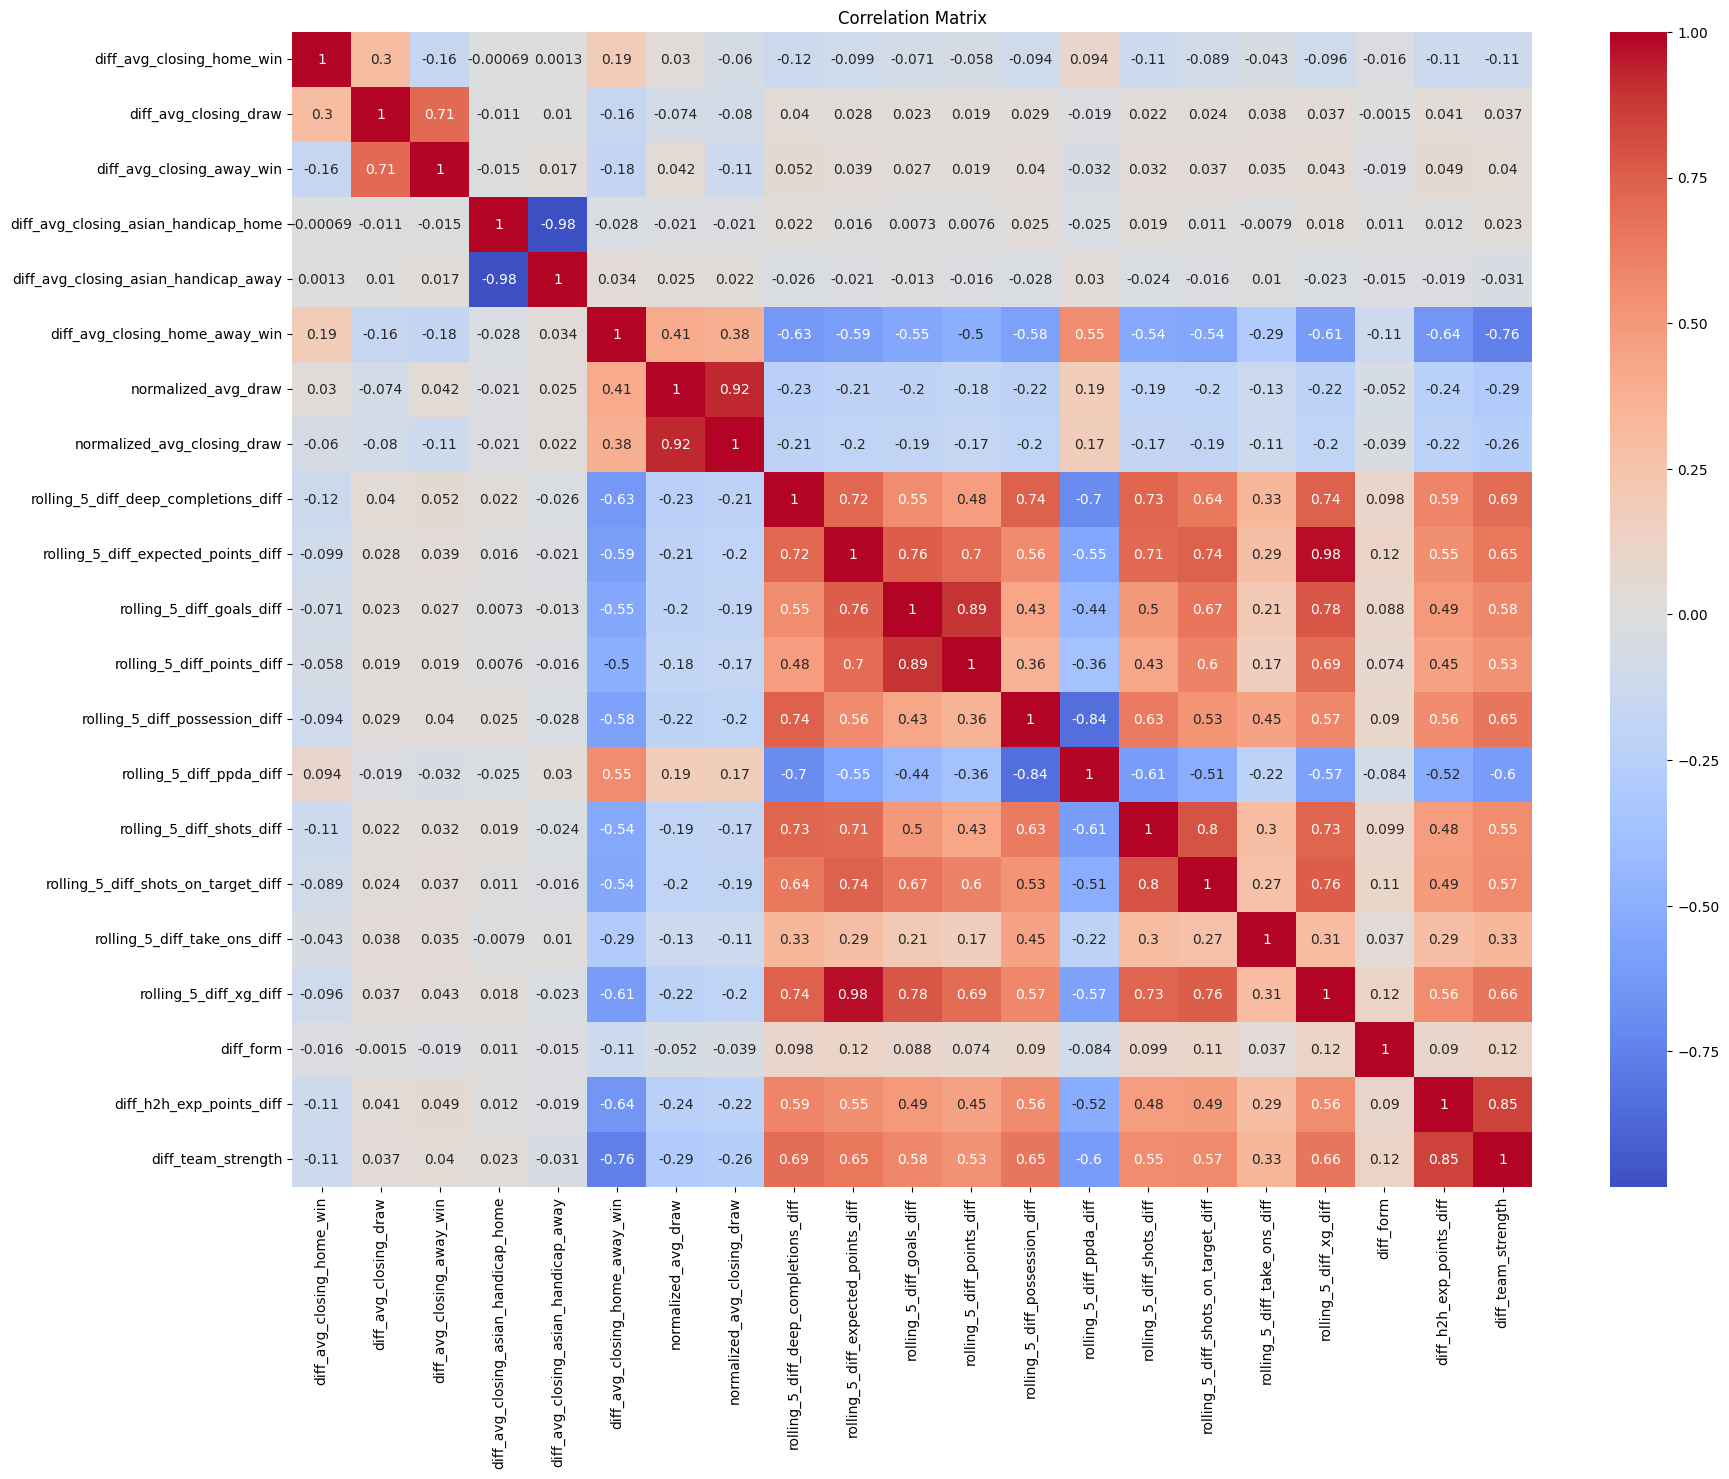

Index(['result', 'diff_avg_closing_home_win', 'diff_avg_closing_draw',
       'diff_avg_closing_away_win', 'diff_avg_closing_asian_handicap_home',
       'diff_avg_closing_home_away_win', 'normalized_avg_draw',
       'rolling_5_diff_deep_completions_diff',
       'rolling_5_diff_expected_points_diff', 'rolling_5_diff_points_diff',
       'rolling_5_diff_ppda_diff', 'rolling_5_diff_shots_diff',
       'rolling_5_diff_shots_on_target_diff', 'rolling_5_diff_take_ons_diff',
       'diff_form', 'diff_h2h_exp_points_diff'],
      dtype='object')


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = pre_match_df.drop("result", axis=1).corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features (absolute correlation greater than 0.8)
high_correlation_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs > 0.8]
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1.0]  # Remove self-correlation

# Keep track of columns to drop
columns_to_drop = set()

# Iterate over correlated pairs and choose one column to drop from each pair
for (col1, col2) in high_correlation_pairs.index:
    if col1 not in columns_to_drop and col2 not in columns_to_drop:
        # Drop the second column in each highly correlated pair
        columns_to_drop.add(col2)

# Drop the identified columns
pre_match_df.drop(columns=columns_to_drop, inplace=True)

# Verify the resulting columns after dropping
print(pre_match_df.columns)


In [24]:
# Check for missing values
missing_values = pre_match_df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values with 0 (or other appropriate value if needed)
pre_match_df.fillna(0, inplace=True)

# Verify there are no missing values
print(pre_match_df.isnull().sum().sum())


Series([], dtype: int64)
0


In [31]:
pre_match_df.columns

Index(['result', 'diff_avg_closing_home_win', 'diff_avg_closing_draw',
       'diff_avg_closing_away_win', 'diff_avg_closing_asian_handicap_home',
       'diff_avg_closing_home_away_win', 'normalized_avg_draw',
       'rolling_5_diff_deep_completions_diff',
       'rolling_5_diff_expected_points_diff', 'rolling_5_diff_points_diff',
       'rolling_5_diff_ppda_diff', 'rolling_5_diff_shots_diff',
       'rolling_5_diff_shots_on_target_diff', 'rolling_5_diff_take_ons_diff',
       'diff_form', 'diff_h2h_exp_points_diff'],
      dtype='object')

In [26]:
# Separate features and target variable
prematch_X = pre_match_df.drop(columns=['result'])  # Assuming 'result' is the target variable
prematch_y = pre_match_df['result']

# Scale features
scaler = StandardScaler()
prematch_X_scaled = scaler.fit_transform(prematch_X)

# Convert scaled features back to dataframe for easier handling
prematch_X_scaled_df = pd.DataFrame(prematch_X_scaled, columns=prematch_X.columns)

# Verify the scaling
print(prematch_X_scaled_df.head())


   diff_avg_closing_home_win  diff_avg_closing_draw  \
0                  -0.088940               2.361629   
1                  -1.759024               0.535114   
2                  -0.160515              -0.145959   
3                   0.221218              -0.455538   
4                   0.579093               0.287451   

   diff_avg_closing_away_win  diff_avg_closing_asian_handicap_home  \
0                  -0.857940                             -0.273267   
1                  -0.053706                             -0.117616   
2                   0.055963                             -0.351092   
3                  -0.333969                              0.894113   
4                  -0.273042                              0.971939   

   diff_avg_closing_home_away_win  normalized_avg_draw  \
0                       -3.395140            -2.456395   
1                        2.346312            -1.541803   
2                        0.267298             0.067889   
3               

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
prematch_y_encoded = label_encoder.fit_transform(prematch_y)

# Verify the encoding
print(np.unique(prematch_y_encoded, return_counts=True))


(array([0, 1, 2]), array([2298, 1799, 3106]))


In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
prematch_X_train, prematch_X_test, prematch_y_train, prematch_y_test = train_test_split(prematch_X_scaled_df, prematch_y_encoded, test_size=0.2, random_state=42)

# Convert numpy arrays to pandas DataFrame and Series
prematch_X_train_pd = pd.DataFrame(prematch_X_train)
prematch_X_test_pd = pd.DataFrame(prematch_X_test)
prematch_y_train_pd = pd.Series(prematch_y_train)
prematch_y_test_pd = pd.Series(prematch_y_test)

# Verify the split
print(prematch_X_train.shape, prematch_X_test.shape, prematch_y_train.shape, prematch_y_test.shape)


(5762, 15) (1441, 15) (5762,) (1441,)


In [29]:
# Convert training data to cuDF
prematch_X_train_cudf = cudf.DataFrame.from_pandas(prematch_X_train_pd)
prematch_y_train_cudf = cudf.Series(prematch_y_train_pd)

# Convert testing data to cuDF
prematch_X_test_cudf = cudf.DataFrame.from_pandas(prematch_X_test_pd)

NameError: name 'cudf' is not defined

Models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps


In [ ]:
# Logistic Regression with cuML
prematch_log_reg = cuMLWrapper(cuMLLogisticRegression())
prematch_param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100]}
prematch_grid_search_log_reg = GridSearchCV(prematch_log_reg, prematch_param_grid_log_reg, cv=5, scoring='accuracy')
prematch_grid_search_log_reg.fit(prematch_X_train_pd, prematch_y_train_pd)
prematch_log_reg_best = prematch_grid_search_log_reg.best_estimator_
print(f"Best parameters for Logistic Regression: {prematch_grid_search_log_reg.best_params_}")

In [ ]:
# Random Forest with cuML
prematch_random_forest = cuMLWrapper(cuMLRandomForestClassifier(random_state=42))
prematch_param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
prematch_grid_search_rf = GridSearchCV(prematch_random_forest, prematch_param_grid_rf, cv=5, scoring='accuracy')
prematch_grid_search_rf.fit(prematch_X_train_pd, prematch_y_train_pd)
prematch_random_forest_best = prematch_grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {prematch_grid_search_rf.best_params_}")

In [ ]:
# Gradient Boosting with XGBoost
prematch_gradient_boosting = xgb.XGBClassifier(tree_method='gpu_hist', random_state=42)
prematch_param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'subsample': [0.8, 0.9, 1.0]}
prematch_grid_search_gb = GridSearchCV(prematch_gradient_boosting, prematch_param_grid_gb, cv=5, scoring='accuracy')
prematch_grid_search_gb.fit(prematch_X_train, prematch_y_train)
prematch_gradient_boosting_best = prematch_grid_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {prematch_grid_search_gb.best_params_}")

In [ ]:
# Support Vector Machine with ThunderSVM
prematch_svm = ThunderSVMSVC(probability=True, random_state=42)
prematch_param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
prematch_grid_search_svm = GridSearchCV(prematch_svm, prematch_param_grid_svm, cv=5, scoring='accuracy')
prematch_grid_search_svm.fit(prematch_X_train, prematch_y_train)
prematch_svm_best = prematch_grid_search_svm.best_estimator_
print(f"Best parameters for SVM: {prematch_grid_search_svm.best_params_}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Neural Network with Keras
def create_prematch_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_dim=prematch_X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for multi-class classification
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

prematch_keras_clf = KerasClassifier(build_fn=create_prematch_model, epochs=50, batch_size=10, verbose=0)
prematch_keras_param_grid = {'optimizer': ['adam', 'rmsprop'], 'activation': ['relu', 'tanh'], 'dropout_rate': [0.0, 0.1, 0.2], 'epochs': [50, 100], 'batch_size': [10, 20]}
prematch_grid_search_keras = GridSearchCV(estimator=prematch_keras_clf, param_grid=prematch_keras_param_grid, cv=5, scoring='accuracy')
prematch_grid_search_keras.fit(prematch_X_train, prematch_y_train)
prematch_neural_network_best = prematch_grid_search_keras.best_estimator_
print(f"Best parameters for Neural Network: {prematch_grid_search_keras.best_params_}")



In [ ]:
# Create the ensemble model using VotingClassifier
prematch_voting_clf = VotingClassifier(
    estimators=[
        ('lr', prematch_log_reg_best),
        ('rf', prematch_random_forest_best),
        ('gb', prematch_gradient_boosting_best),
        ('svc', prematch_svm_best),
        ('mlp', prematch_neural_network_best)
    ],
    voting='soft'  # 'soft' uses predicted probabilities for majority rule
)

# Fit the ensemble model
prematch_voting_clf.fit(prematch_X_train, prematch_y_train)

In [ ]:
# Evaluate the individual models and the ensemble model
prematch_models = {
    'Logistic Regression': prematch_log_reg_best,
    'Random Forest': prematch_random_forest_best,
    'Gradient Boosting': prematch_gradient_boosting_best,
    'Support Vector Machine': prematch_svm_best,
    'Neural Network': prematch_neural_network_best,
    'Voting Classifier': prematch_voting_clf
}

# Evaluate each model
for name, model in prematch_models.items():
    if isinstance(model, cuMLWrapper):  # For cuML models
        y_pred = model.predict(prematch_X_test)
    else:
        y_pred = model.predict(prematch_X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')